# Data Cleaning & EDA

This notebook is the second 

## 1. Import Libraries & Data

In [3]:
import pandas as pd 
import numpy as np

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning) # ignoring deprecation warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
data = pd.read_csv("joined_data.csv") # loading joined dataset
data

,id,self_employed,n_employees,tech_company,tech_job,employer_MH_benefits,knows_coverage,formal_discussion,learning_resources,anonymity_protected,...,gender,country_live,us_state_live,race,race_other,country_work,us_state_work,start_date,submit_date,network_id
0,e49fe87572831232dcfa51b376b22039,0,100-500,1.0,1.0,No,Yes,No,I don't know,I don't know,...,Female,United Kingdom,NaN,NaN,NaN,United Kingdom,NaN,2018-05-16 12:32:04,2018-05-16 12:42:40,464b7a12f1
1,a1eede444ac024928d247a8372d54931,0,100-500,1.0,1.0,Yes,Yes,No,No,I don't know,...,male,United Kingdom,NaN,NaN,NaN,United Kingdom,NaN,2018-05-16 12:31:13,2018-05-16 12:40:40,464b7a12f1
2,37d3fd67f62bd1e0a2dea4f9cd440d98,0,6-25,1.0,1.0,I don't know,No,I don't know,No,Yes,...,male,United States of America,Missouri,White,NaN,United States of America,Missouri,2018-05-09 05:34:05,2018-05-09 05:46:04,1eb7e0cb94
3,519b759442c1cab0e9b5a8a1acb1b216,0,More than 1000,1.0,1.0,Yes,Yes,I don't know,I don't know,Yes,...,Male,United States of America,Washington,White,NaN,United States of America,Washington,2018-05-04 23:19:14,2018-05-04 23:23:23,63852edbc4
4,ef0af4927b575b1a3e607c11ca37870e,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,female,United States of America,Illinois,More than one of the above,NaN,United States of America,Illinois,2018-05-03 00:40:24,2018-05-03 00:53:20,43237889f1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,c7361d89328419b71ccd5f7cae16c818,0,6-25,1.0,1.0,I don't know,No,No,No,I don't know,...,Male,United States of America,Tennessee,More than one of the above,NaN,United States of America,Tennessee,2018-05-24 17:55:57,2018-05-24 18:04:13,ee329366d1
1169,c27be4d2a1eb40757e5be080a68b4ca9,0,100-500,0.0,1.0,Yes,Yes,No,Yes,Yes,...,Male,Finland,NaN,NaN,NaN,Finland,NaN,2018-05-24 17:34:07,2018-05-24 17:53:00,17e8491cd6
1170,b7bd8db00348415e1e9df49129290e31,0,100-500,0.0,1.0,Yes,Yes,I don't know,I don't know,I don't know,...,Male,United States of America,New Jersey,NaN,South Asian,United States of America,New Jersey,2018-05-24 17:35:11,2018-05-24 17:48:38,6bf2230231
1171,d0a97741b04f1887f43c23839200a195,0,6-25,1.0,1.0,Yes,Yes,I don't know,Yes,I don't know,...,Male,United States of America,Tennessee,White,NaN,United States of America,Tennessee,2018-05-24 17:38:05,2018-05-24 17:47:25,26df20fea3


## 2. Data Cleaning

In [5]:
# the data is already snake case-transformed

In [6]:
# let's have a look at all the features

for col_name in data.columns: 
    print(col_name)

id
self_employed
n_employees
tech_company
tech_job
employer_MH_benefits
knows_coverage
formal_discussion
learning_resources
anonymity_protected
ask_MH_leave
talk_about_health
discuss_MH_supervisor
ever_discuss_employer
describe_discussion_employer
discuss_MH_coworker
ever_discuss_coworker
describe_discussion_coworker
coworker_discuss_coworker
describe_coworker_discussion_coworker
importance_employer_PH
importance_employer_MH
MH_medical_coverage
knows_MH_resources
reveal_MH_client
reveal_MH_effect_client
reveal_MH_coworker
reveal_MH_effect_coworker
productivity_affected
worktime_affected
previous_employers
previous_tech_company
previous_employer_MH_benefits
previous_aware_coverage
previous_formal_discussion
previous_learning_resources
previous_anonymity_protected
previous_talk_about_health
discuss_MH_previous_supervisor
ever_discuss_previous_employer
describe_discussion_previous_employer
discuss_MH_previous_coworker
ever_discuss_previous_coworker
describe_discussion_previous_coworker
co

In [7]:
# we've already worked on undertanding the content of the features before in Vol. I
# We can now drop certain features that won't be useful for our analysis.

drop_features = ['id', 'start_date', 'submit_date', 'network_id']

clean_data = data.drop(drop_features, axis=1)

### 2.1 General: Nan Values

In [8]:
# checking if any rows are completely filled with nans

empty_rows = clean_data[clean_data.isna().all(1)].index
empty_rows

# there's not a row that only contains nans

Int64Index([], dtype='int64')

In [9]:
# finding all the nans

nan = clean_data.isna().sum()
print(nan)

self_employed              0
n_employees              169
tech_company             169
tech_job                 169
employer_MH_benefits     169
                        ... 
us_state_live            365
race                     389
race_other              1149
country_work               2
us_state_work            356
Length: 119, dtype: int64


In [10]:
# showing all the nans for each column

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nan)

self_employed                                        0
n_employees                                        169
tech_company                                       169
tech_job                                           169
employer_MH_benefits                               169
knows_coverage                                     273
formal_discussion                                  169
learning_resources                                 169
anonymity_protected                                169
ask_MH_leave                                       169
talk_about_health                                  169
discuss_MH_supervisor                              169
ever_discuss_employer                              169
describe_discussion_employer                       905
discuss_MH_coworker                                169
ever_discuss_coworker                              170
describe_discussion_coworker                       841
coworker_discuss_coworker                          175
describe_c

In [11]:
# firstly we'll need to drop all the columns that are filled just with nans

clean_data = clean_data.dropna(axis=1, how='all')

In [12]:
clean_data.shape # sanity check

(1173, 104)

## 2.2 Cleaning Features

I am next focusing on different features to make sure they'll be ready for exploration. 

The focus of the following segment is:
   - Label and column reduction, 
   - Preparing for encoding, 
   - Cleaning nans.

### 2.2.1 Race (Combing Columns & Reducing Labels)

In [13]:
print(clean_data[['race','race_other']].head(10))

                         race race_other
0                         NaN        NaN
1                         NaN        NaN
2                       White        NaN
3                       White        NaN
4  More than one of the above        NaN
5                       White        NaN
6                       Asian        NaN
7                       White        NaN
8                         NaN        NaN
9                         NaN        NaN


In [14]:
# combining the two race columns

clean_data["race_complete"] = clean_data['race'].fillna(clean_data['race_other'])
print(clean_data["race_complete"].head())

0                           NaN
1                           NaN
2                         White
3                         White
4    More than one of the above
Name: race_complete, dtype: object


In [15]:
clean_data['race_complete'].isna().sum() # sanity check

365

In [16]:
# dropping the original race columns

clean_data = clean_data.drop(['race', 'race_other'], axis=1)

In [17]:
# checking the values of the feature

clean_data.race_complete.value_counts()

White                                                   700
More than one of the above                               27
I prefer not to answer                                   23
Asian                                                    22
Black or African American                                11
Hispanic                                                  3
Latino                                                    2
Latina                                                    2
South Asian                                               2
My race is white, but my ethnicity is Latin American      1
West Indian                                               1
I am of the race of Adam, the first human.                1
American Indian or Alaska Native                          1
Persian                                                   1
Indo-Caribbean                                            1
Mestizo                                                   1
Hispanic or Latino                      

In [18]:
# reducing labels 

clean_data['race_complete'] = clean_data['race_complete'].replace(['Hispanic', 
                                                                   'Latino', 
                                                                   'Latina', 
                                                                   'Hispanic or Latino', 
                                                                   'Latinx', 
                                                                   'mexican american '], 'Hispanic/Latino')

clean_data['race_complete'] = clean_data['race_complete'].replace(['South Asian', 
                                                                   'West Indian', 
                                                                   'Indian',
                                                                   'Asian'], 'Asian')

clean_data['race_complete'] = clean_data['race_complete'].replace(['Jewish', 
                                                                   'Ashkenazi'], 'Jewish')

clean_data['race_complete'] = clean_data['race_complete'].replace(['I prefer not to answer', 
                                                                    'I am of the race of Adam, the first human.'], 'I prefer not to answer')

clean_data['race_complete'] = clean_data['race_complete'].replace(['Hispanic, White',
                                                                   'European American',
                                                                   'Mestizo',
                                                                   'Indo-Caribbean',
                                                                   'My race is white, but my ethnicity is Latin American',
                                                                   'More than one of the above'], 'Mixed')

clean_data['race_complete'] = clean_data['race_complete'].replace(['Middle Eastern',
                                                                   'Persian'], 'Middle Eastern')

clean_data['race_complete'] = clean_data['race_complete'].replace(['American Indian or Alaska Native'], 'Native American')

### 2.2.2. Ever diagnosed

In [19]:
clean_data[['ever_diagnosed', 'MH_disorder']].head()

# the two columns measure the same thing so we'll combine them in a new column
# we'll be focusing on the ever_diagnosed as it provides the certainty of a diagnosis

,ever_diagnosed,MH_disorder
0,NaN,Possibly
1,NaN,Possibly
2,Yes,Yes
3,Yes,No
4,NaN,Yes


In [20]:
# combining the two columns

clean_data['historic_disorder'] = clean_data['ever_diagnosed'].fillna(clean_data['MH_disorder'])
print(clean_data[['ever_diagnosed', 'MH_disorder', 'historic_disorder']].head())

  ever_diagnosed MH_disorder historic_disorder
0            NaN    Possibly          Possibly
1            NaN    Possibly          Possibly
2            Yes         Yes               Yes
3            Yes          No               Yes
4            NaN         Yes               Yes


In [21]:
# let's drop the original diagnosis columns

clean_data = clean_data.drop(['ever_diagnosed', 'MH_disorder'], axis=1)

### 2.2.3 Disorders

In [22]:
# checking a disorder feature

clean_data['anxiety_disorders_possibly'].head(10)

0    Anxiety Disorder (Generalized, Social, Phobia,...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
5                                                  NaN
6                                                  NaN
7                                                  NaN
8                                                  NaN
9                                                  NaN
Name: anxiety_disorders_possibly, dtype: object

In [23]:
# checking value counts again (this has been thoroughly done in Data Collection notebook.)

clean_data['anxiety_disorders_possibly'].value_counts()

# we already know that the rest of the disorder features have similar nan percentages and use the same type of structure

Anxiety Disorder (Generalized, Social, Phobia, etc)    155
Name: anxiety_disorders_possibly, dtype: int64

In [24]:
# function to replace nan with 0 and the text with 1 for a positive diagnosis

def encode_disorders(x):
    x.fillna(0, inplace=True)
    x[x != 0] = 1
    return

In [25]:
# creating list of disorder features

disorder_features = clean_data[['anxiety_disorders_possibly',
'mood_disorders_possibly',
'eating_disorders_possibly',
'adhd_possibly',
'personality_disorders_possibly',
'ocd_possibly',
'ptsd_possibly',
'adjustment_disorder_possibly',
'dissociative_disorder_possibly',
'substance_use_disorders_possibly',
'addictive_disorders_possibly',
'anxiety_disorders',
'mood_disorders',
'psychotic_disorders',
'eating_disorders',
'adhd',
'personality_disorders',
'ocd',
'ptsd',
'adjustment_disorder',
'dissociative_disorder',
'substance_use_disorders',
'addictive_disorders']] 

In [26]:
# applying the function

encode_disorders(disorder_features)

C:\Users\lazar\AppData\Local\Temp\ipykernel_23700\2374866962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(0, inplace=True)
C:\Users\lazar\AppData\Local\Temp\ipykernel_23700\2374866962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x != 0] = 1
C:\Users\lazar\AppData\Local\Temp\ipykernel_23700\2374866962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x

In [27]:
# sanity check

disorder_features

,anxiety_disorders_possibly,mood_disorders_possibly,eating_disorders_possibly,adhd_possibly,personality_disorders_possibly,ocd_possibly,ptsd_possibly,adjustment_disorder_possibly,dissociative_disorder_possibly,substance_use_disorders_possibly,...,psychotic_disorders,eating_disorders,adhd,personality_disorders,ocd,ptsd,adjustment_disorder,dissociative_disorder,substance_use_disorders,addictive_disorders
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1171,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# replacing the original features with the encoded ones

clean_data[['anxiety_disorders_possibly',
            'mood_disorders_possibly',
            'eating_disorders_possibly',
            'adhd_possibly',
            'personality_disorders_possibly',
            'ocd_possibly',
            'ptsd_possibly',
            'adjustment_disorder_possibly',
            'dissociative_disorder_possibly',
            'substance_use_disorders_possibly',
            'addictive_disorders_possibly',
            'anxiety_disorders',
            'mood_disorders',
            'psychotic_disorders',
            'eating_disorders',
            'adhd',
            'personality_disorders',
            'ocd',
            'ptsd',
            'adjustment_disorder',
            'dissociative_disorder',
            'substance_use_disorders',
            'addictive_disorders']] = disorder_features

### 2.2.4. Other Disorders

In [29]:
# checking value counts 

clean_data.other_disorders_possibly.value_counts()

Asperger      1
Autism        1
Suicidal      1
ADHD          1
Asperger's    1
Name: other_disorders_possibly, dtype: int64

In [30]:
# checking value counts 

clean_data.other_disorders.value_counts()

Depression                                      2
Gender Dysphoria                                2
Panic Disorder                                  1
Aspergers Syndrome                              1
Adjustment disorder                             1
Cyclothymia                                     1
Codependence                                    1
Multiple Sclerosis & Mental Health              1
ADD                                             1
Depression                                      1
Attention Deficit Disorder (Non-Hyperactive)    1
Tourette's                                      1
Autism                                          1
Panic disorder                                  1
Depression, Anxiety, Developmental Trauma       1
Autism Spectrum Disorder                        1
Bipolar                                         1
Name: other_disorders, dtype: int64

**Comment:** Although the `other disorders` include a variety of disorders, the value counts are very low so for now I'm keep everything as is. If predictive modeling at a later stage indicates indicates that either of these columns is important the we can revisit these features.

In [31]:
other_disorders = clean_data[['other_disorders_possibly', 'other_disorders']]

encode_disorders(other_disorders) # applying the function

print(other_disorders) # sanity check

     other_disorders_possibly other_disorders
0                           0               0
1                           0               0
2                           0               0
3                           0               0
4                           0               0
...                       ...             ...
1168                        0               0
1169                        0               0
1170                        0               0
1171                        1               0
1172                        0               0

[1173 rows x 2 columns]


C:\Users\lazar\AppData\Local\Temp\ipykernel_23700\2374866962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(0, inplace=True)
C:\Users\lazar\AppData\Local\Temp\ipykernel_23700\2374866962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x != 0] = 1
C:\Users\lazar\AppData\Local\Temp\ipykernel_23700\2374866962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x

In [32]:
clean_data[['other_disorders_possibly', 'other_disorders']] = other_disorders

clean_data[['other_disorders_possibly', 'other_disorders']] # sanity check

,other_disorders_possibly,other_disorders
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1168,0,0
1169,0,0
1170,0,0
1171,1,0


### 2.2.5. Text Columns

In [33]:
# let's check again the columns

for col_name in clean_data.columns: 
    print(col_name)

self_employed
n_employees
tech_company
tech_job
employer_MH_benefits
knows_coverage
formal_discussion
learning_resources
anonymity_protected
ask_MH_leave
talk_about_health
discuss_MH_supervisor
ever_discuss_employer
describe_discussion_employer
discuss_MH_coworker
ever_discuss_coworker
describe_discussion_coworker
coworker_discuss_coworker
describe_coworker_discussion_coworker
importance_employer_PH
importance_employer_MH
MH_medical_coverage
knows_MH_resources
reveal_MH_client
reveal_MH_effect_client
reveal_MH_coworker
reveal_MH_effect_coworker
productivity_affected
worktime_affected
previous_employers
previous_tech_company
previous_employer_MH_benefits
previous_aware_coverage
previous_formal_discussion
previous_learning_resources
previous_anonymity_protected
previous_talk_about_health
discuss_MH_previous_supervisor
ever_discuss_previous_employer
describe_discussion_previous_employer
discuss_MH_previous_coworker
ever_discuss_previous_coworker
describe_discussion_previous_coworker
cowor

In [34]:
# list of features that include descriptive text

text_features = clean_data[['describe_discussion_employer', 
                            'describe_discussion_coworker',
                            'describe_coworker_discussion_coworker',
                            'describe_discussion_previous_employer',
                            'describe_discussion_previous_coworker',
                            'describe_previous_coworker_discussion_coworker',
                            'PH_during_interview_why',
                            'MH_during_interview_why',
                            'describe_negative_reaction',
                            'describe_industry_AOI',
                            'other_comments'
                            ]]

In [35]:
# checking percentage of nan

text_features.isna().sum()/len(text_features)

describe_discussion_employer                      0.771526
describe_discussion_coworker                      0.716965
describe_coworker_discussion_coworker             0.698210
describe_discussion_previous_employer             0.859335
describe_discussion_previous_coworker             0.810742
describe_previous_coworker_discussion_coworker    0.825234
PH_during_interview_why                           0.236147
MH_during_interview_why                           0.221654
describe_negative_reaction                        0.788576
describe_industry_AOI                             0.327366
other_comments                                    0.760443
dtype: float64

**Comment:** Due to the high presence of nans we cannot use these features for predictive modeling. However, we'll export this data as a csv file and focus on topic modeling or at least visualizations of text features. For more check `Vol. III - Text Analysis Notebook`.

In [36]:
# exporting new dataframe as csv.

text_features.to_csv('text_features.csv', index=False)

In [37]:
# dropping text features

clean_data.drop(text_features, axis=1, inplace=True)

In [38]:
clean_data.shape # checking shape after feature removal

(1173, 91)

### 2.2.6. Features with > 1000 nan

In [39]:
nan_features = clean_data[[
    'worktime_affected',
    'MH_medical_coverage' ,                 
    'knows_MH_resources',
    'reveal_MH_client',
    'reveal_MH_coworker',
    'reveal_MH_effect_coworker',
    'productivity_affected',
    'reveal_MH_effect_client',
    'identified_MH_effect',
    'identified_MH_scale'
                ]]

In [40]:
for feature in nan_features:
    print('\033[1m', feature)
    print('\033[0m', nan_features[feature].value_counts(dropna=False, normalize=True))

 worktime_affected
 NaN        0.892583
1-25%      0.047741
26-50%     0.035806
51-75%     0.017903
76-100%    0.005968
Name: worktime_affected, dtype: float64
 MH_medical_coverage
 NaN    0.855925
1.0    0.102302
0.0    0.041773
Name: MH_medical_coverage, dtype: float64
 knows_MH_resources
 NaN                     0.855925
I know some             0.053708
Yes, I know several     0.048593
No, I don't know any    0.041773
Name: knows_MH_resources, dtype: float64
 reveal_MH_client
 NaN                                          0.855925
Not applicable to me                         0.048593
No, because it would impact me negatively    0.040921
Sometimes, if it comes up                    0.032396
No, because it doesn't matter                0.019608
Yes, always                                  0.002558
Name: reveal_MH_client, dtype: float64
 reveal_MH_coworker
 NaN                                          0.855925
Sometimes, if it comes up                    0.053708
Not applicable to me   

**Comment:** After exploring these features above and checking the `Data Exploration` notebook, I've decided to drop features with such a high concetration of nans. Since I'll have over 80 features left after this, I doubt I'll lose too much valuable data. I am using `nan_features` for safekeeping.

In [41]:
clean_data = clean_data.drop(nan_features, axis=1)

In [42]:
clean_data.shape # checking shape after feature removal

(1173, 81)

### 2.2.7. Gender (Label Reduction)

In [43]:
gender_values = clean_data.gender.value_counts()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(gender_values)

Male                                                         492
Female                                                       181
male                                                         160
female                                                        83
M                                                             44
m                                                             35
F                                                             23
f                                                             20
Male                                                          10
Female                                                         8
Woman                                                          7
Man                                                            5
Nonbinary                                                      5
woman                                                          4
cis male                                                       3
Cis-male                 

In [48]:
# reducing labels for gender 

clean_data['gender'] = clean_data['gender'].replace(['male', 
                                                    'M', 
                                                    'm', 
                                                    'Male ', 
                                                    'Man', 
                                                    'cis male',
                                                    'Cis-male',
                                                    'Cis Male',
                                                    'dude',
                                                    'Ostensibly Male',
                                                    'male, born with xy chromosoms',
                                                    'Malel',
                                                    'MALE',
                                                    'SWM',
                                                    'Cisgender male',
                                                    'man', 
                                                    'Cis male',
                                                    "male (hey this is the tech industry you're talking about)",
                                                    "Male (cis)",
                                                    "Male, cis",
                                                    'cis hetero male',
                                                    'Mail',
                                                    'cis-male',
                                                    'cis male ',
                                                    'Male-ish',
                                                    'God King of the Valajar', 
                                                    ], 'Male')

clean_data['gender'] = clean_data['gender'].replace(['female', 
                                                    'F',
                                                    'f',
                                                    'Female ', 
                                                    'Woman',
                                                    'woman', 
                                                    'I identify as female',
                                                    "*shrug emoji* (F)",
                                                    'Cis female ',
                                                    'Cis woman', 
                                                    'Female (cisgender)', 
                                                    'Cis-Female', 
                                                    'Cisgendered woman',
                                                    'cisgender female',
                                                    'cis-Female',
                                                    'My sex is female.',
                                                    'female (cis)',
                                                    'femail',
                                                    'femalw', 
                                                    'Female-ish',
                                                    "F, cisgender",
                                                    'Woman-identified',
                                                    'Female (cis) ',
                                                    'female (cisgender)', 
                                                    'cis female'
                                                    ], 'Female')

clean_data['gender'] = clean_data['gender'].replace(['Nonbinary',
                                                    'Trans man',
                                                    'transgender',
                                                    'Nonbinary/femme',
                                                    'non binary',
                                                    'Female/gender non-binary.',
                                                    'Trans female',
                                                    'non-binary',
                                                    'She/her/they/them',
                                                    'NB',
                                                    'Transfeminine',
                                                    'Non-binary',
                                                    'trans woman',
                                                    'nonbinary',
                                                    'Non binary',
                                                    'Trans woman' 
                                                    ], 'Trans/Non-binary')

clean_data['gender'] = clean_data['gender'].replace(['Genderqueer',
                                                    'Genderfluid',
                                                    'Agender',
                                                    'Other',
                                                    "Male (or female, or both)",'genderfluid',
                                                    'None',
                                                    'none','uhhhhhhhhh fem genderqueer?',
                                                    'Genderqueer demigirl',
                                                    '\-',
                                                    'Genderqueer/non-binary',
                                                    'Agender/genderfluid',
                                                    'Contextual',
                                                    'sometimes',
                                                    'gender non-conforming woman',
                                                    'Demiguy',
                                                    'male/androgynous ' 
                                                    ], 'Other')

In [52]:
# we are reducing labels of some of the features

display(clean_data.gender.value_counts())

 # sanity check

Male                772
Female              345
Other                20
Trans/Non-binary     20
Name: gender, dtype: int64

### 2.2.8. Various Variables

In [51]:
# checking for nans

various_features = clean_data[[
    'us_state_live', 
    'us_state_work', 
    'observed_neg_impact', 
    'knows_coverage']]

for feature in various_features:
    print('\033[1m',feature)
    print('\033[0m',various_features[feature].value_counts(dropna=False, normalize=True))

 us_state_live
 NaN                     0.311168
Illinois                0.107417
California              0.080136
Ohio                    0.040068
Washington              0.035806
Indiana                 0.034953
Tennessee               0.030691
Minnesota               0.028133
Michigan                0.026428
Nebraska                0.024723
New York                0.024723
Massachusetts           0.024723
Pennsylvania            0.023870
Texas                   0.023870
Oregon                  0.023018
Georgia                 0.015345
Missouri                0.014493
Wisconsin               0.012788
Florida                 0.011083
Maryland                0.011083
New Jersey              0.010230
Virginia                0.008525
North Carolina          0.007673
Utah                    0.007673
Colorado                0.007673
Iowa                    0.006820
New Hampshire           0.005968
Arizona                 0.004263
Alabama                 0.004263
Kentucky                0.0

In [46]:
country_features = clean_data[['country_live', 'country_work']]

for feature in country_features:
    print('\033[1m', feature)
    print('\033[0m', country_features[feature].value_counts(dropna=False, normalize=True))

 country_live
 United States of America    0.689685
United Kingdom              0.072464
Canada                      0.028986
Germany                     0.024723
France                      0.017903
Netherlands                 0.016198
India                       0.015345
Spain                       0.015345
Australia                   0.013640
Switzerland                 0.005968
Poland                      0.005968
Ireland                     0.005968
Mexico                      0.004263
New Zealand                 0.004263
Italy                       0.004263
Japan                       0.004263
Belgium                     0.003410
Romania                     0.003410
South Africa                0.003410
Russia                      0.003410
Brazil                      0.003410
Finland                     0.002558
Portugal                    0.002558
Norway                      0.002558
Greece                      0.002558
Argentina                   0.002558
Ukraine                

**Comment:** After reviewing these various columns in combination with distributions of countries, I've decided I either

   - Have to focus on the US for my consecutive analysis. After all that comprises about 70% of all the data available.
   - Drop the US-exclusive columns (about states for instance) in order to see if I'll end up with more data.

I'm testing both outcomes below.

### 2.3. Removing the final nans

In [47]:
# checking where there's nans left

nan = clean_data.isna().sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nan)

self_employed                           0
n_employees                           169
tech_company                          169
tech_job                              169
employer_MH_benefits                  169
knows_coverage                        273
formal_discussion                     169
learning_resources                    169
anonymity_protected                   169
ask_MH_leave                          169
talk_about_health                     169
discuss_MH_supervisor                 169
ever_discuss_employer                 169
discuss_MH_coworker                   169
ever_discuss_coworker                 170
coworker_discuss_coworker             175
importance_employer_PH                169
importance_employer_MH                169
previous_employers                      0
previous_tech_company                 143
previous_employer_MH_benefits         143
previous_aware_coverage               143
previous_formal_discussion            143
previous_learning_resources       

In [54]:
clean_data_us = clean_data.drop(['country_live', 'country_work'], axis=1)

clean_data_us = clean_data.dropna() # dropping rows with nans

clean_data_us = clean_data_us.reset_index(drop=True) # resetting index

print(clean_data_us.shape) # sanity check

(508, 81)


In [49]:
clean_data_us # this is how the American-focused clean dataset looks like

,self_employed,n_employees,tech_company,tech_job,employer_MH_benefits,knows_coverage,formal_discussion,learning_resources,anonymity_protected,ask_MH_leave,...,overall_support,followup_talk,age,gender,country_live,us_state_live,country_work,us_state_work,race_complete,historic_disorder
0,0,6-25,1.0,1.0,I don't know,No,I don't know,No,Yes,Difficult,...,1.0,1.0,36.0,Male,United States of America,Missouri,United States of America,Missouri,White,Yes
1,0,100-500,1.0,0.0,Yes,No,No,I don't know,Yes,Somewhat easy,...,2.0,0.0,30.0,Male,United States of America,California,United States of America,California,White,No
2,0,6-25,1.0,1.0,Yes,Yes,No,No,Yes,Very easy,...,2.0,1.0,36.0,Female,United States of America,Washington,United States of America,Washington,Asian,Yes
3,0,26-100,1.0,1.0,Yes,No,No,No,I don't know,Somewhat easy,...,2.0,1.0,38.0,Female,United States of America,Georgia,United States of America,Georgia,White,No
4,0,100-500,0.0,1.0,Yes,Yes,No,No,I don't know,I don't know,...,1.0,0.0,40.0,Male,United States of America,Pennsylvania,United States of America,Pennsylvania,White,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,0,26-100,1.0,1.0,Yes,Yes,Yes,Yes,Yes,Somewhat difficult,...,1.0,0.0,37.0,Male,United States of America,Illinois,United States of America,Illinois,White,No
504,0,26-100,0.0,1.0,No,No,No,No,I don't know,Difficult,...,2.0,1.0,24.0,Female,United States of America,Minnesota,United States of America,Minnesota,White,Yes
505,0,6-25,1.0,1.0,Yes,No,No,No,Yes,Somewhat easy,...,3.0,0.0,28.0,Male,United States of America,Tennessee,United States of America,Tennessee,White,Yes
506,0,6-25,1.0,1.0,Yes,Yes,I don't know,Yes,I don't know,Somewhat easy,...,2.0,0.0,27.0,Male,United States of America,Tennessee,United States of America,Tennessee,White,Possibly


In [51]:
clean_data_world = clean_data.drop(['us_state_live', 'us_state_work'], axis=1)

clean_data_world = clean_data_world.dropna() # dropping rows with nans

clean_data_world = clean_data_world.reset_index(drop=True) #resetting index

print(clean_data_world.shape) # sanity check

(508, 79)


In [52]:
clean_data_world # this is how the global clean dataset looks like

,self_employed,n_employees,tech_company,tech_job,employer_MH_benefits,knows_coverage,formal_discussion,learning_resources,anonymity_protected,ask_MH_leave,...,observed_negative_reaction,observed_positive_reaction,overall_support,followup_talk,age,gender,country_live,country_work,race_complete,historic_disorder
0,0,6-25,1.0,1.0,I don't know,No,I don't know,No,Yes,Difficult,...,"Yes, I experienced","Yes, I experienced",1.0,1.0,36.0,Male,United States of America,United States of America,White,Yes
1,0,100-500,1.0,0.0,Yes,No,No,I don't know,Yes,Somewhat easy,...,"Yes, I observed","Yes, I observed",2.0,0.0,30.0,Male,United States of America,United States of America,White,No
2,0,6-25,1.0,1.0,Yes,Yes,No,No,Yes,Very easy,...,No,"Yes, I observed",2.0,1.0,36.0,Female,United States of America,United States of America,Asian,Yes
3,0,26-100,1.0,1.0,Yes,No,No,No,I don't know,Somewhat easy,...,No,"Yes, I observed",2.0,1.0,38.0,Female,United States of America,United States of America,White,No
4,0,100-500,0.0,1.0,Yes,Yes,No,No,I don't know,I don't know,...,"Yes, I experienced",No,1.0,0.0,40.0,Male,United States of America,United States of America,White,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,0,26-100,1.0,1.0,Yes,Yes,Yes,Yes,Yes,Somewhat difficult,...,No,No,1.0,0.0,37.0,Male,United States of America,United States of America,White,No
504,0,26-100,0.0,1.0,No,No,No,No,I don't know,Difficult,...,Maybe/Not sure,Maybe/Not sure,2.0,1.0,24.0,Female,United States of America,United States of America,White,Yes
505,0,6-25,1.0,1.0,Yes,No,No,No,Yes,Somewhat easy,...,Maybe/Not sure,Maybe/Not sure,3.0,0.0,28.0,Male,United States of America,United States of America,White,Yes
506,0,6-25,1.0,1.0,Yes,Yes,I don't know,Yes,I don't know,Somewhat easy,...,Maybe/Not sure,Maybe/Not sure,2.0,0.0,27.0,Male,United States of America,United States of America,White,Possibly


**Comment:** It seems that the amount of rows are the same in any case, therefore the missing data is not from America. In this case, it makes sense to focus on the American tech industry.

In [76]:
# exporting new dataframe as csv.

clean_data_us.to_csv('data_for_visualization.csv', index=False)

## 3. Data Exploration

In [57]:
# importing visualization libraries 

import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# checking target variable for imbalance

clean_data_us.overall_support.value_counts(normalize=True)

3.0    0.429134
2.0    0.314961
4.0    0.141732
1.0    0.104331
5.0    0.009843
Name: overall_support, dtype: float64

## 3.1. Feature Visualizations (EDA)

### 3.1.1. Categorical Variables

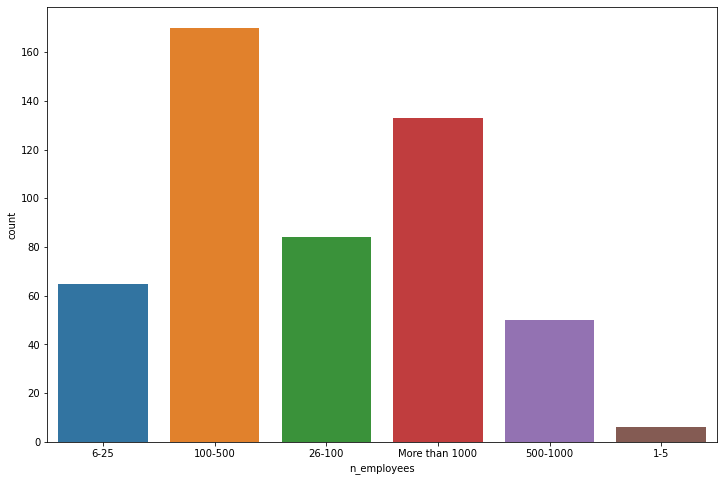

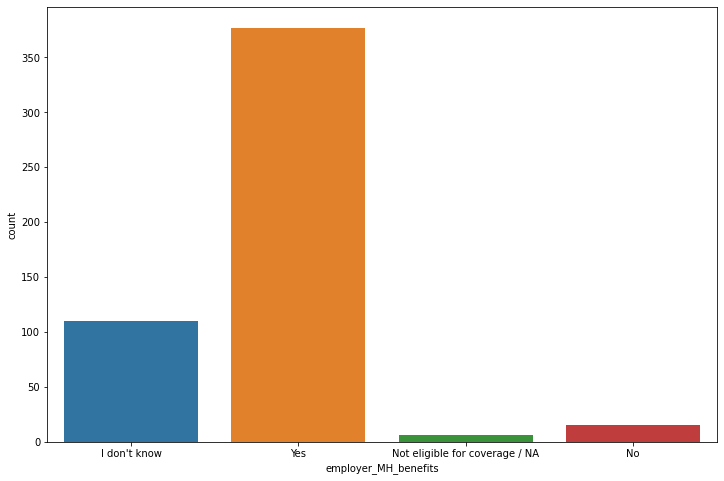

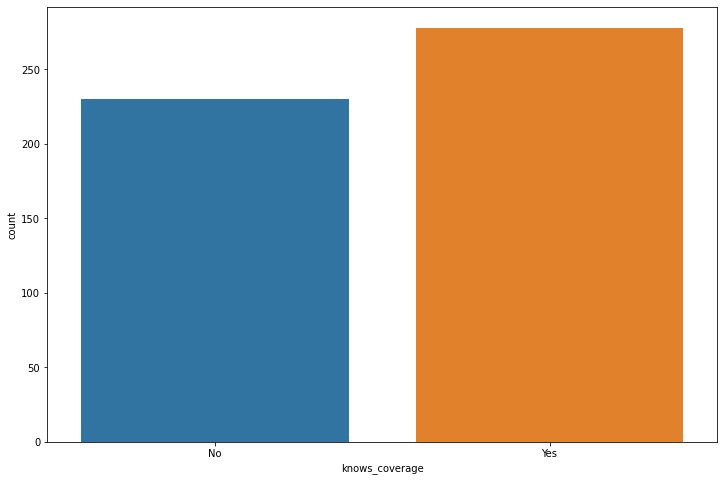

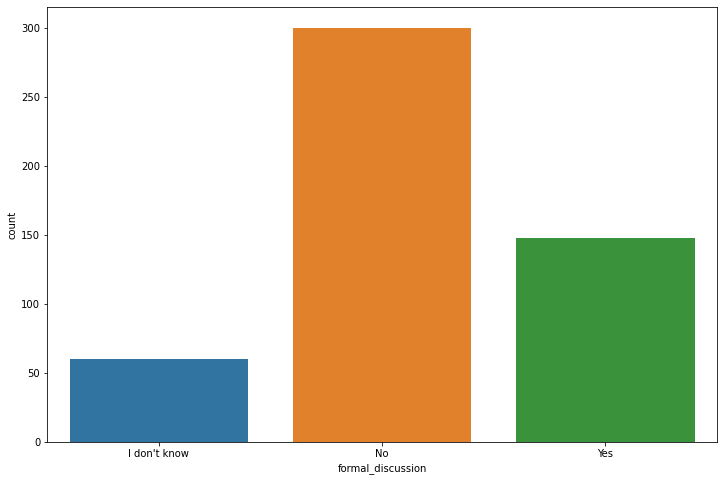

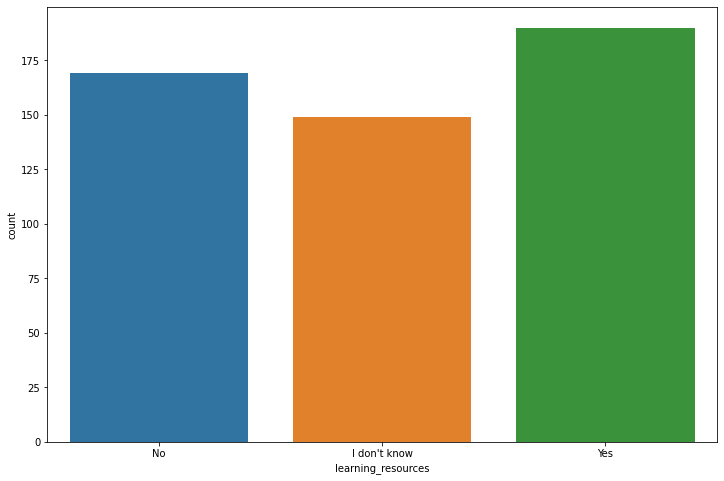

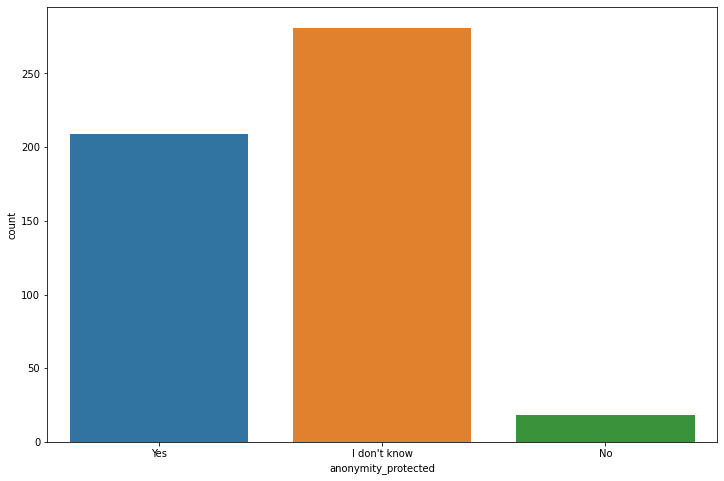

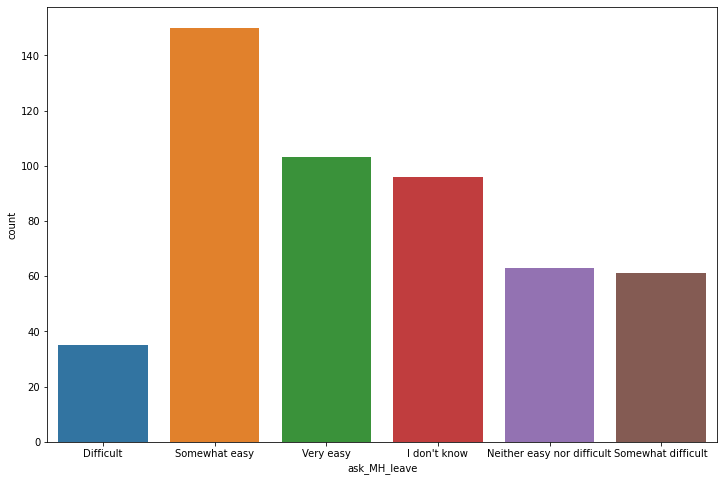

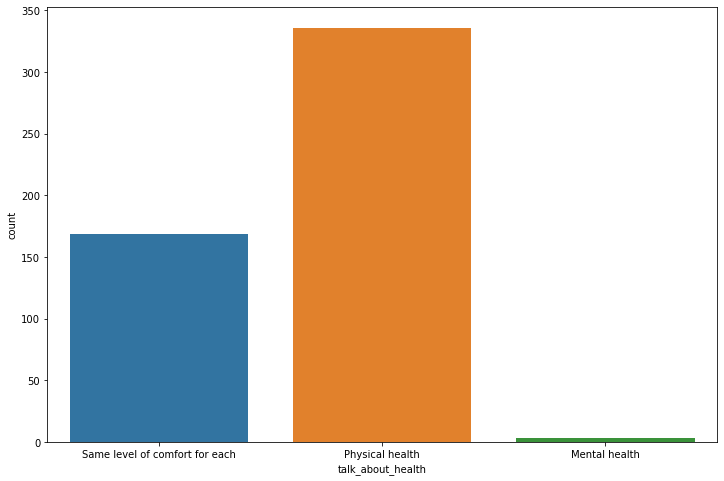

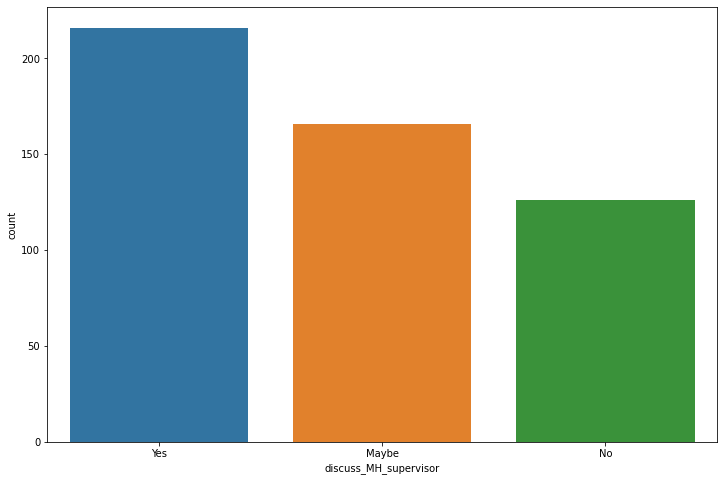

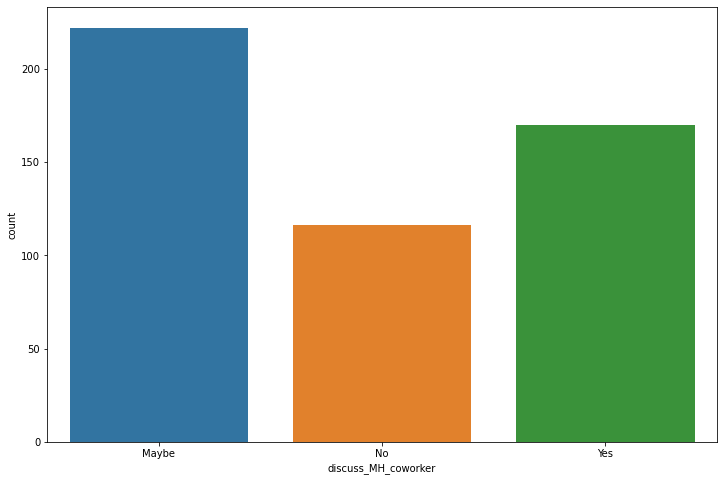

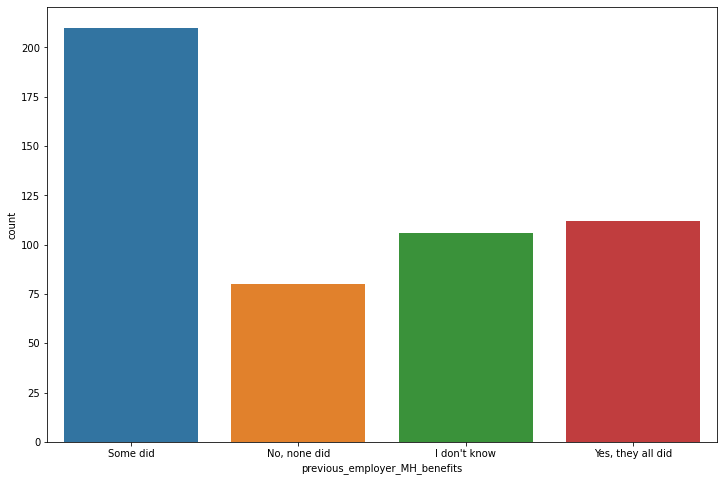

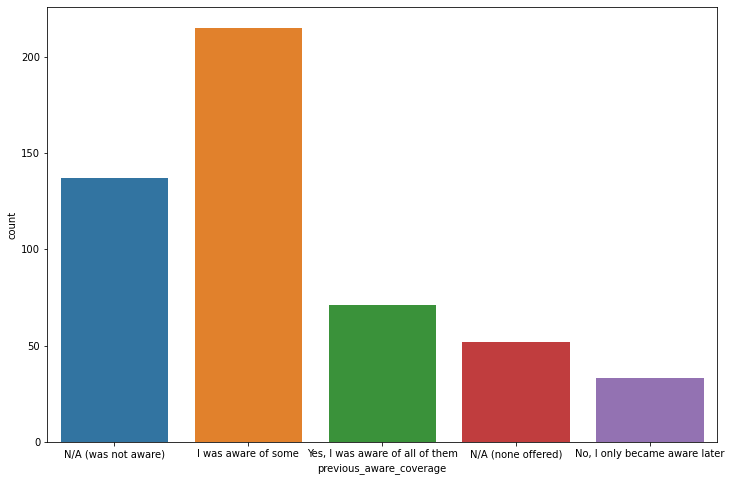

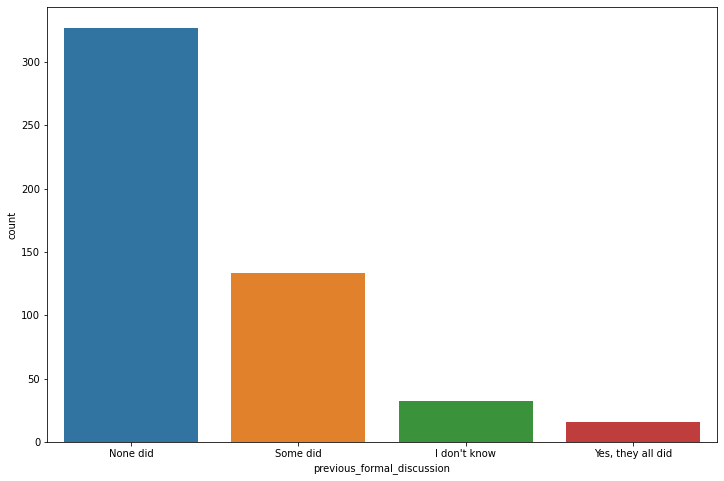

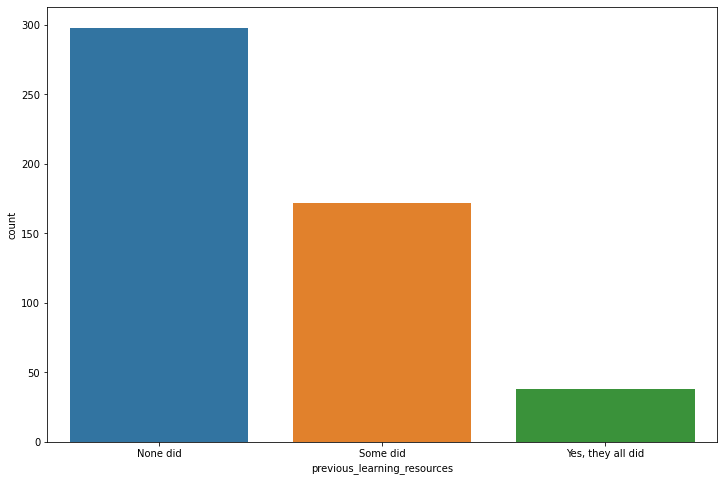

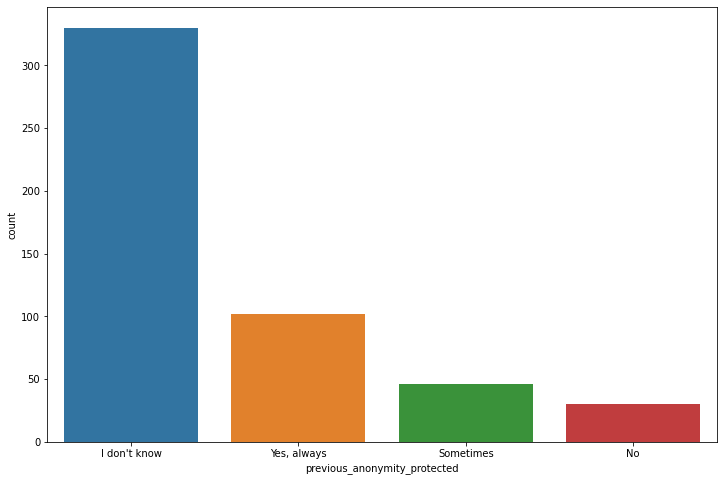

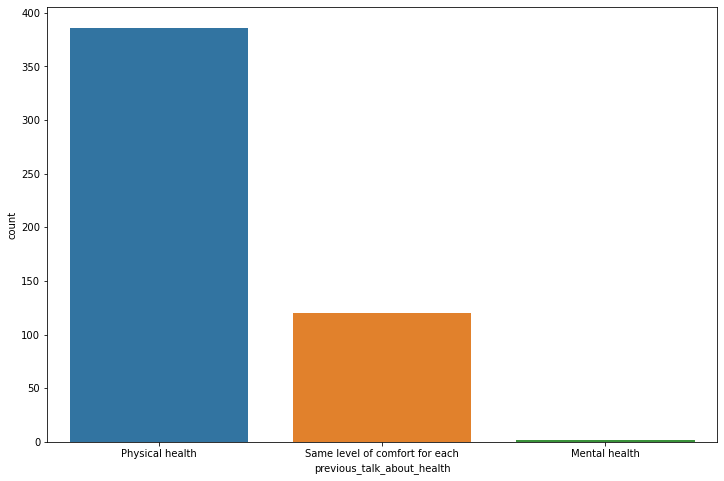

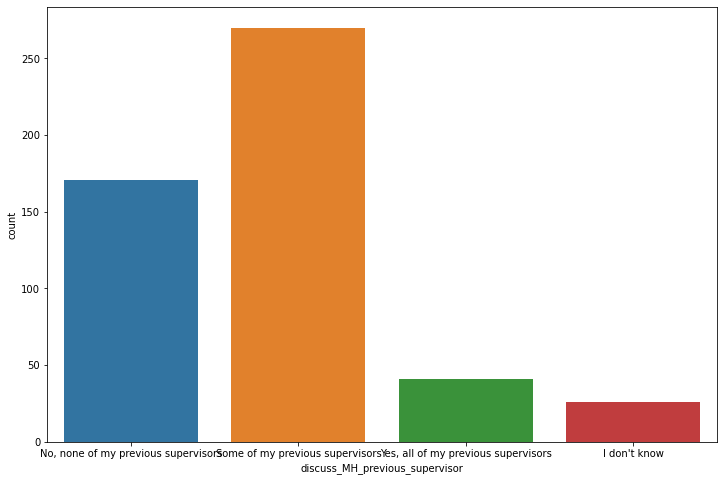

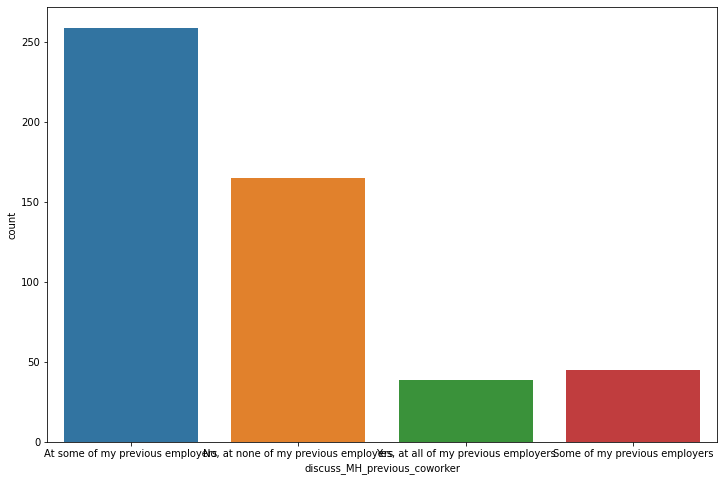

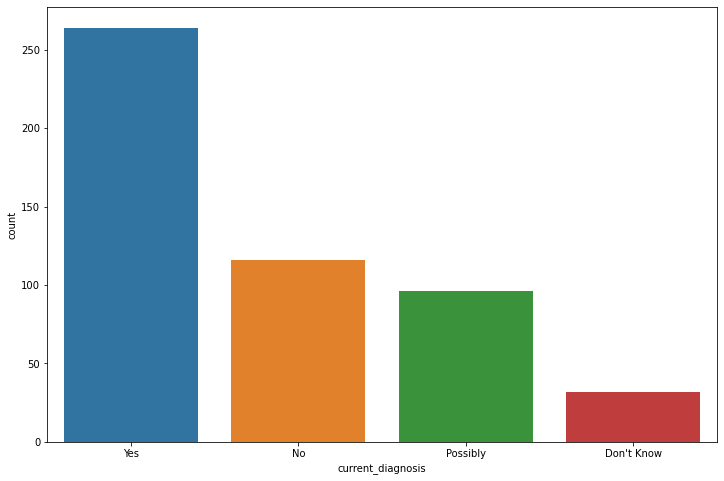

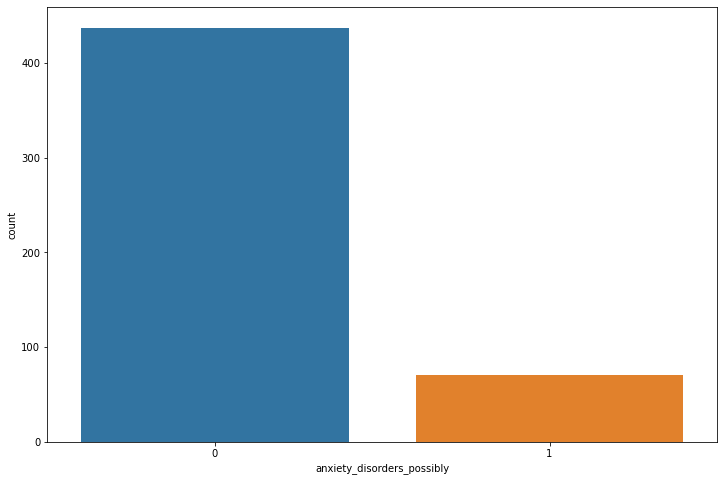

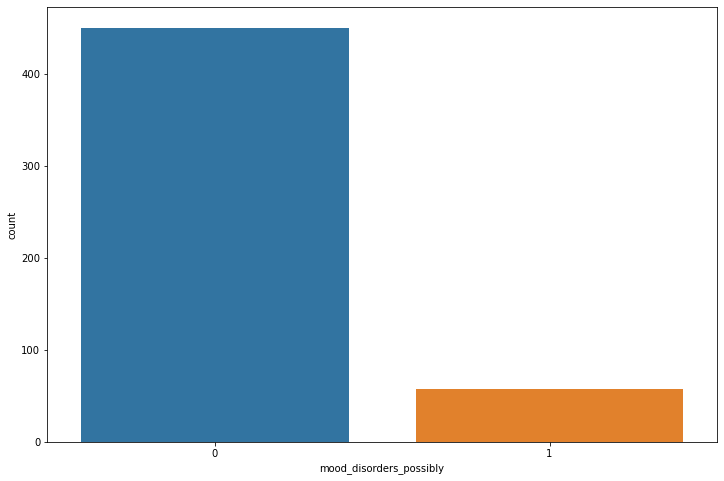

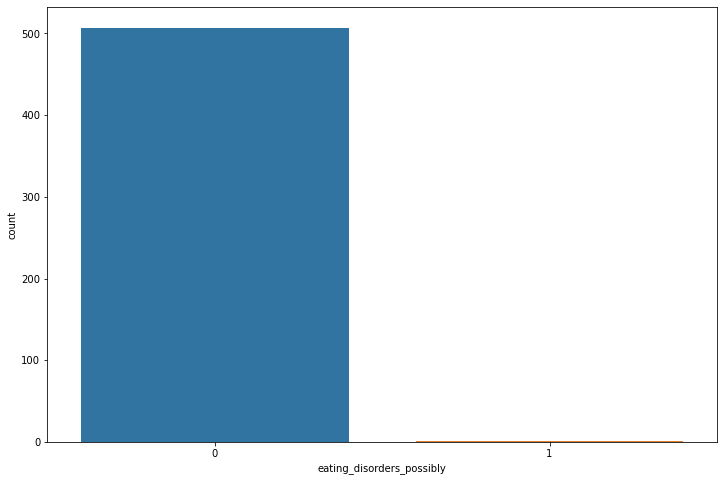

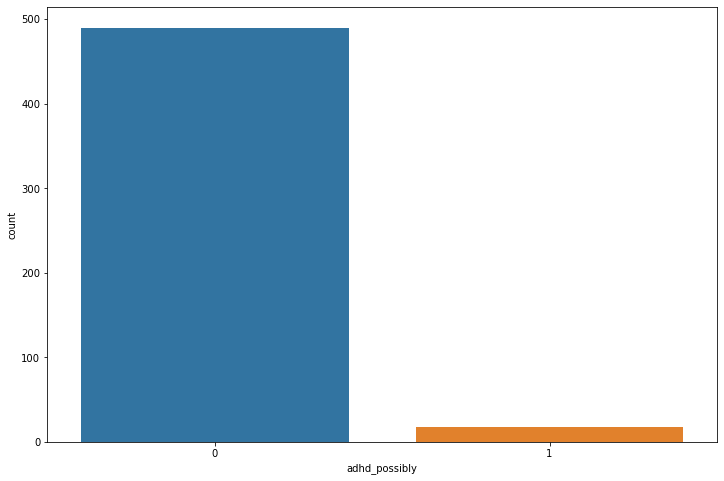

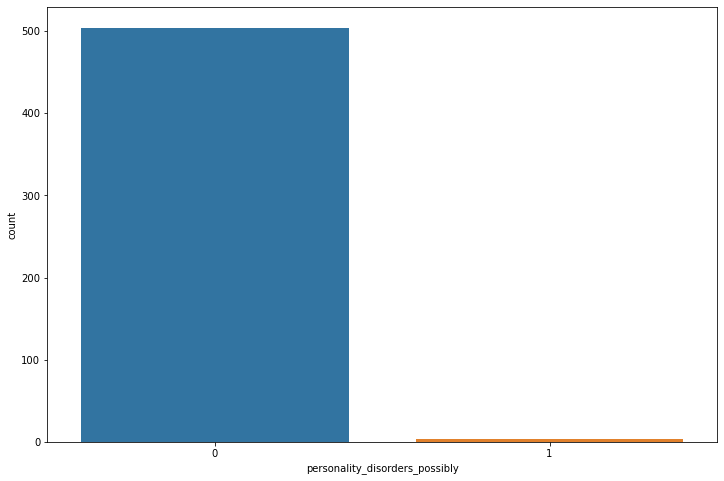

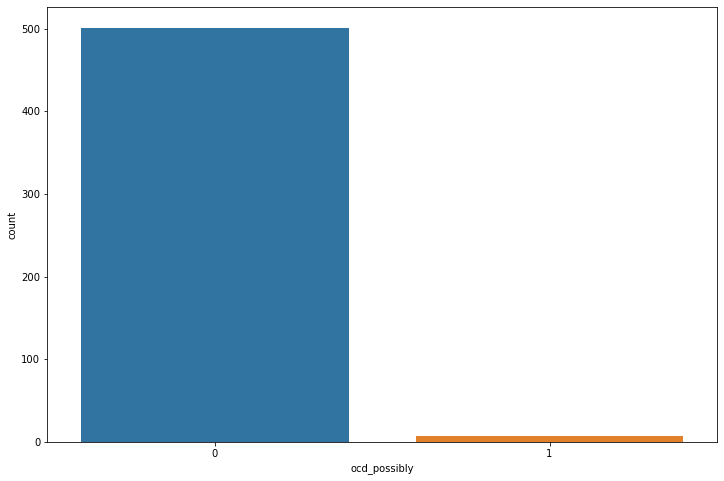

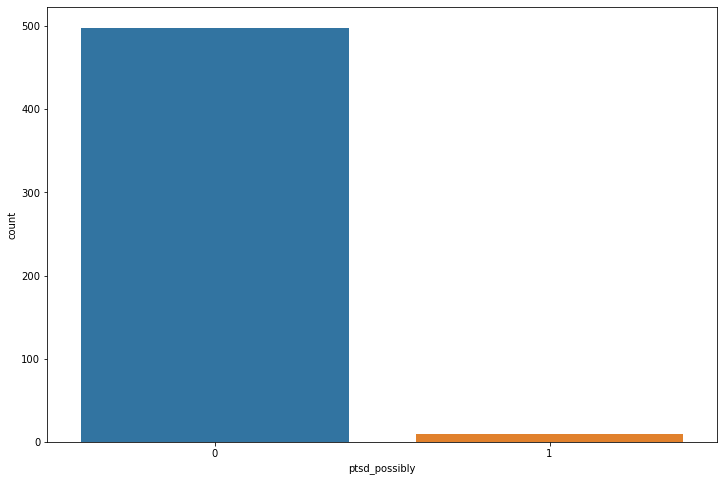

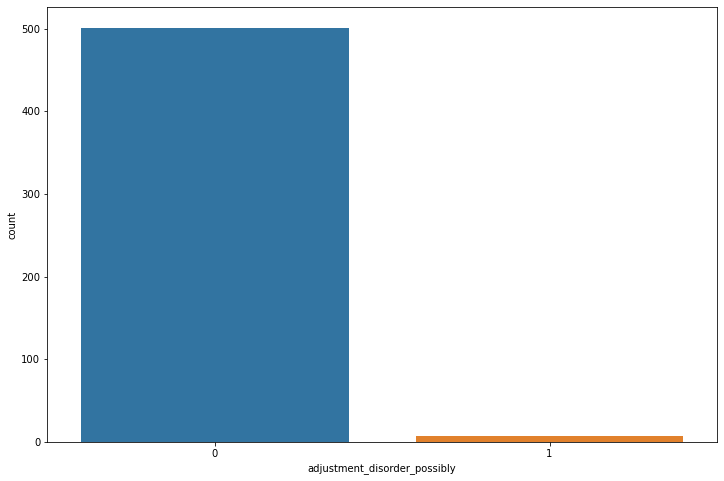

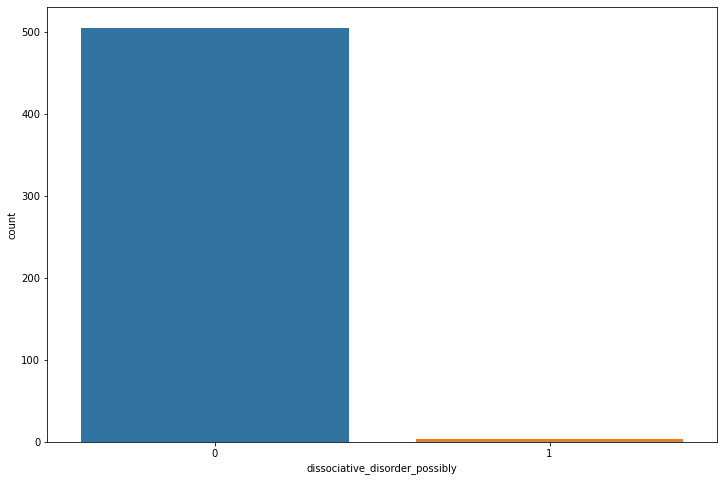

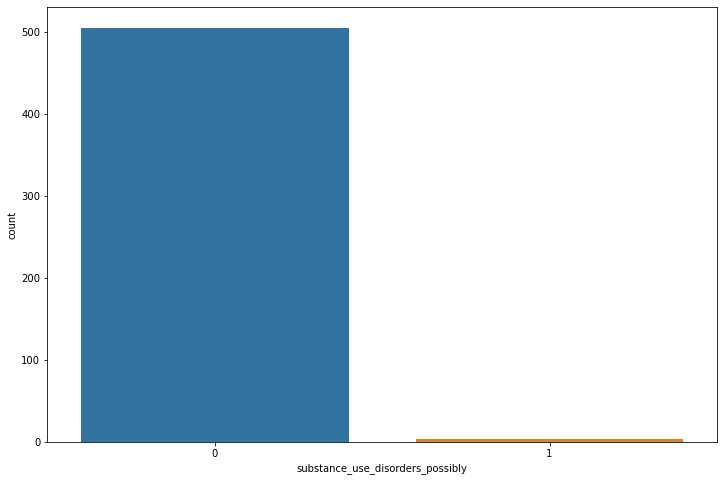

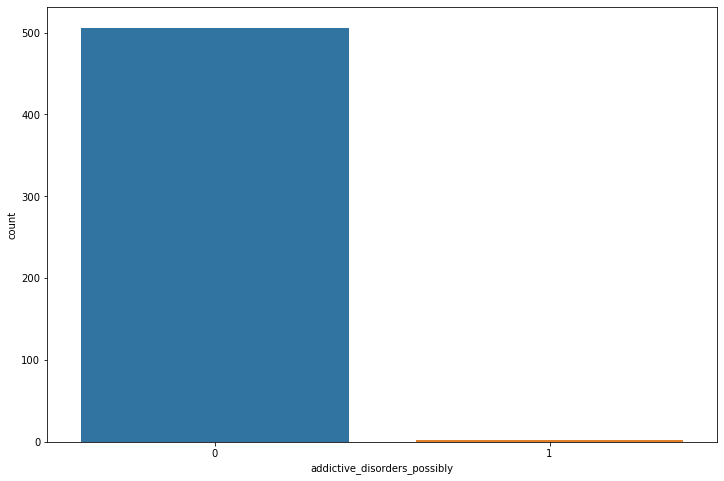

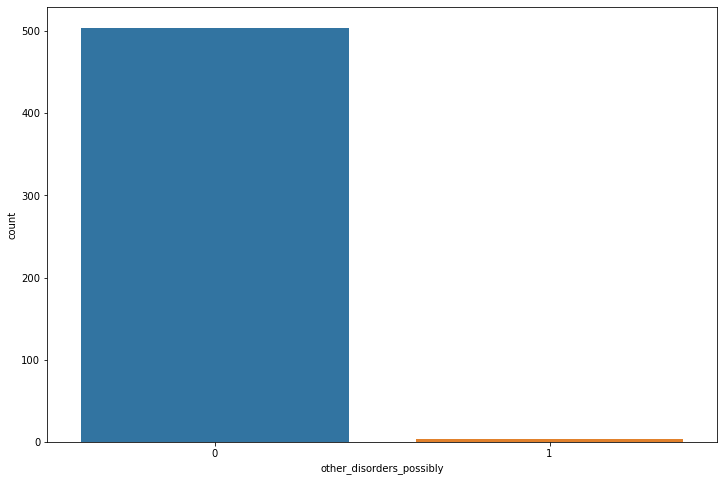

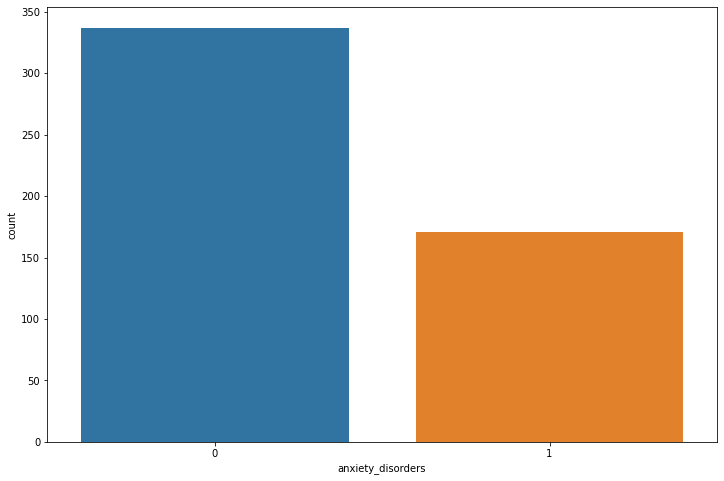

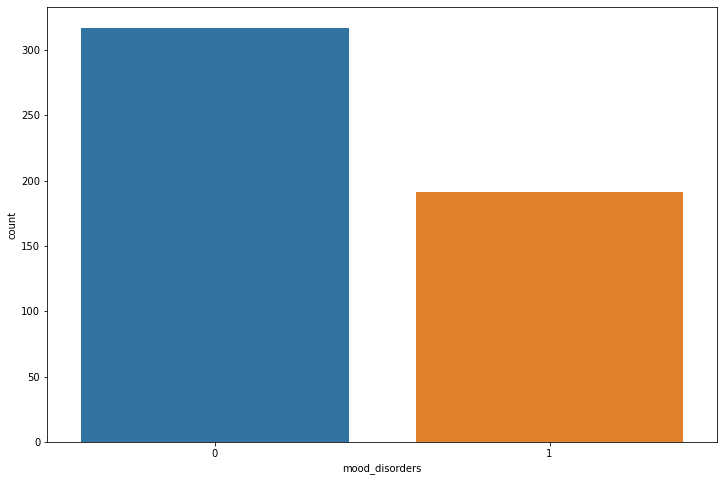

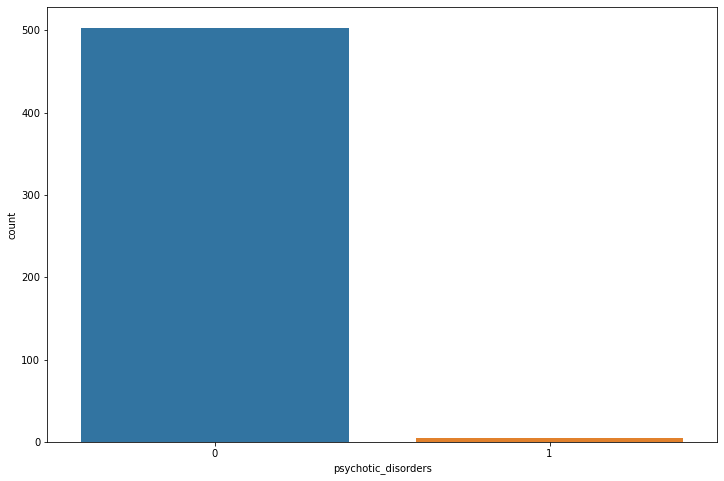

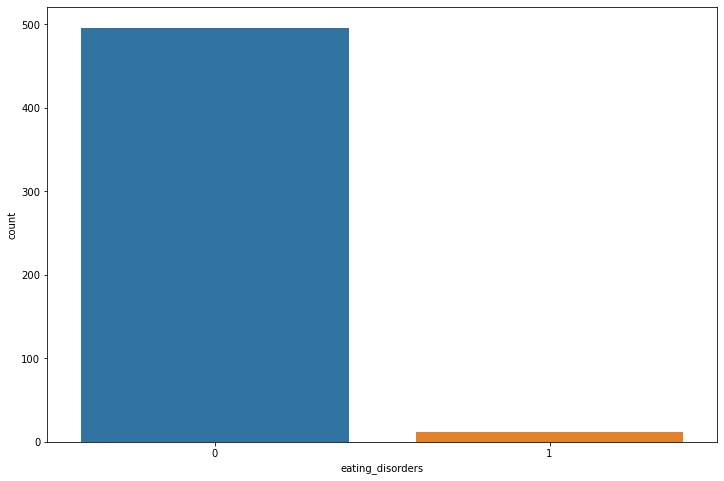

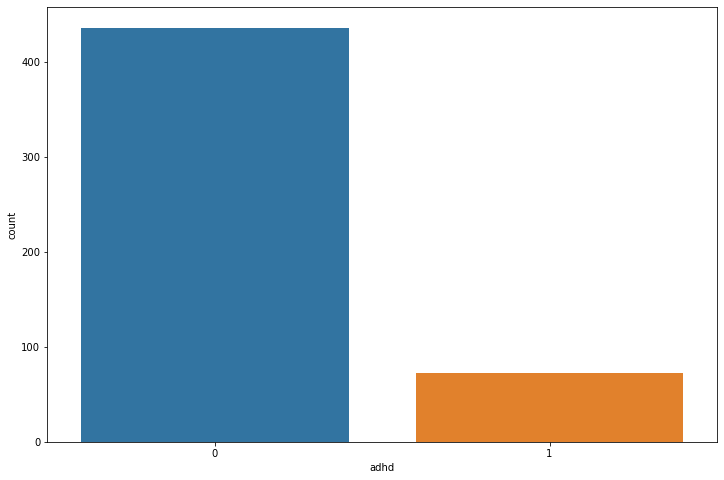

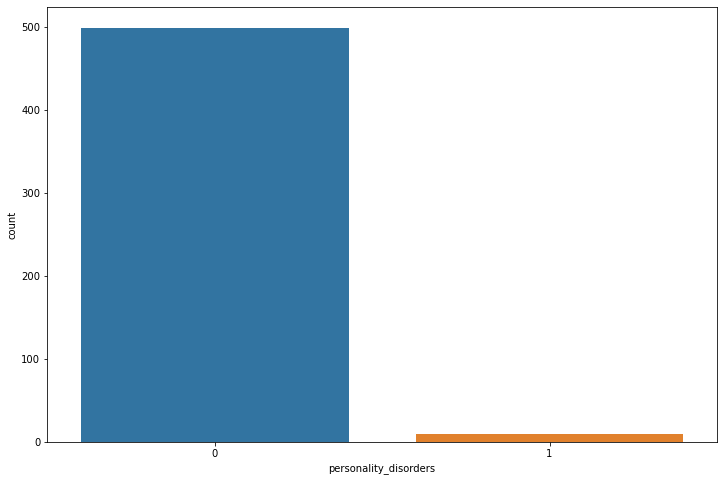

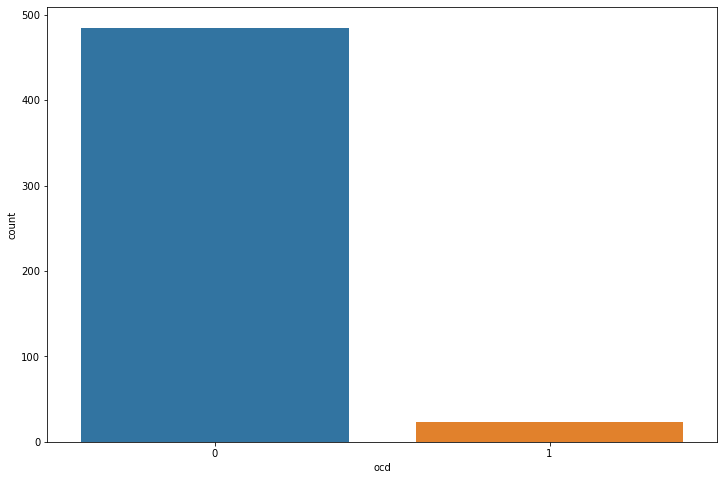

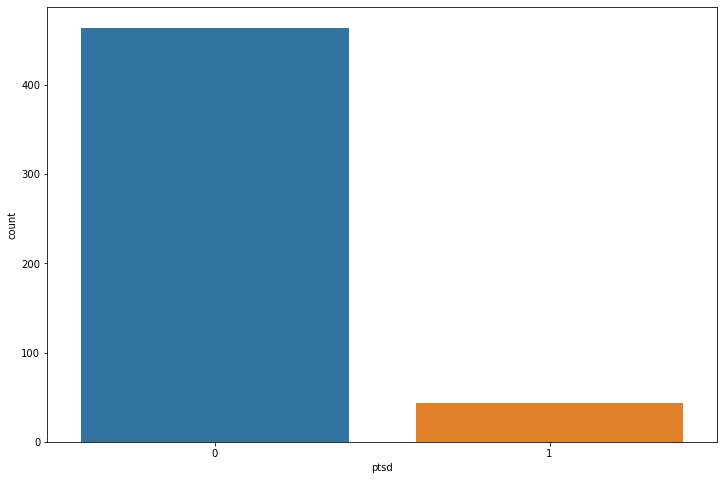

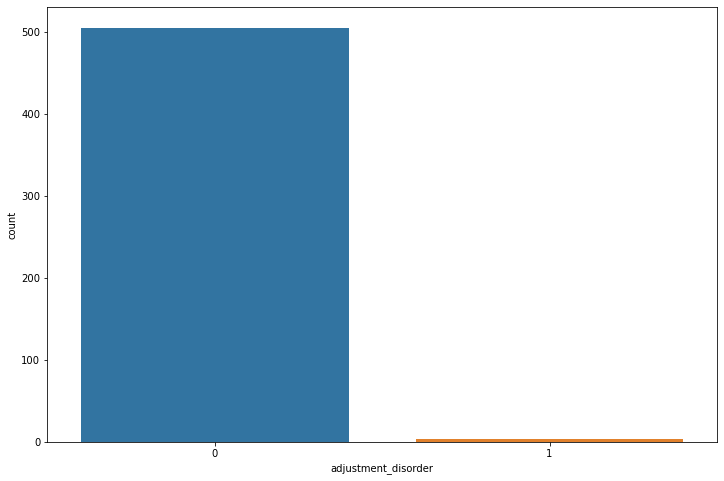

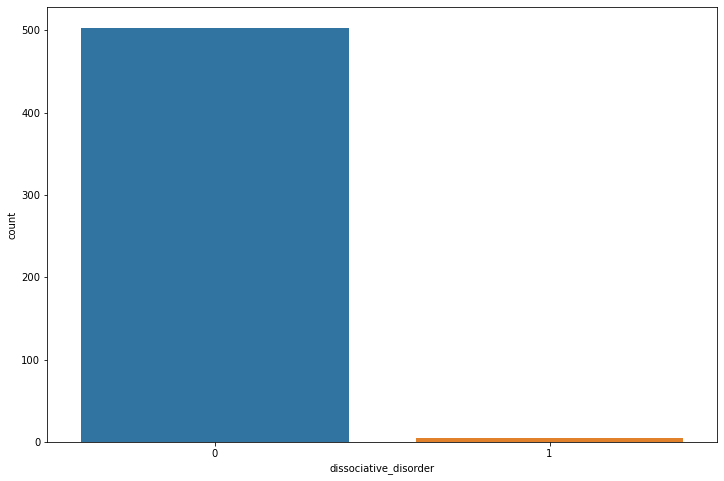

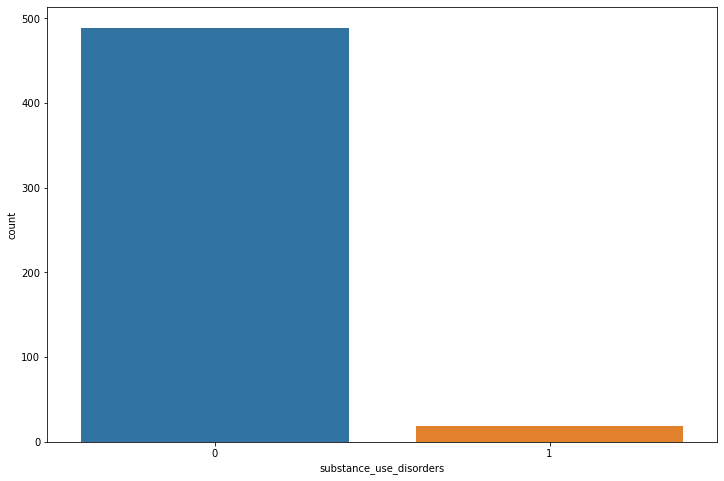

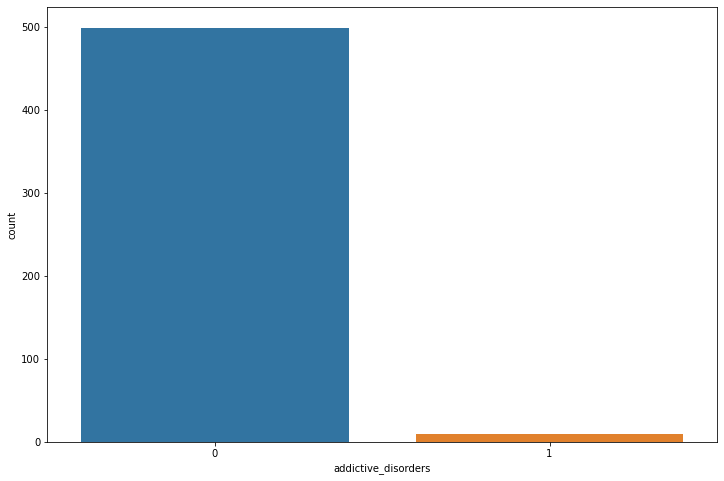

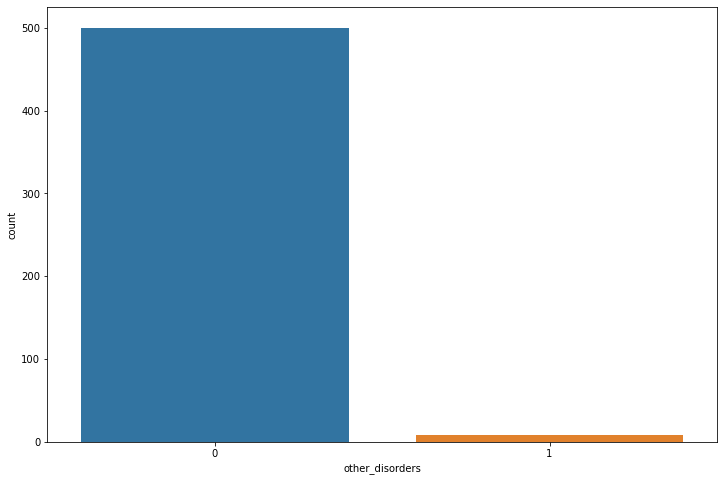

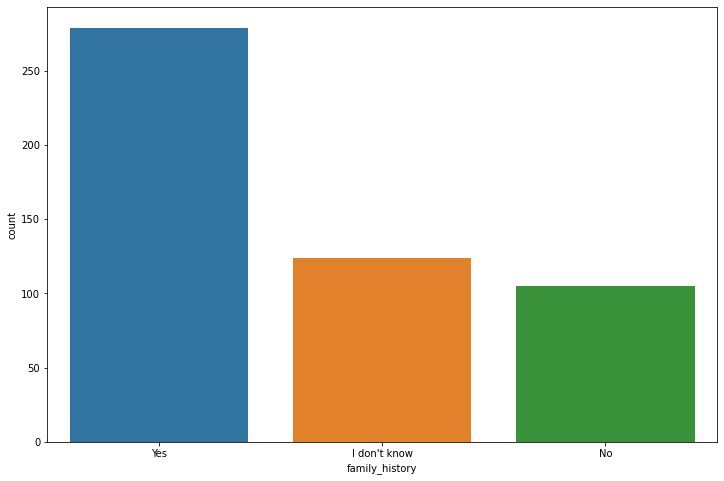

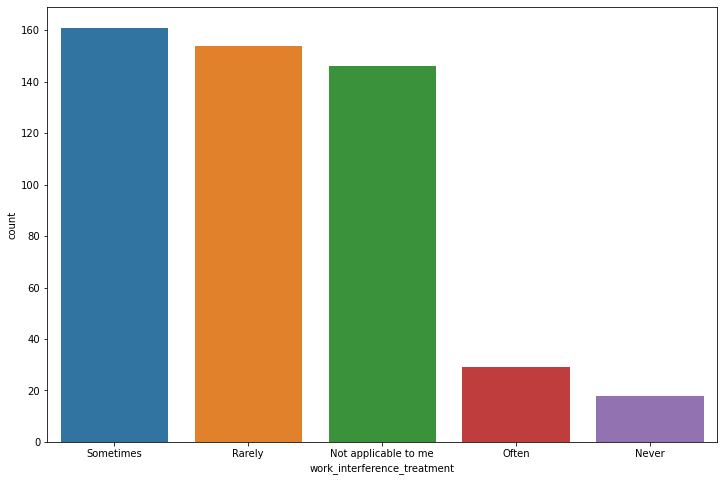

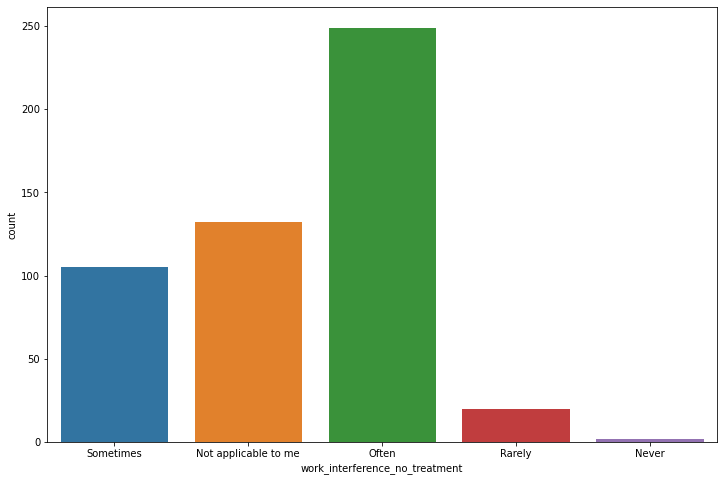

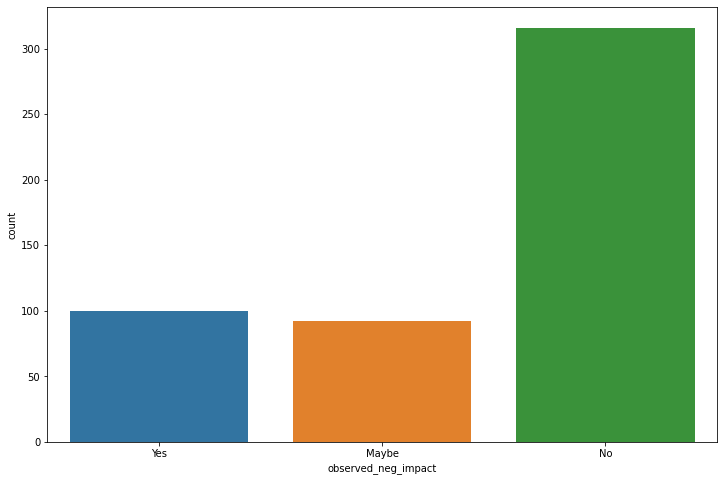

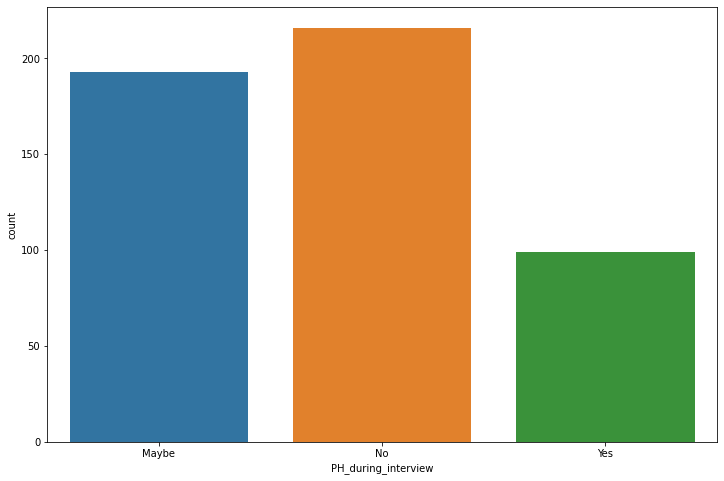

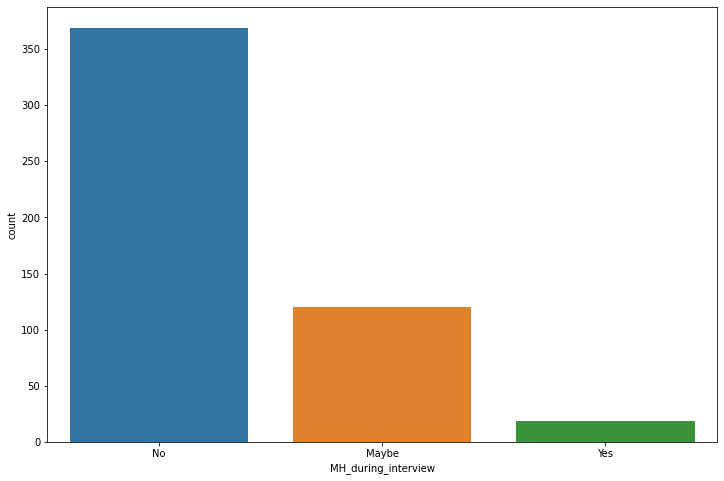

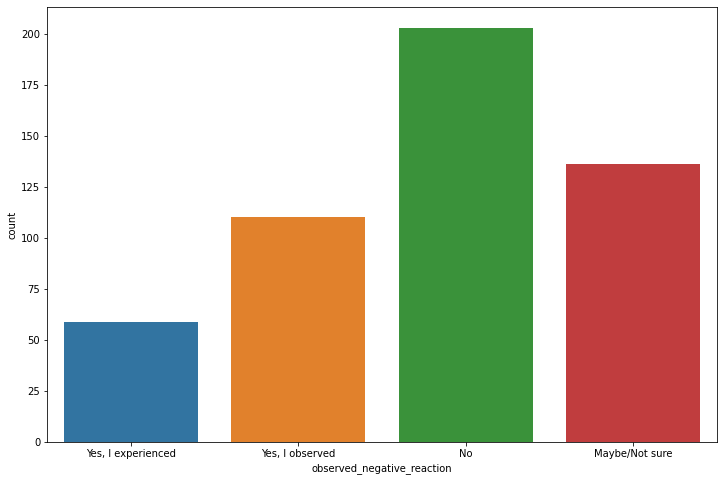

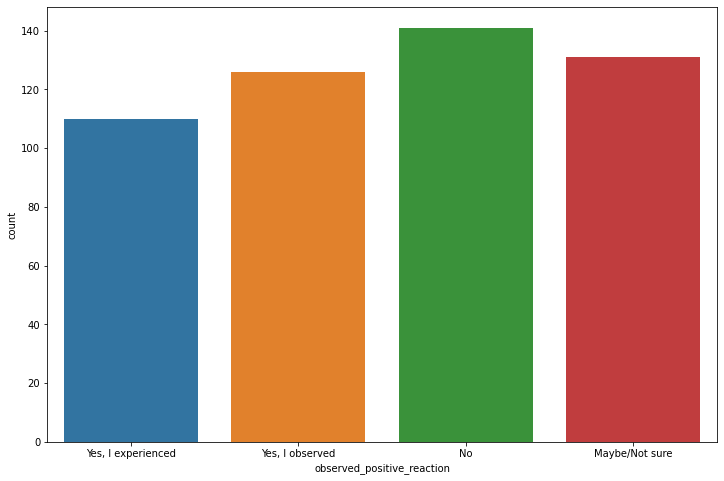

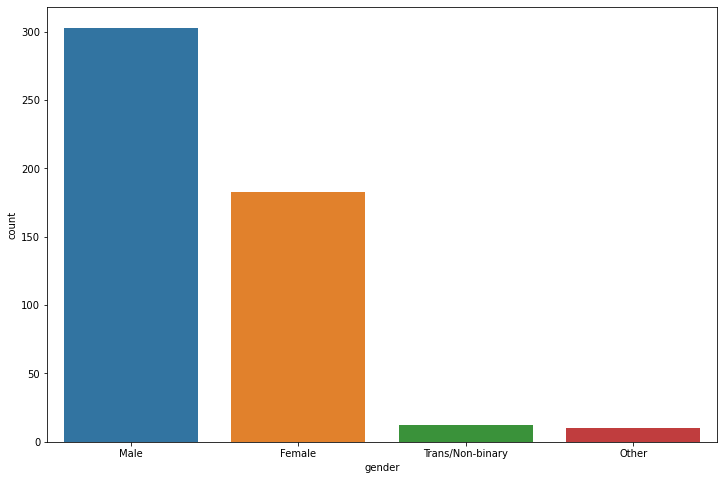

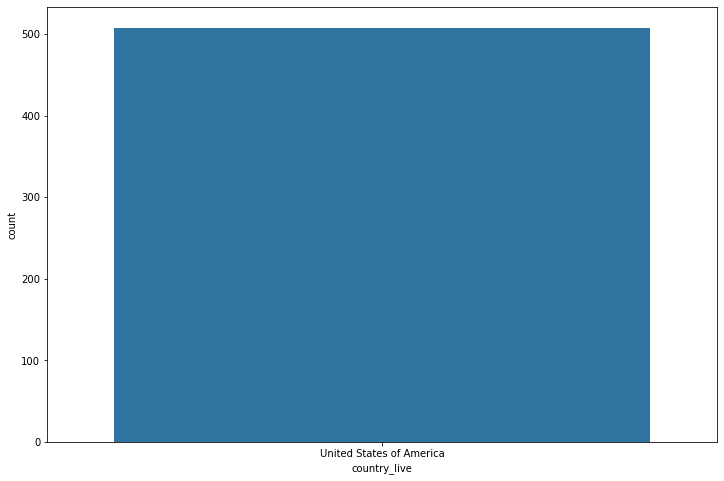

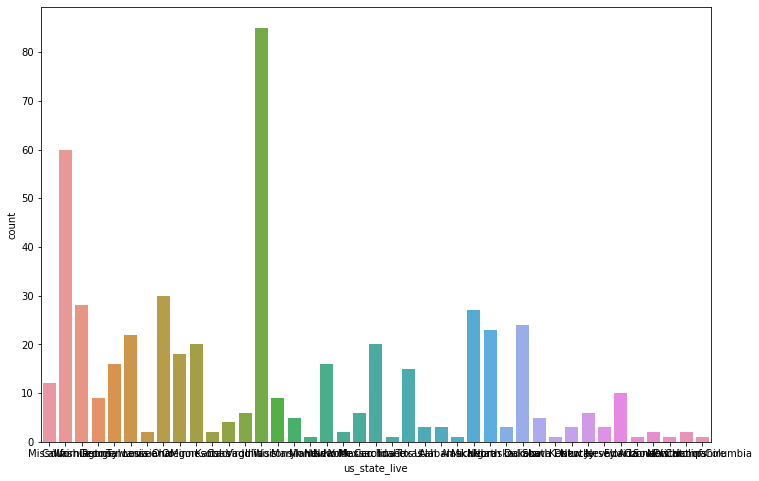

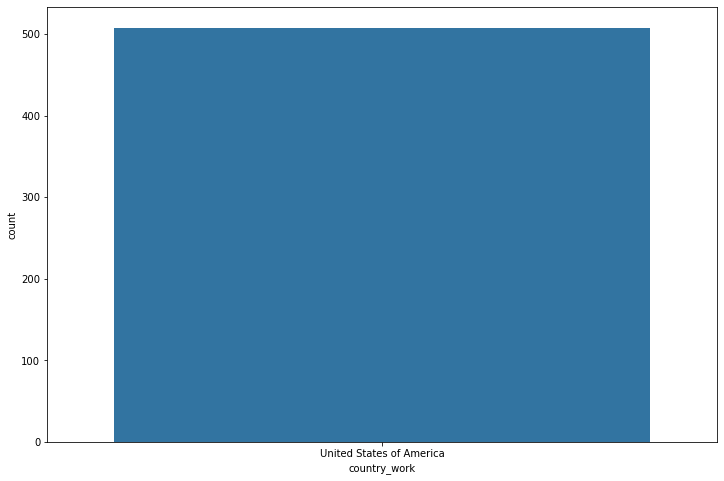

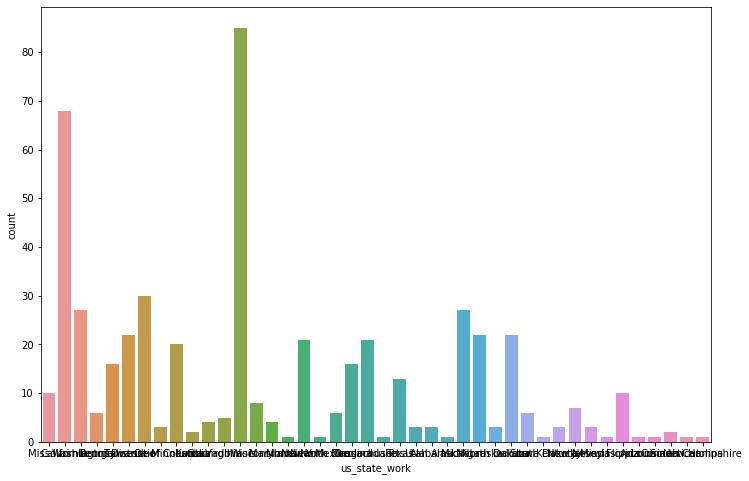

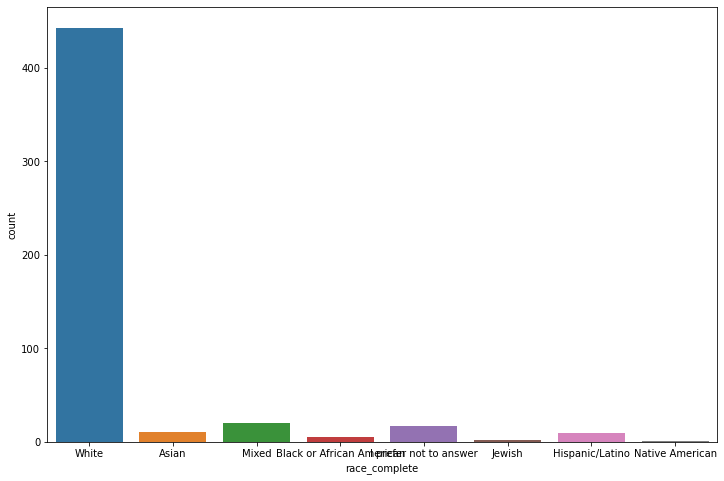

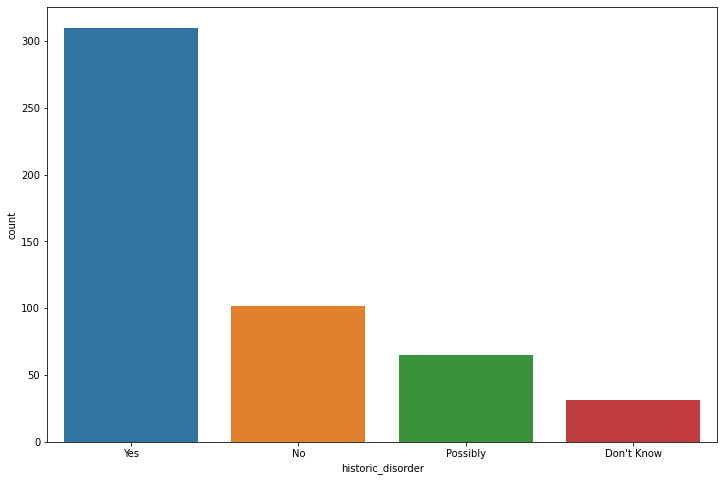

In [56]:
# count plots for categorical variables

categoricals = clean_data_us.select_dtypes(exclude='number')

for variables in categoricals:
    plt.figure(figsize = (12,8))
    sns.countplot(data = clean_data_us, x = clean_data_us[variables])
    plt.show()

### 3.1.2. Visualizing Target Variable

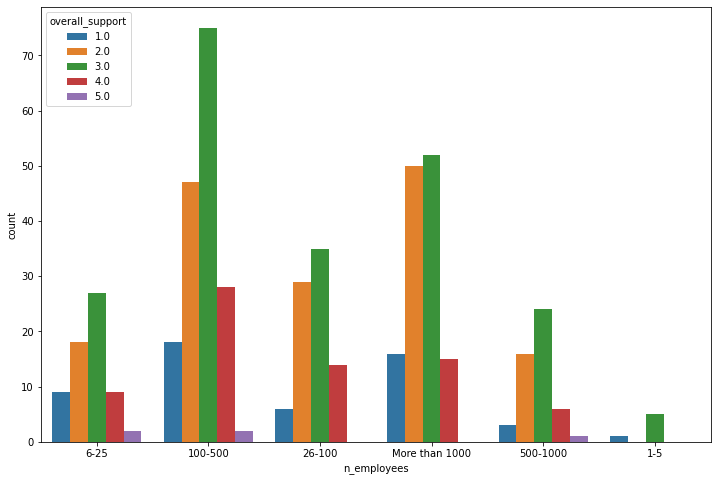

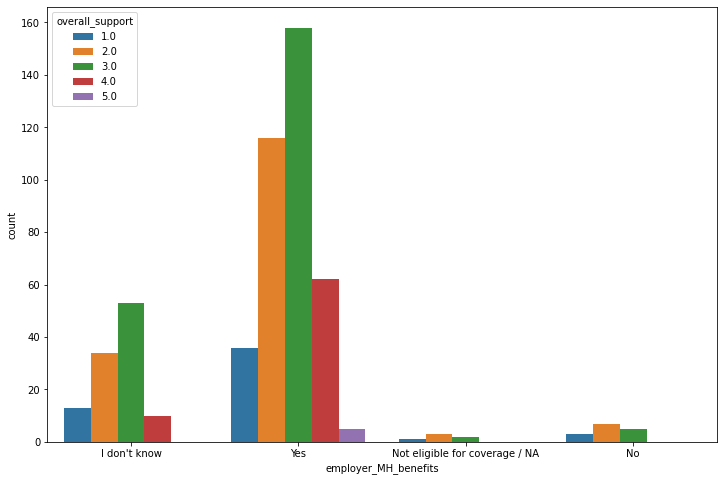

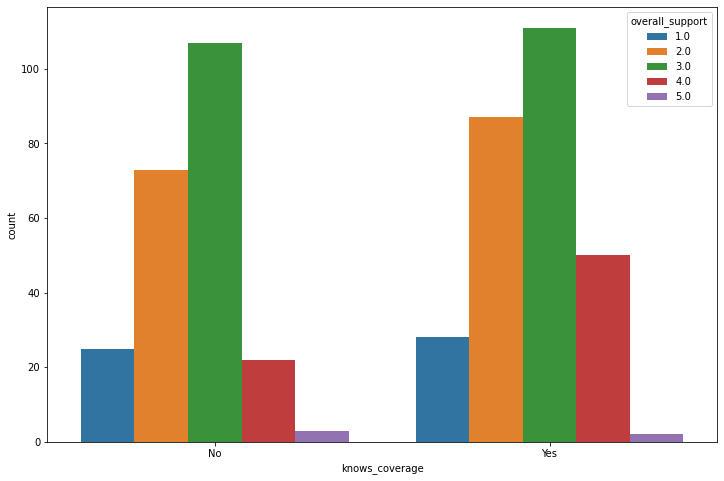

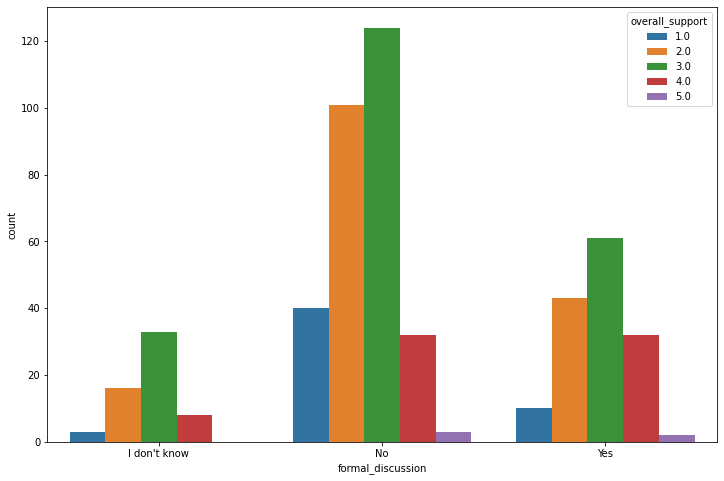

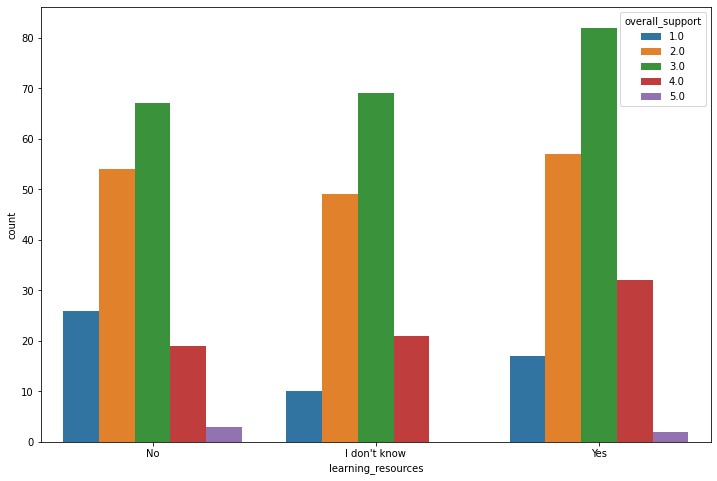

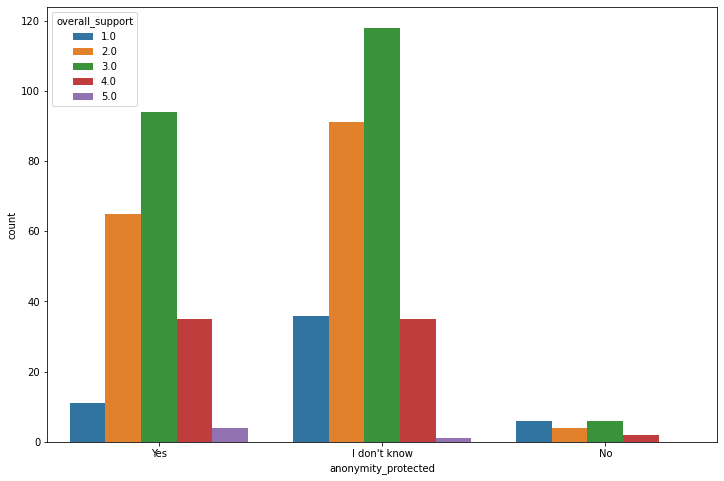

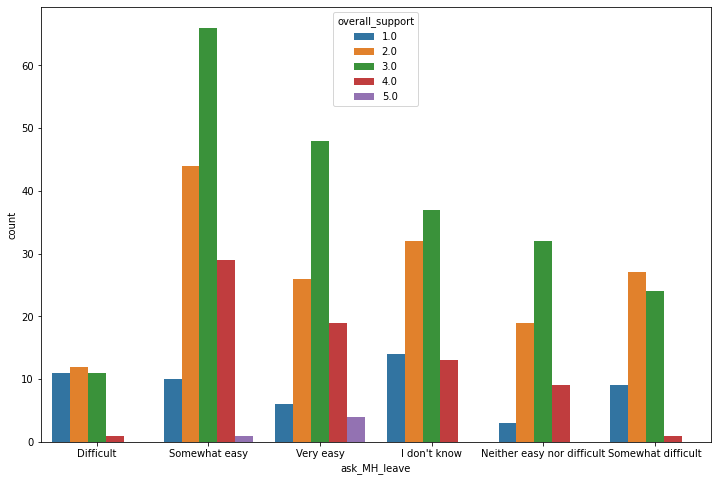

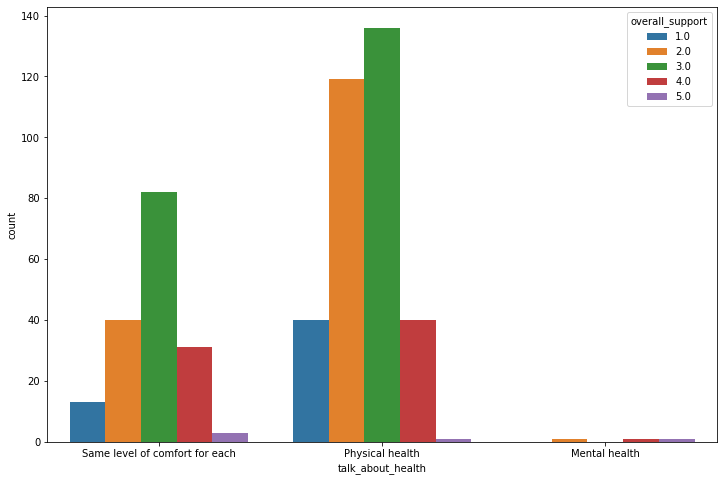

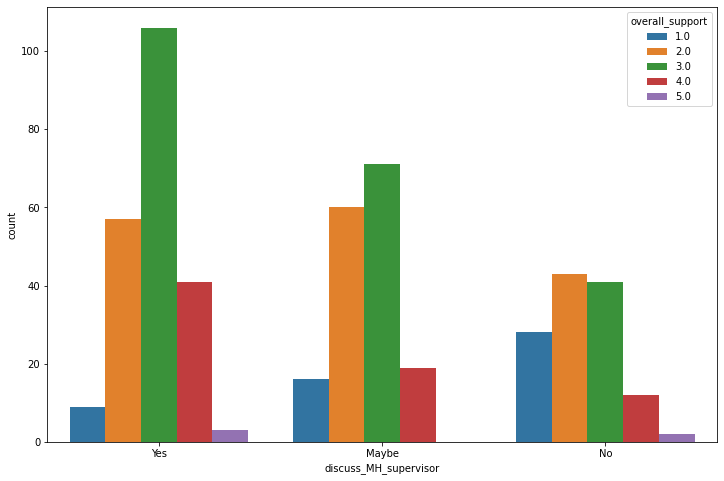

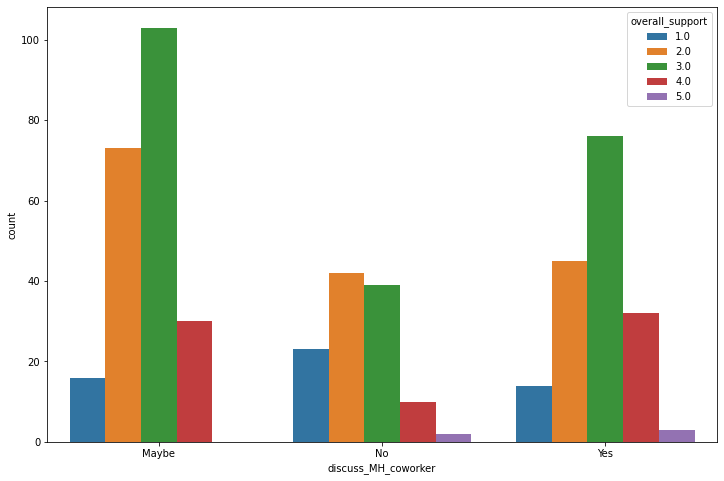

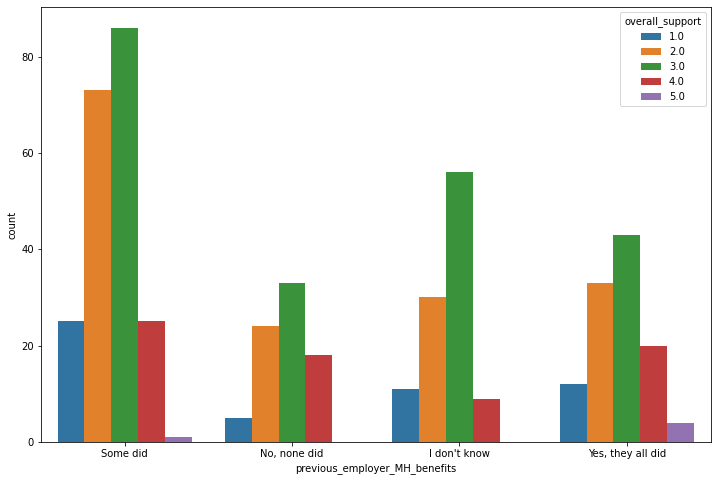

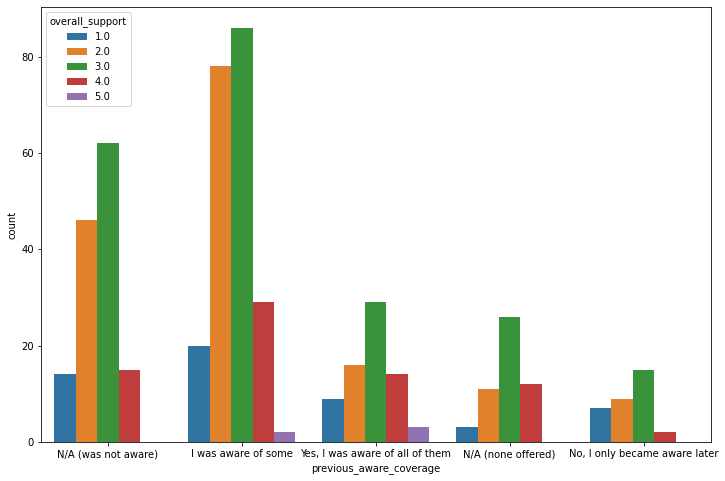

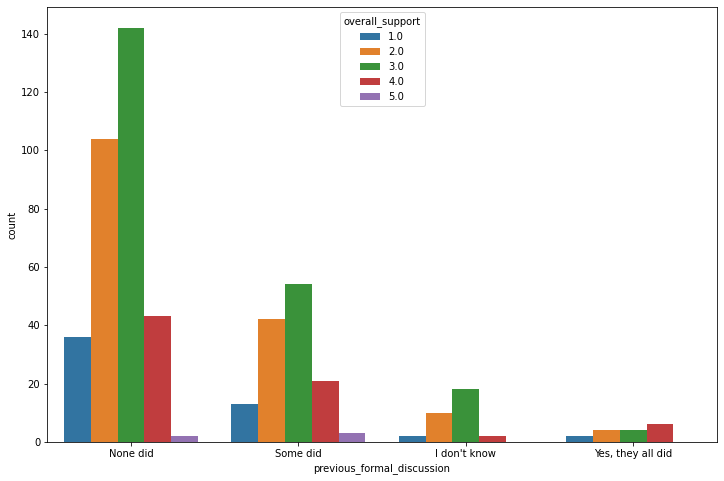

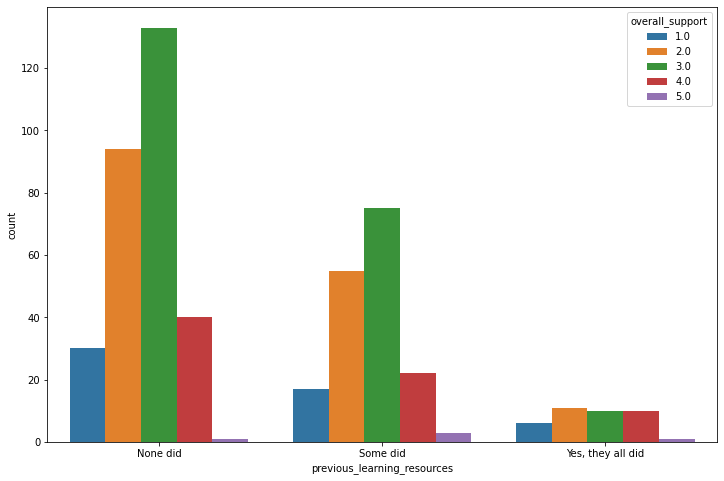

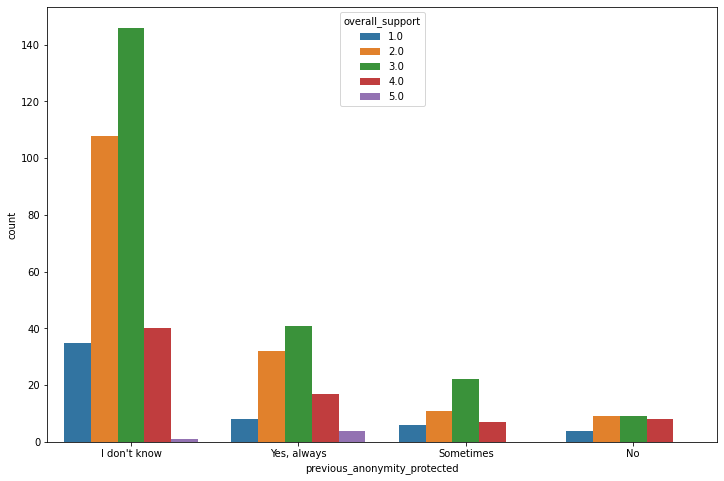

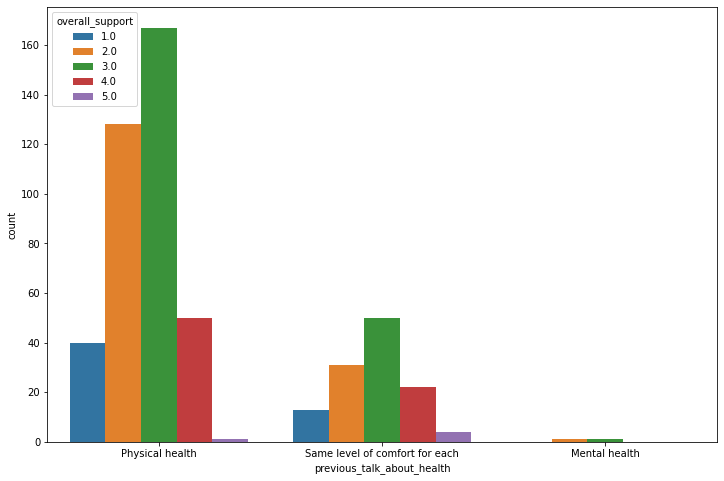

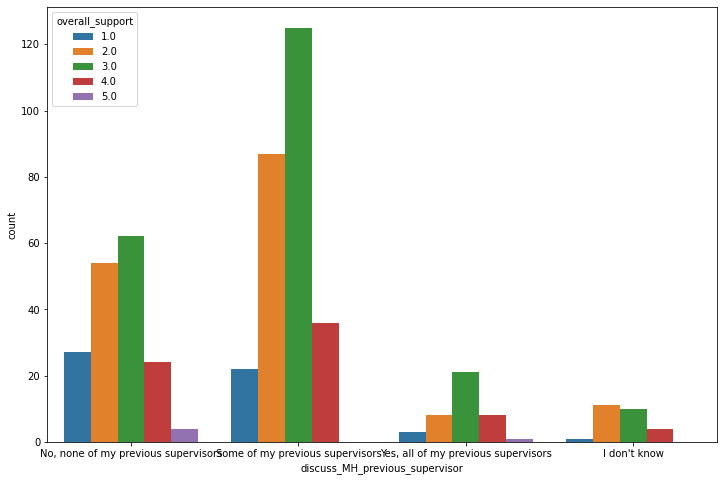

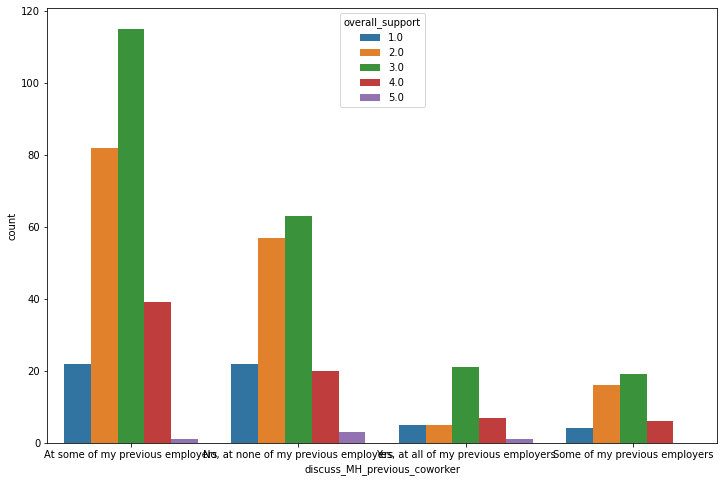

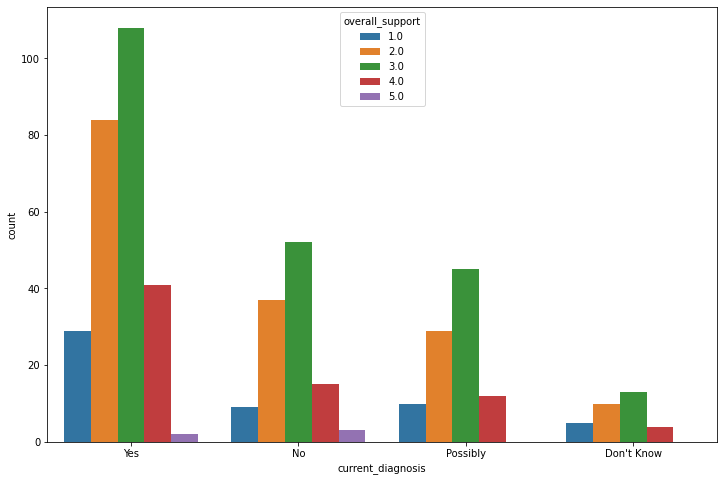

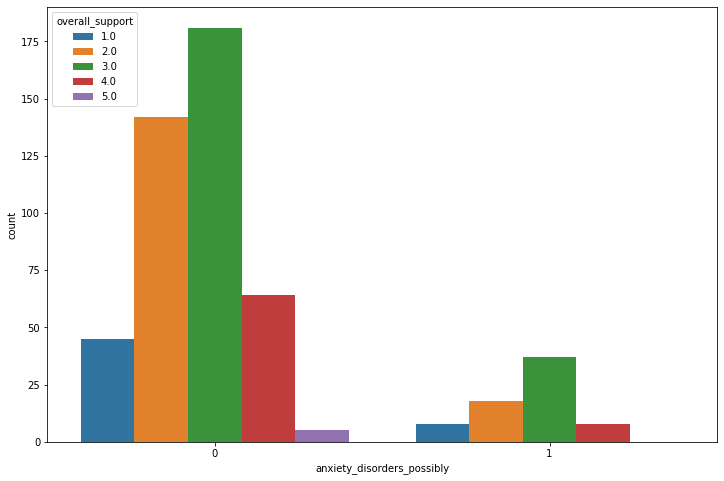

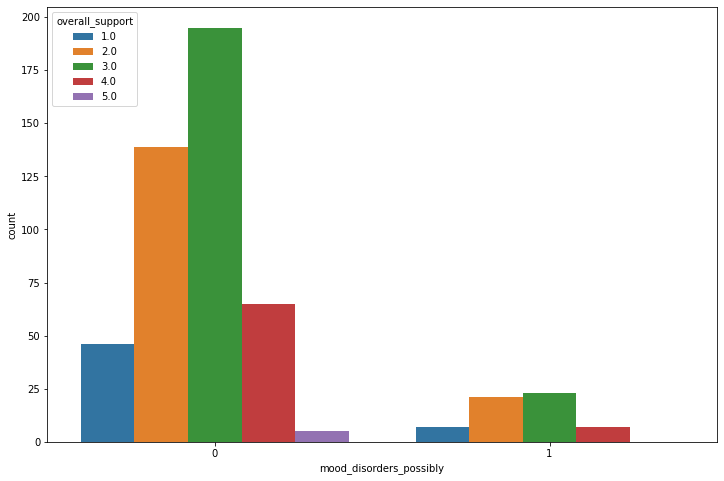

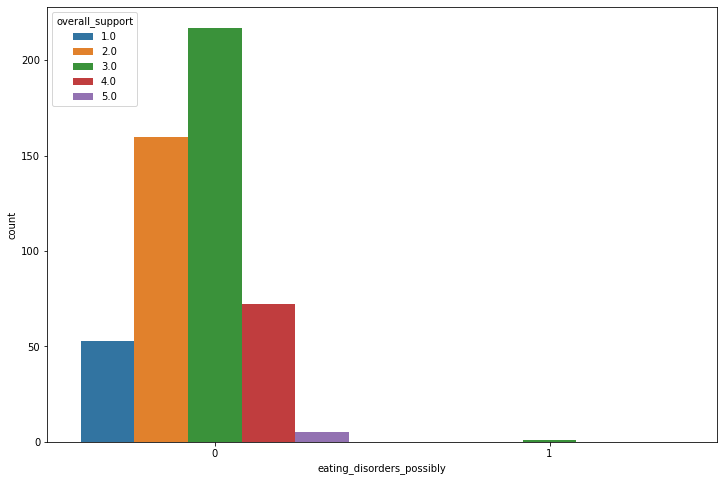

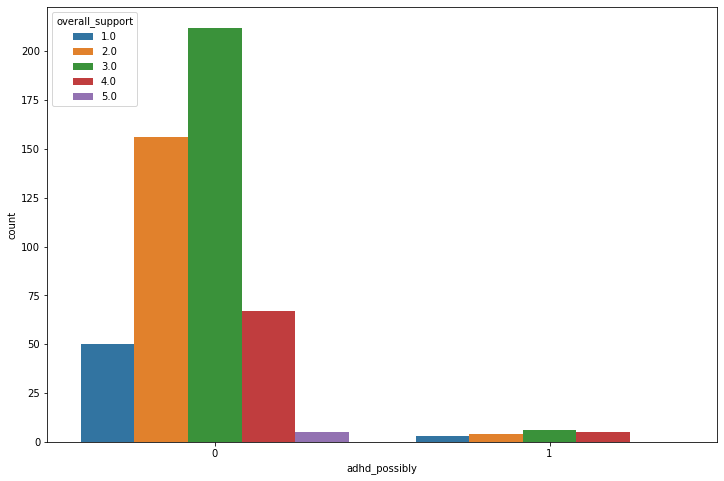

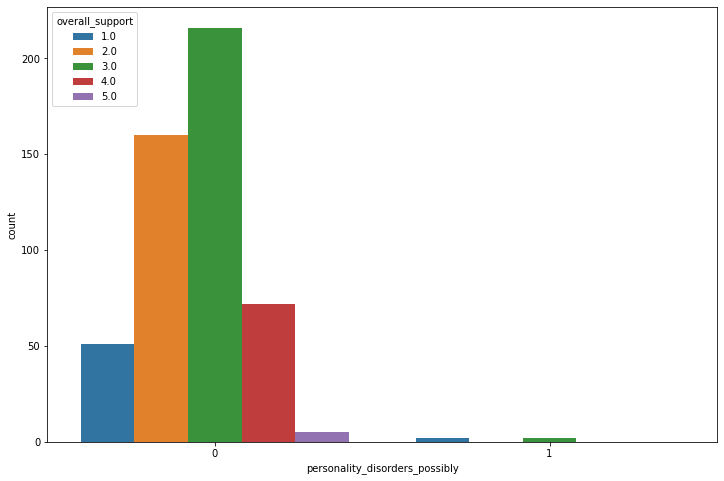

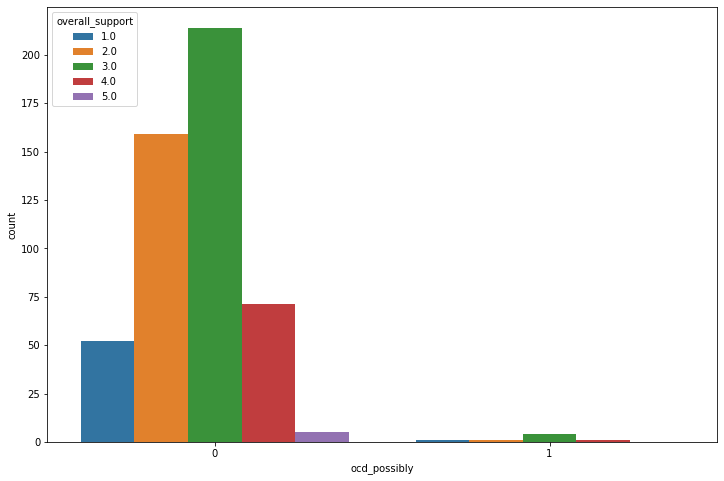

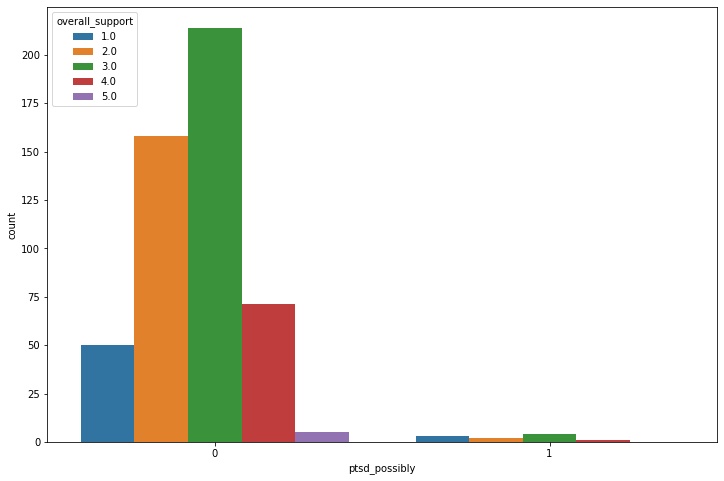

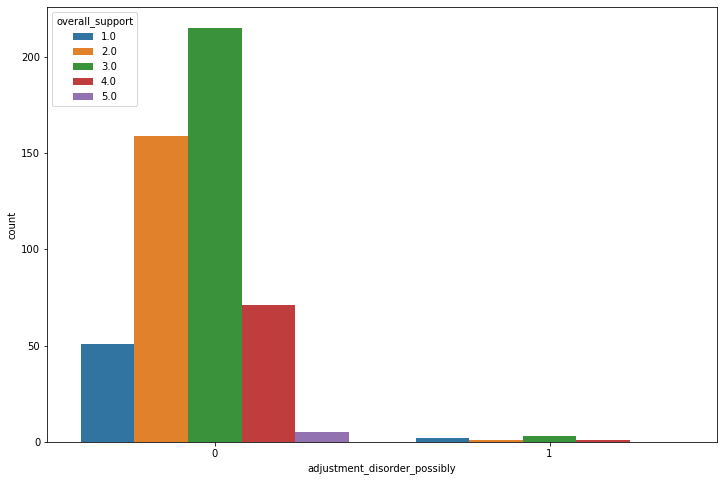

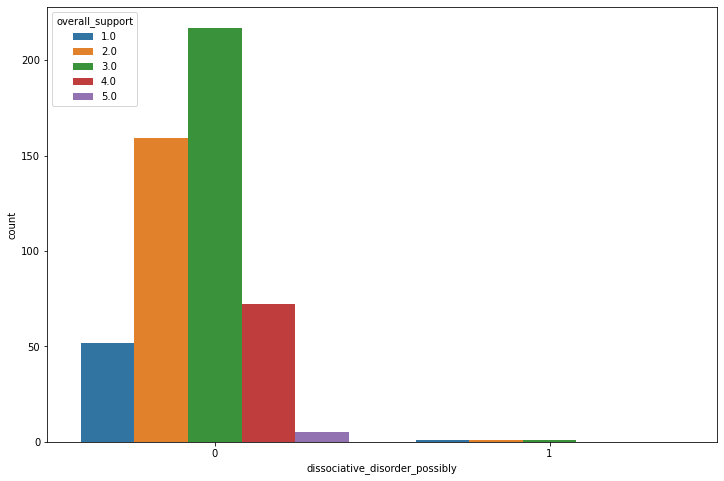

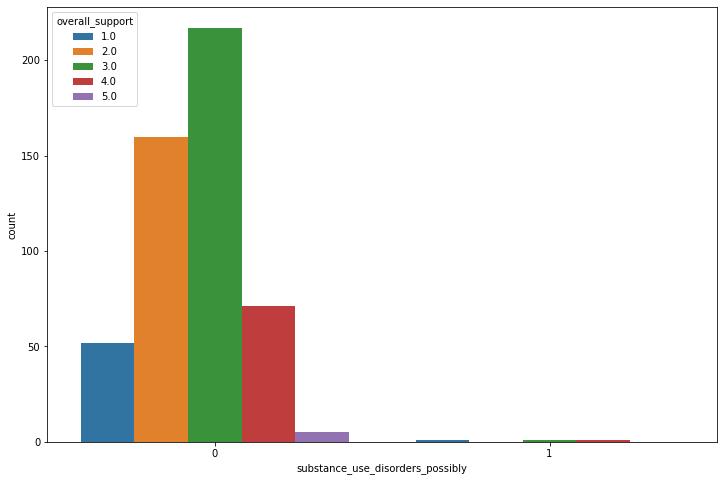

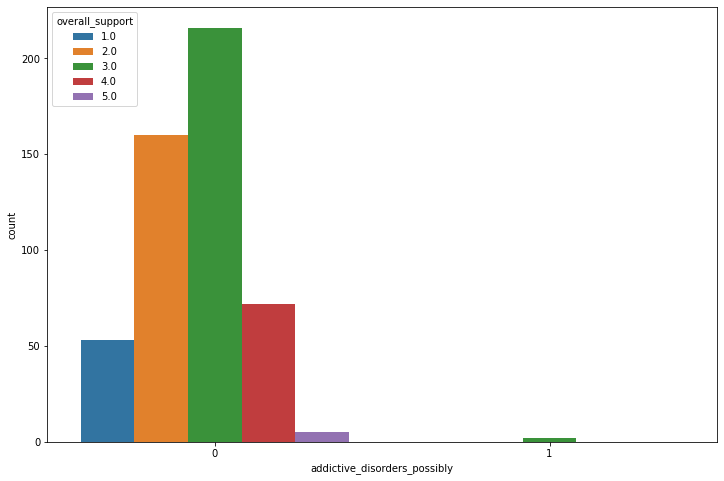

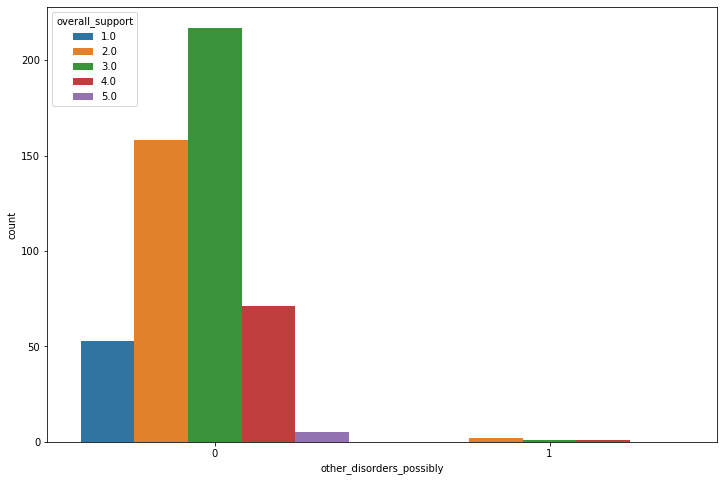

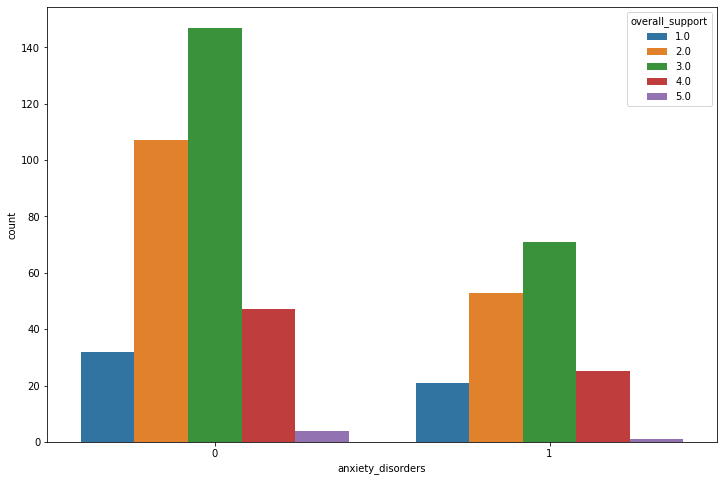

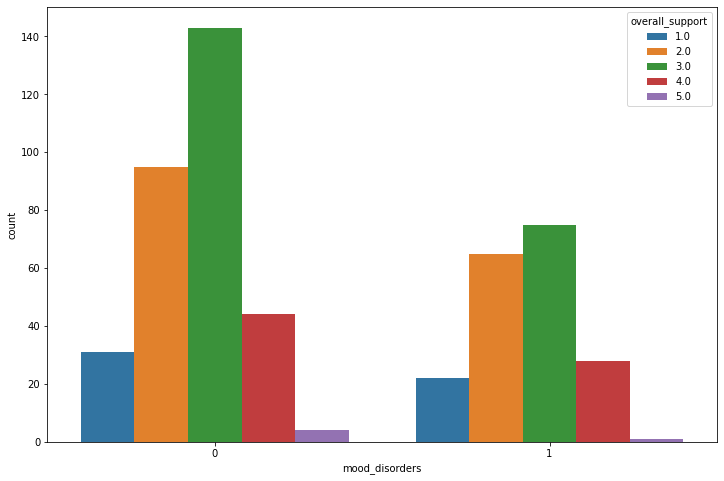

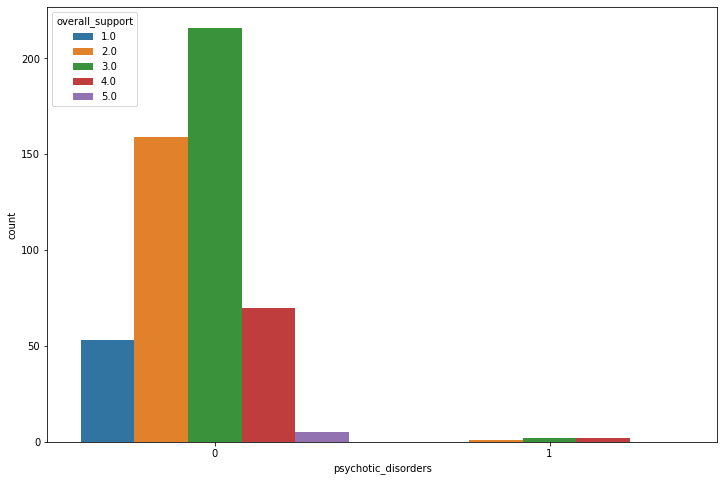

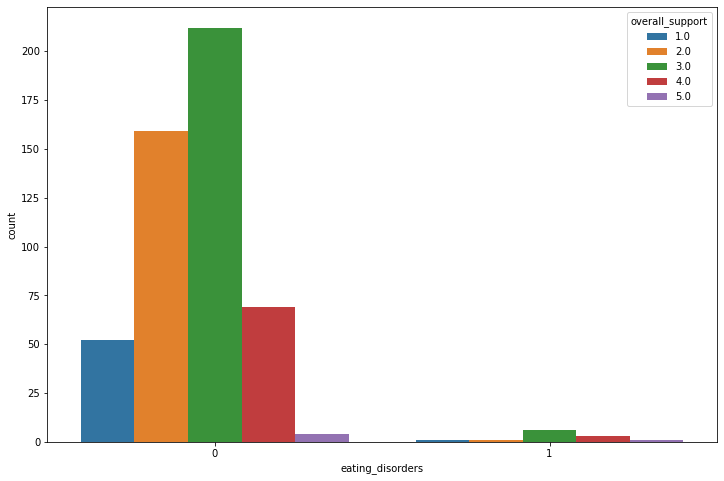

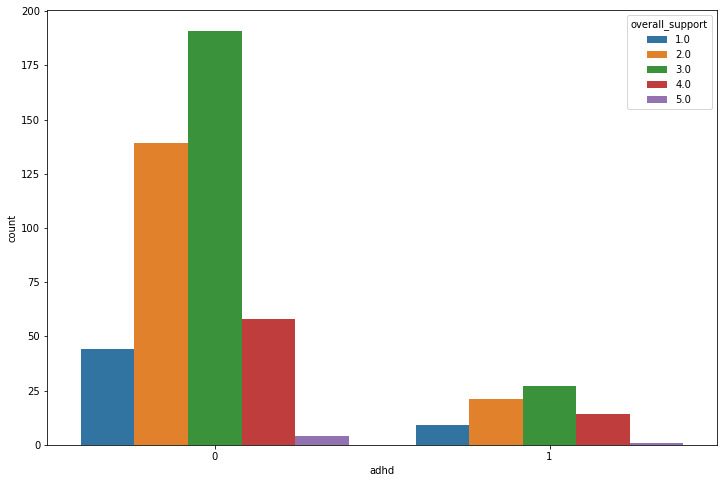

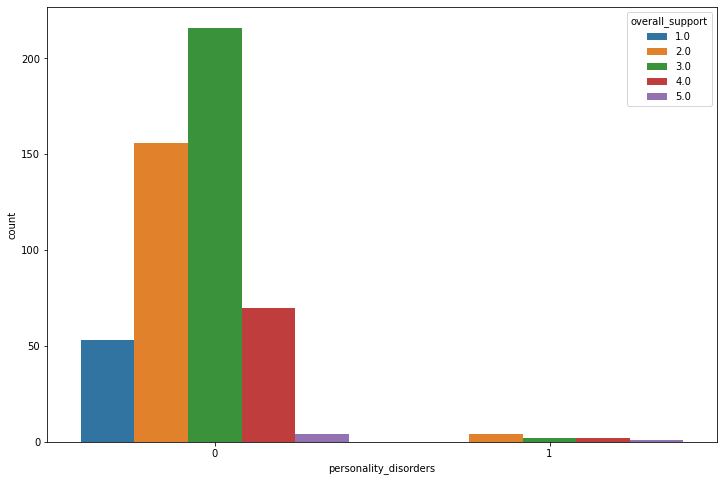

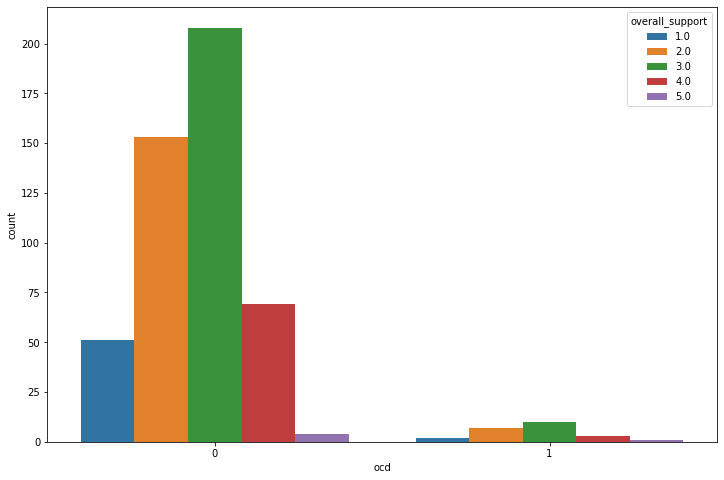

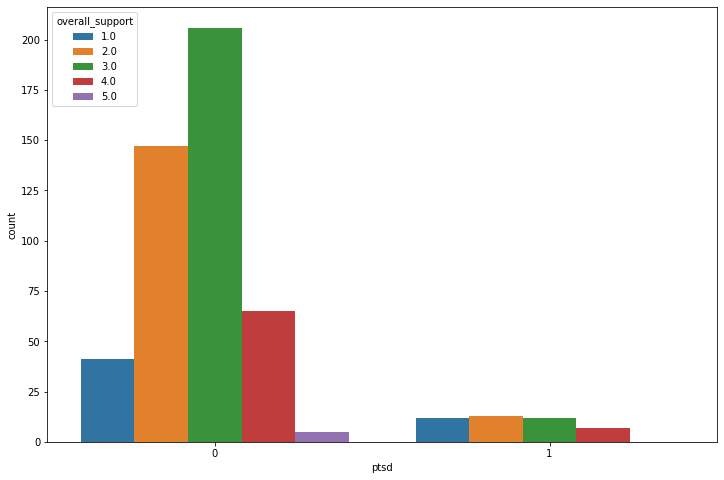

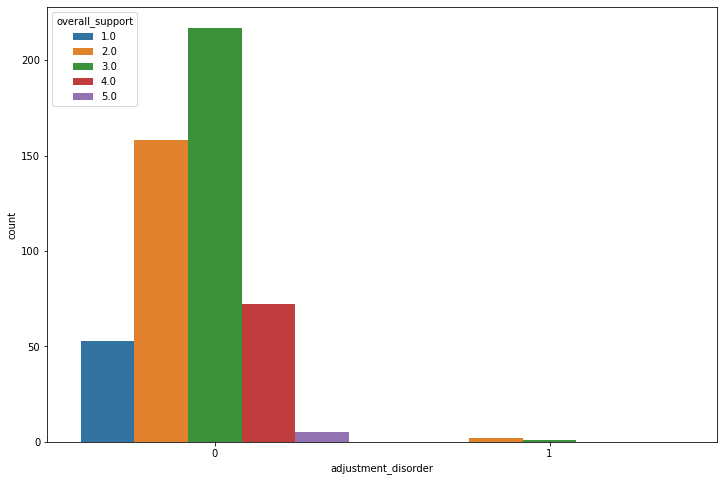

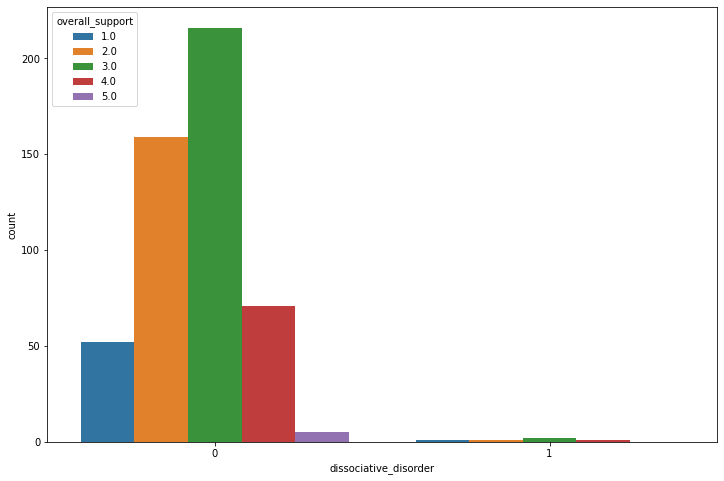

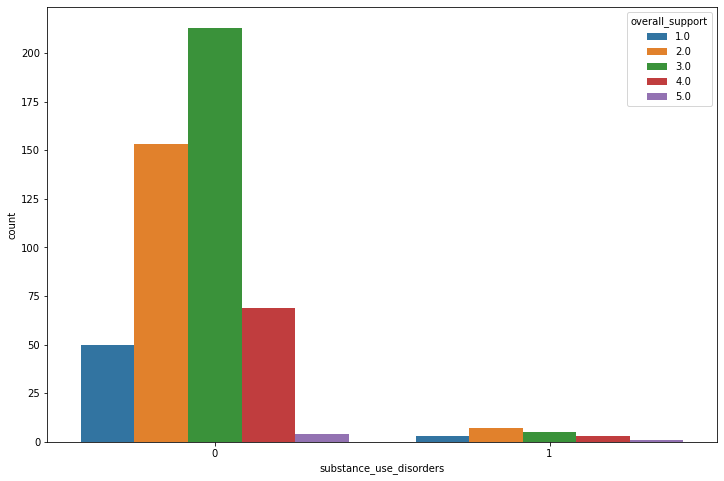

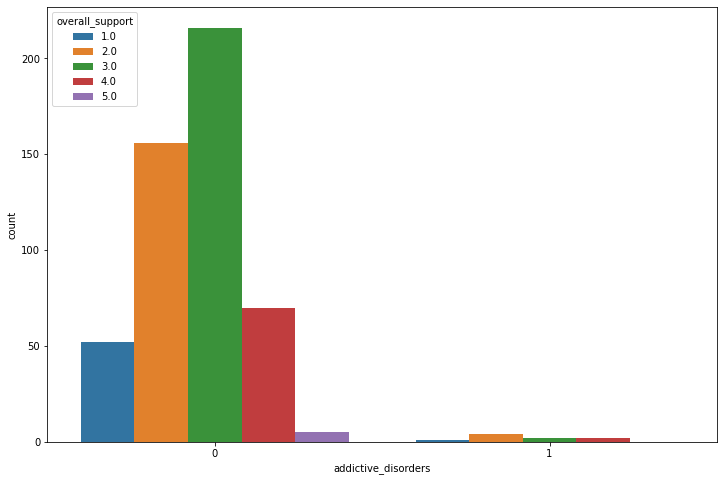

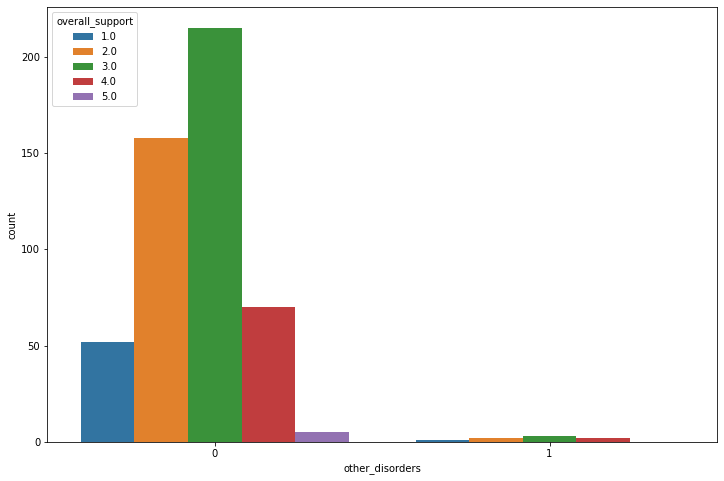

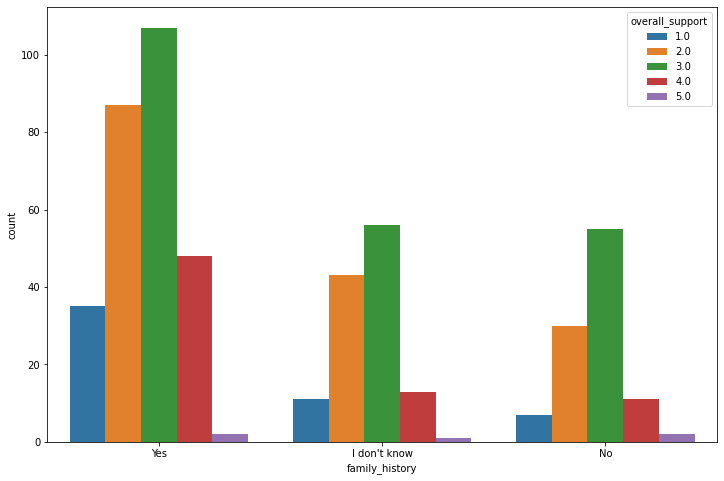

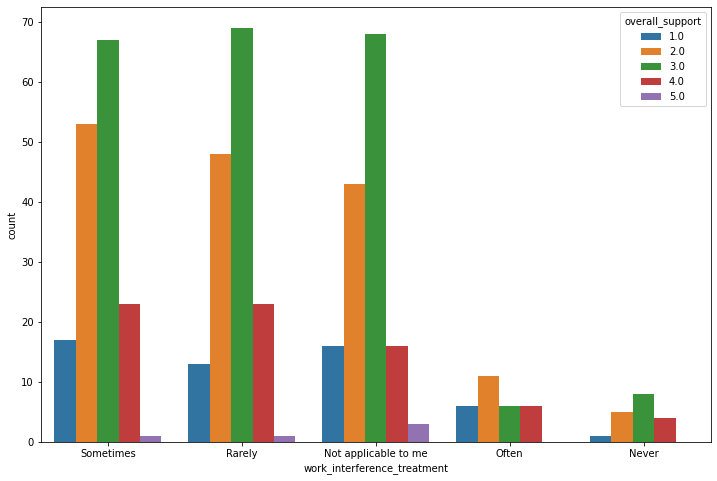

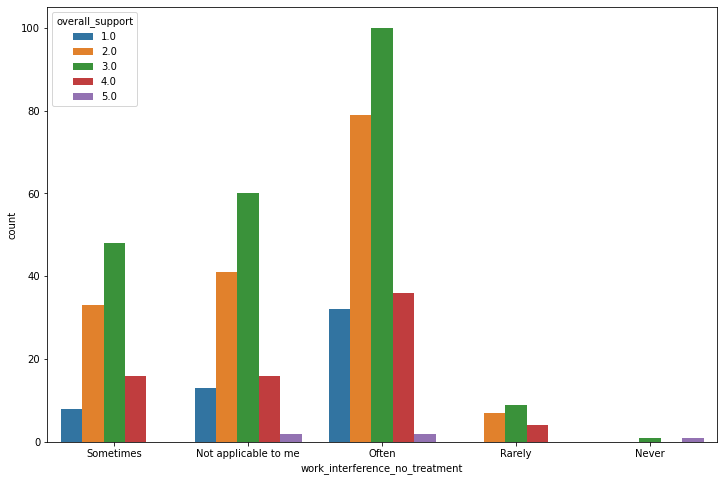

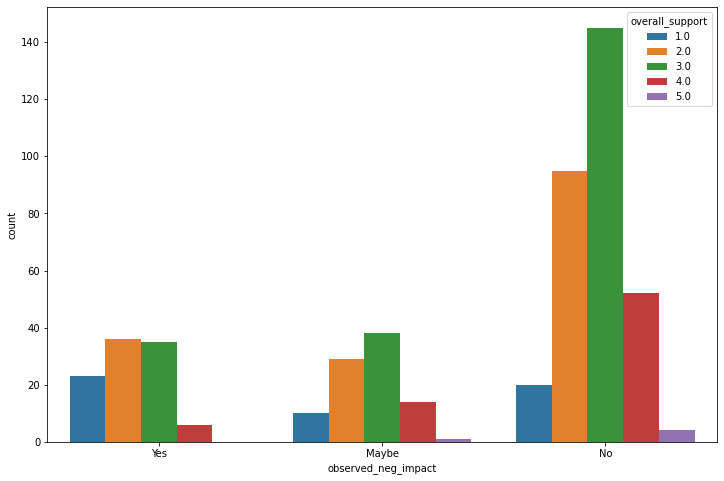

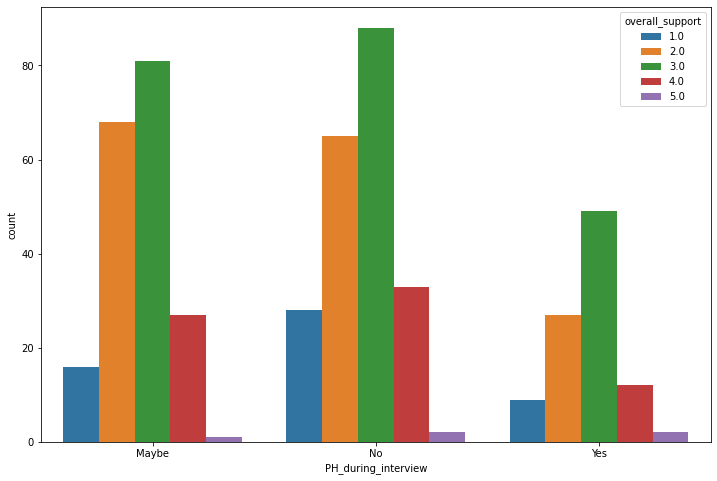

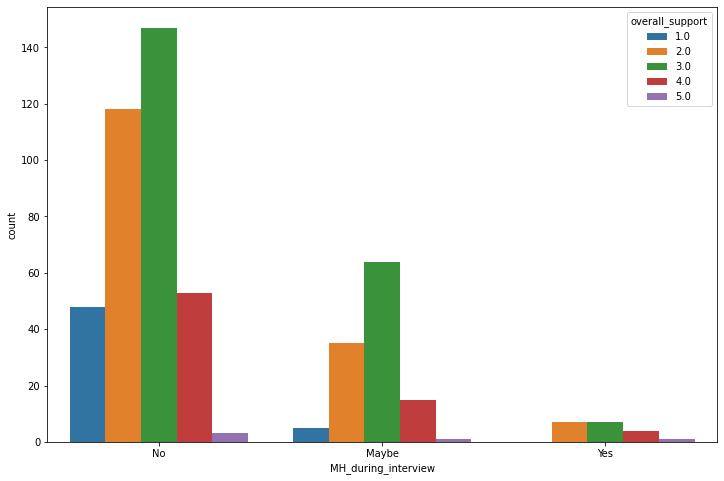

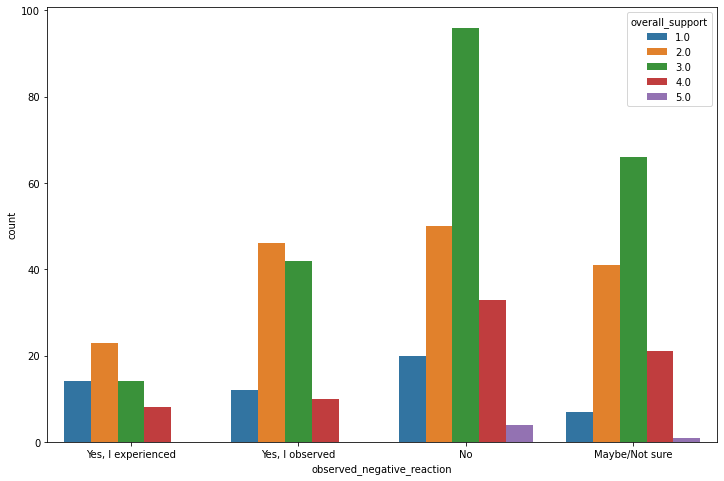

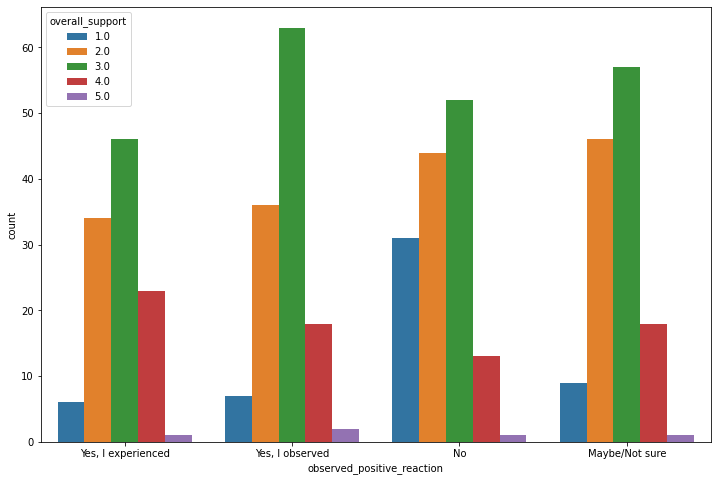

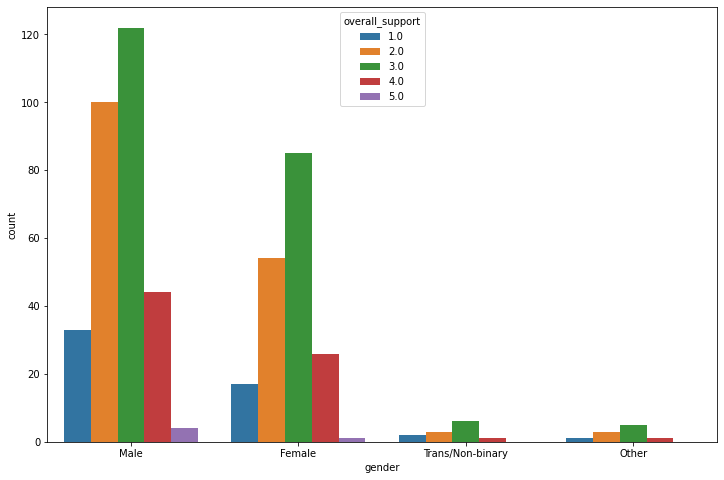

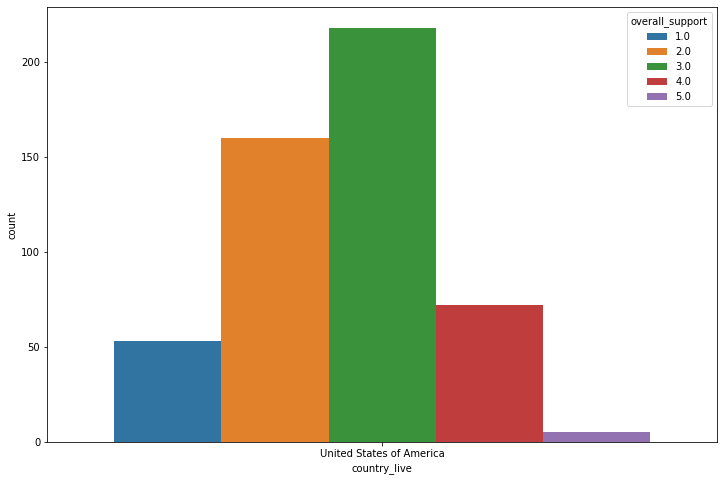

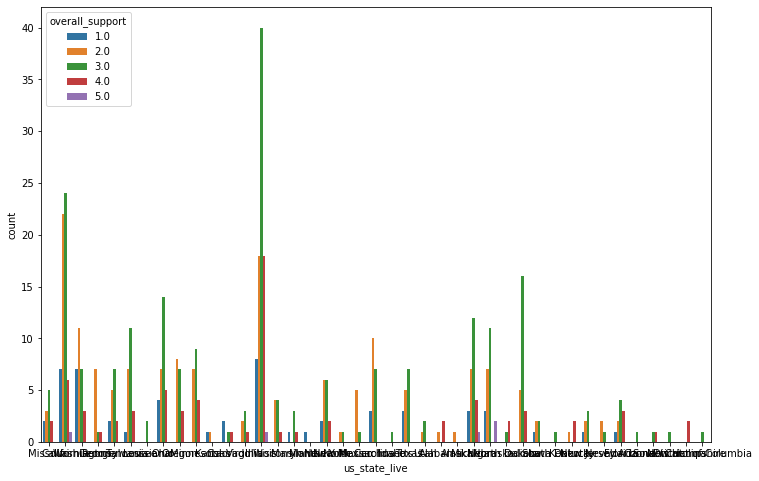

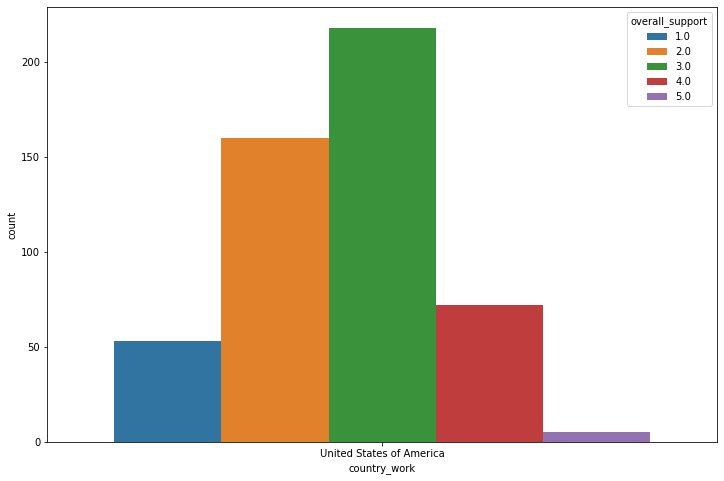

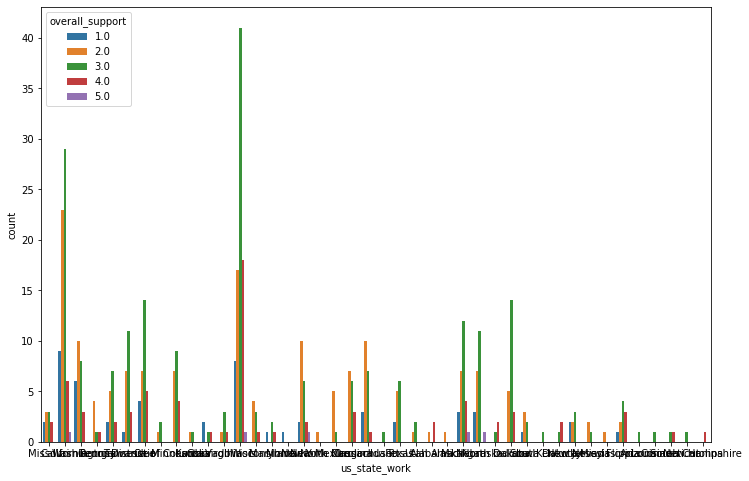

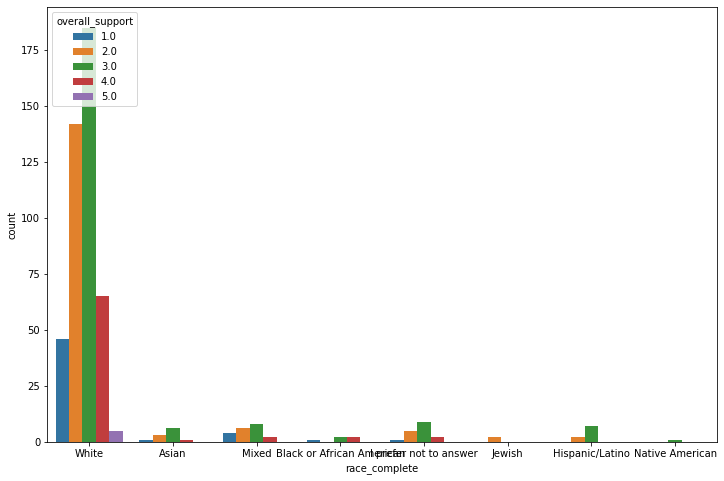

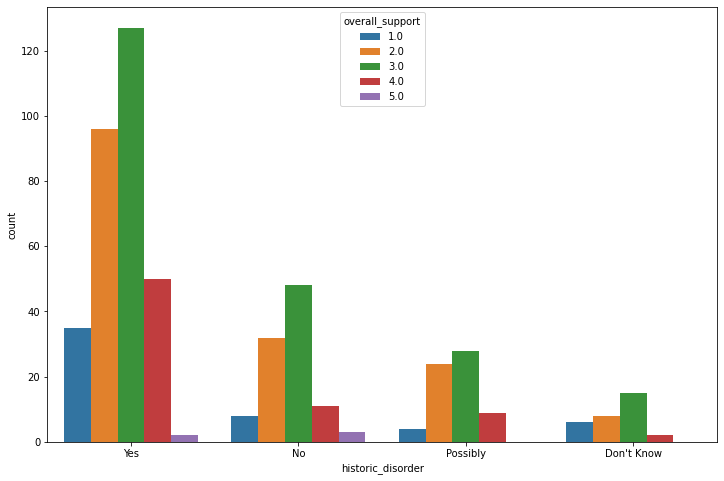

In [57]:
# vizualizing categorical variables in regards to the target variable to get some initial insights

for columns in categoricals:
    plt.figure(figsize=(12,8))
    sns.countplot(data=clean_data_us, x = clean_data_us[columns], hue = clean_data_us['overall_support'])
    plt.show()

### 3.1.3. Continuous Variables

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1152x432 with 0 Axes>

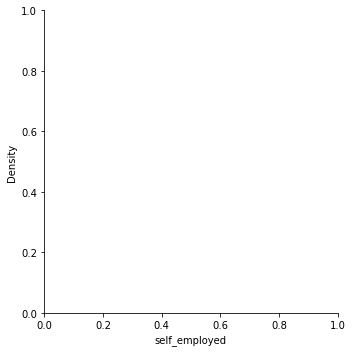

<Figure size 1152x432 with 0 Axes>

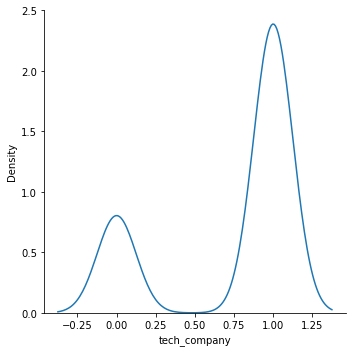

<Figure size 1152x432 with 0 Axes>

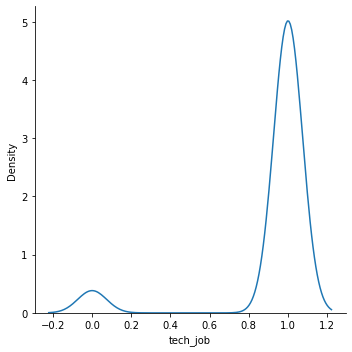

<Figure size 1152x432 with 0 Axes>

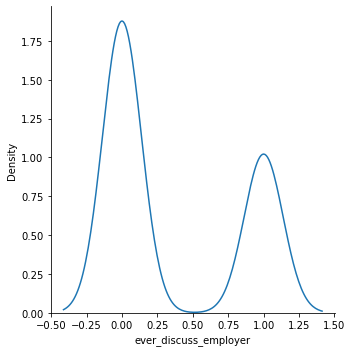

<Figure size 1152x432 with 0 Axes>

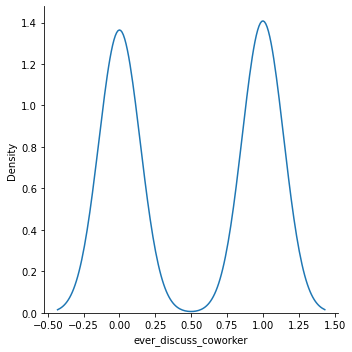

<Figure size 1152x432 with 0 Axes>

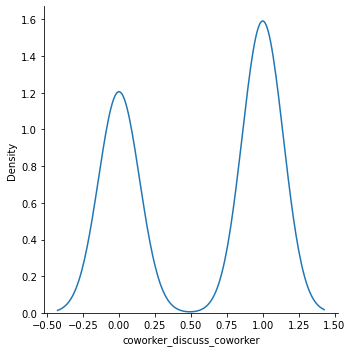

<Figure size 1152x432 with 0 Axes>

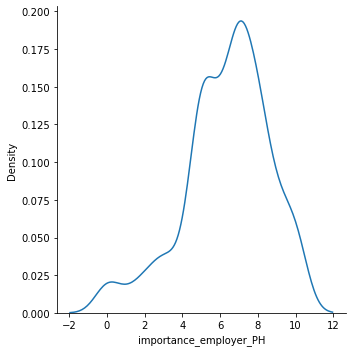

<Figure size 1152x432 with 0 Axes>

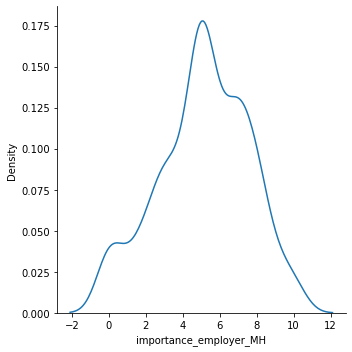

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1152x432 with 0 Axes>

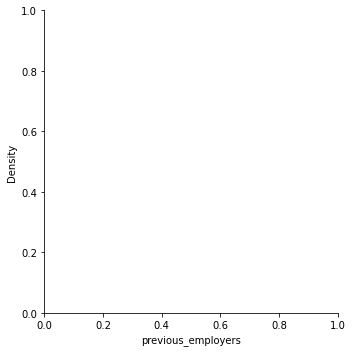

<Figure size 1152x432 with 0 Axes>

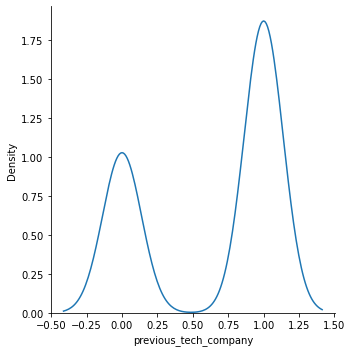

<Figure size 1152x432 with 0 Axes>

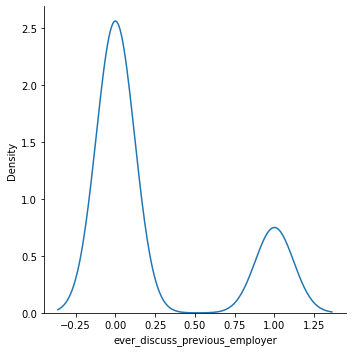

<Figure size 1152x432 with 0 Axes>

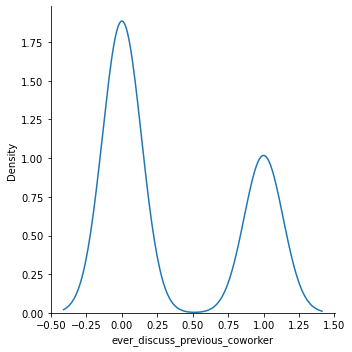

<Figure size 1152x432 with 0 Axes>

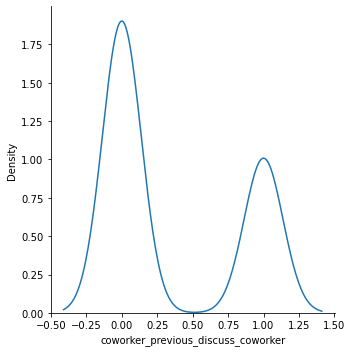

<Figure size 1152x432 with 0 Axes>

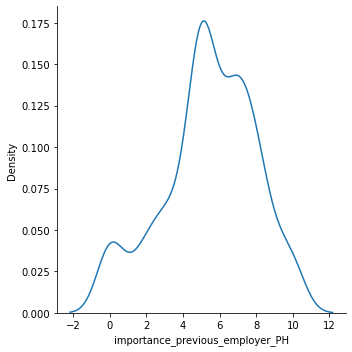

<Figure size 1152x432 with 0 Axes>

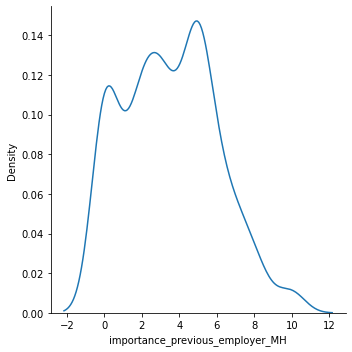

<Figure size 1152x432 with 0 Axes>

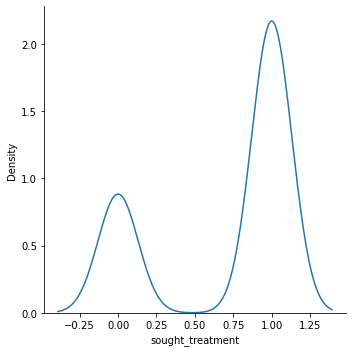

<Figure size 1152x432 with 0 Axes>

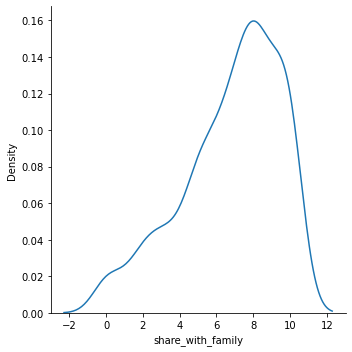

<Figure size 1152x432 with 0 Axes>

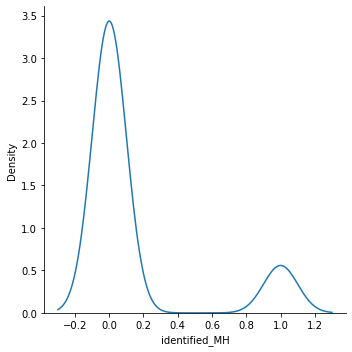

<Figure size 1152x432 with 0 Axes>

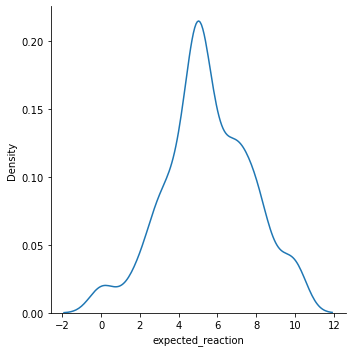

<Figure size 1152x432 with 0 Axes>

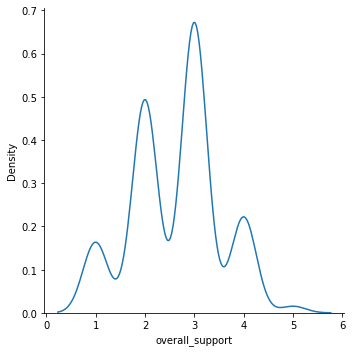

<Figure size 1152x432 with 0 Axes>

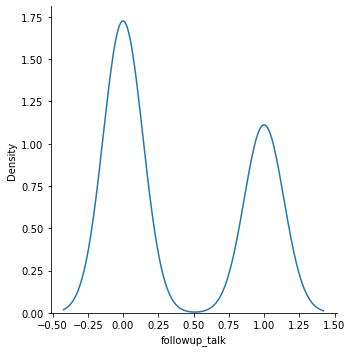

<Figure size 1152x432 with 0 Axes>

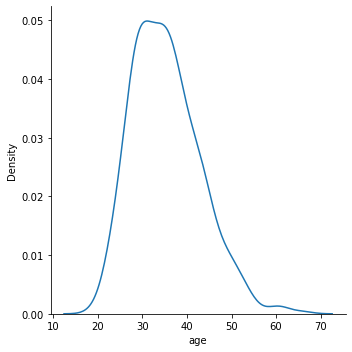

In [75]:
# selecting the continuous variables

continuous_variables = clean_data_us.select_dtypes(include='number')


#univariate analysis - distribution plots

warn_singular = False

for variables in continuous_variables:
    plt.figure(figsize=(16,6))
    sns.displot(clean_data_us, x = clean_data_us[variables], kind="kde")
    plt.show()

## 3.2. Collinearity 

### 3.2.1. Bivariate Analysis

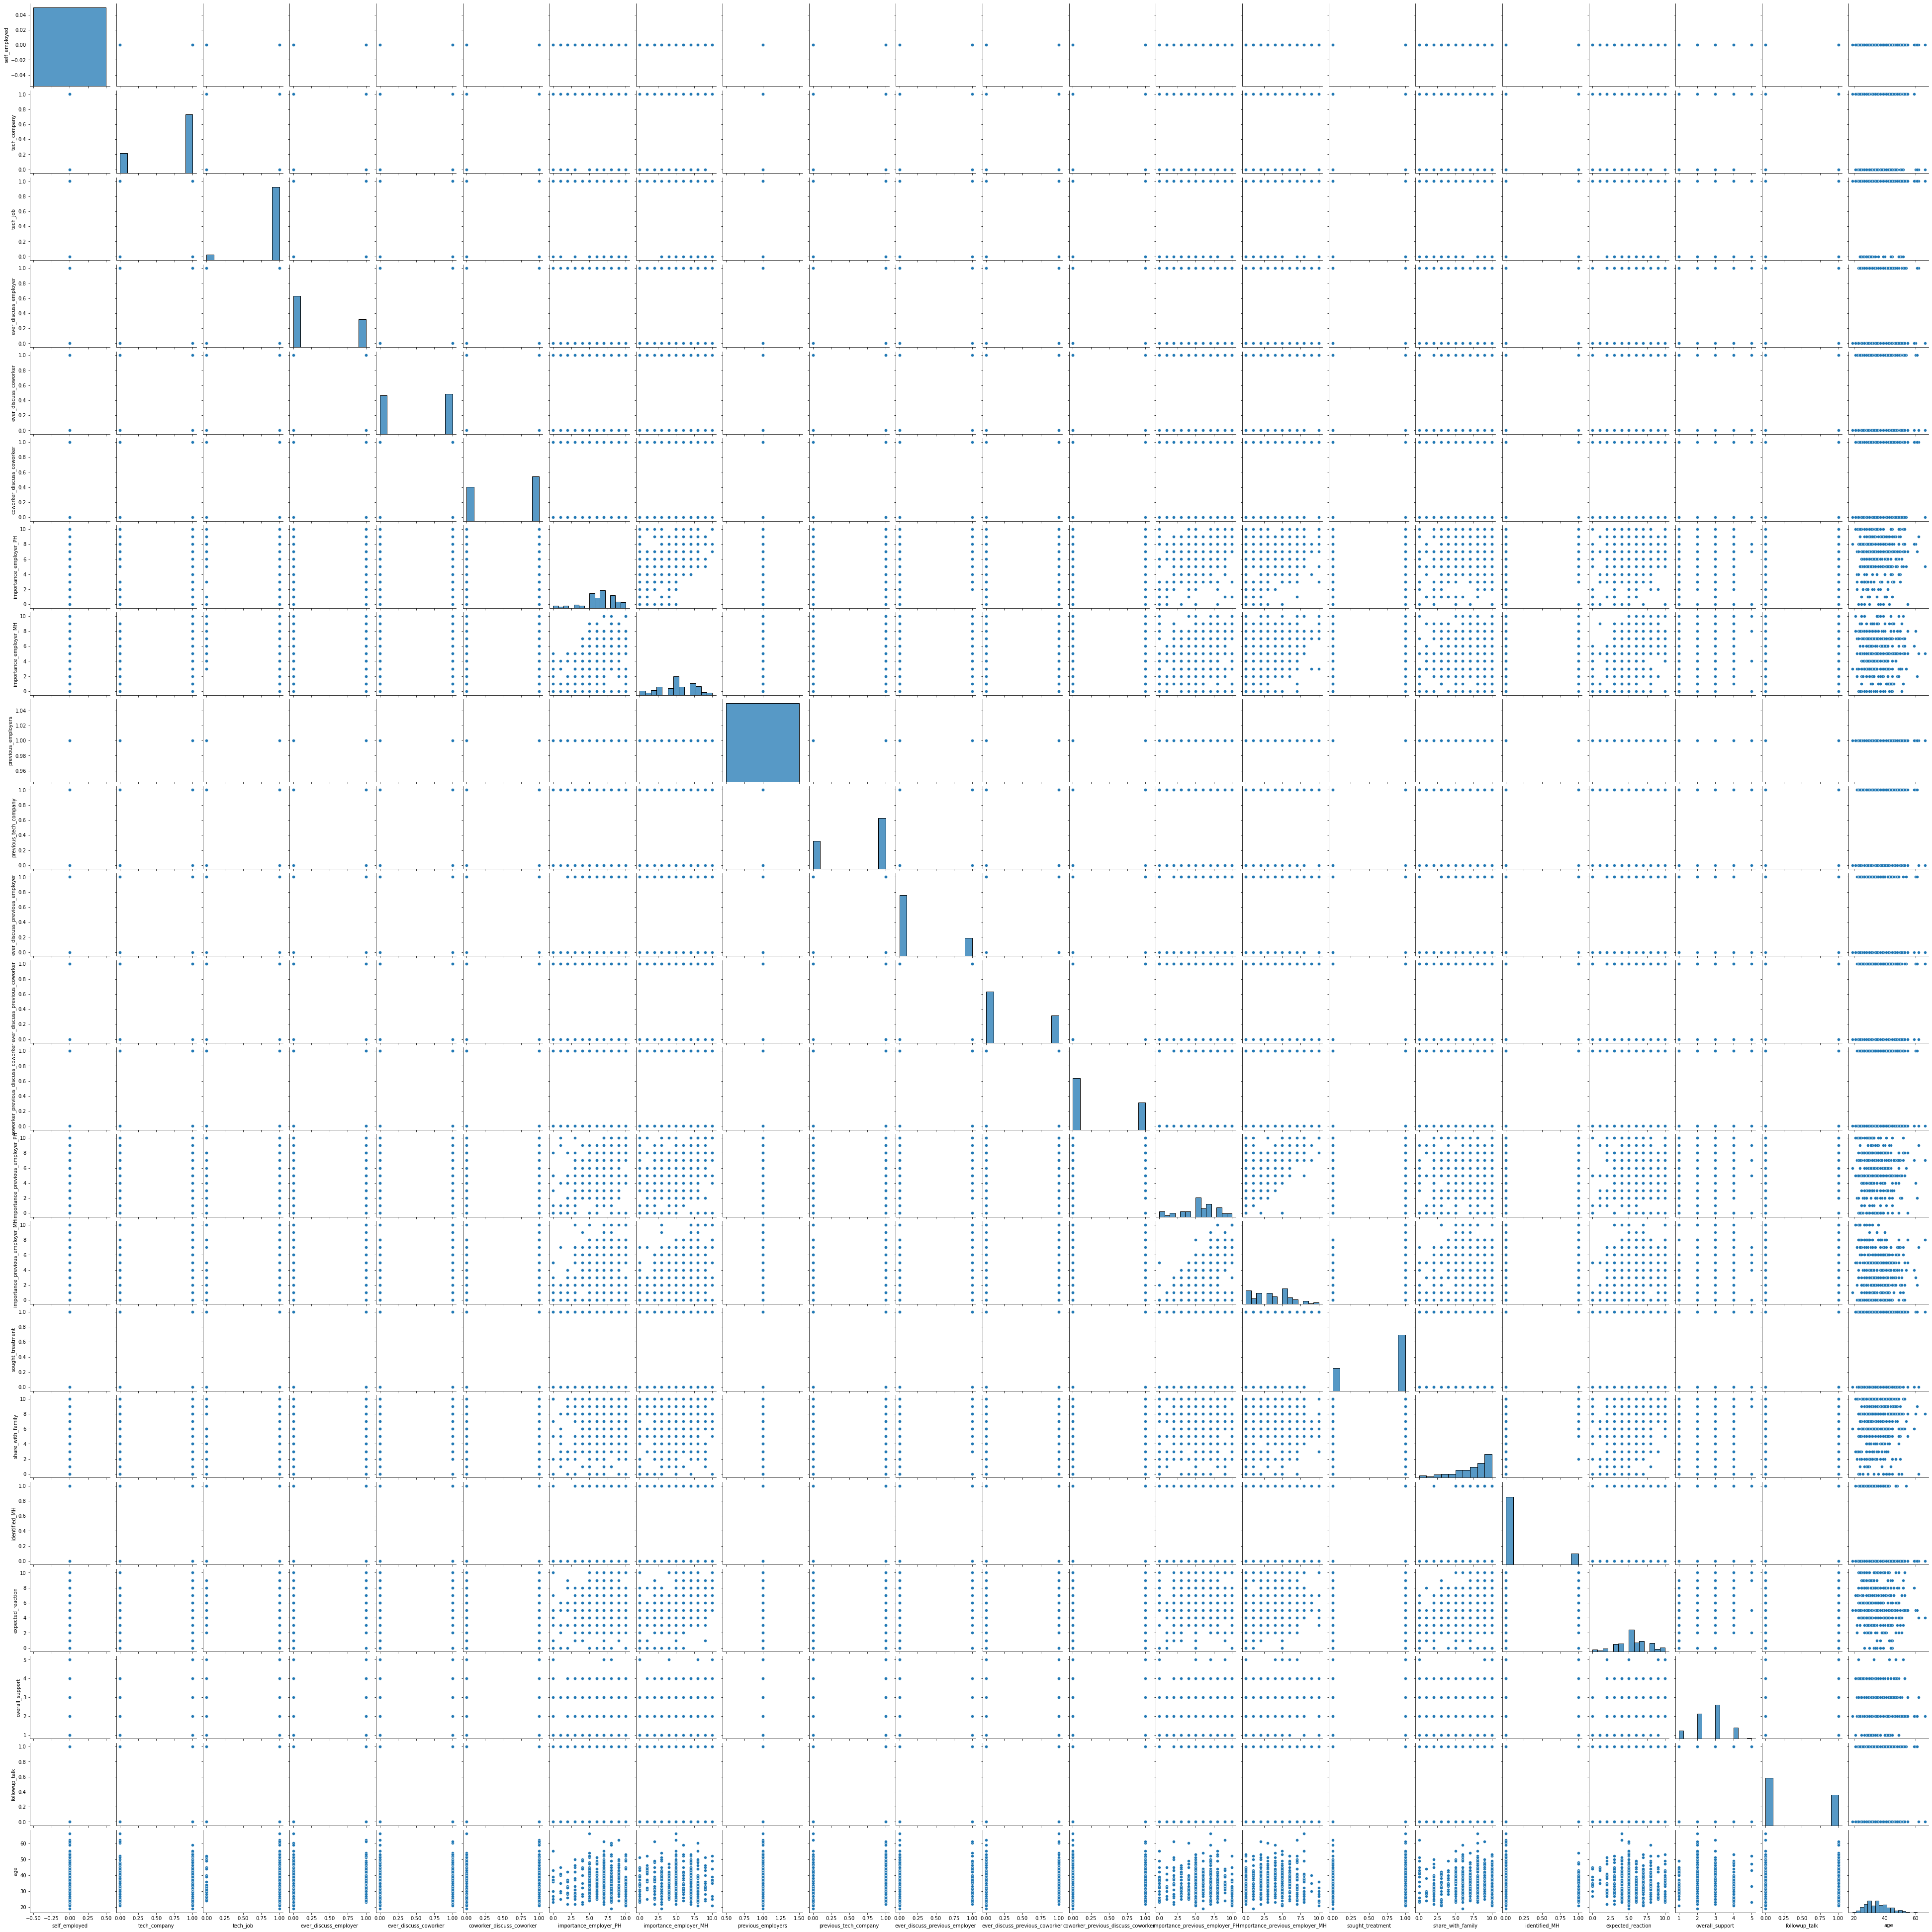

In [64]:
sns.pairplot(continuous_variables)

In [ ]:
# we do not observe a linear relation between variables. A correlation matrix may reveal further insights

### 3.2.2. Correlation Matrix

In [55]:
# using a spearman's rank correlation since we observed no linear relationship for our data

correlations = clean_data_us.corr(method = 'spearman')
correlations

,self_employed,tech_company,tech_job,ever_discuss_employer,ever_discuss_coworker,coworker_discuss_coworker,importance_employer_PH,importance_employer_MH,previous_employers,previous_tech_company,...,coworker_previous_discuss_coworker,importance_previous_employer_PH,importance_previous_employer_MH,sought_treatment,share_with_family,identified_MH,expected_reaction,overall_support,followup_talk,age
self_employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tech_company,NaN,1.000000,-0.054263,0.105380,0.090767,0.062432,-0.015174,0.150384,NaN,0.224153,...,0.070003,0.057378,0.058512,-0.020392,0.002855,0.063942,0.150244,0.039949,0.019894,-0.047010
tech_job,NaN,-0.054263,1.000000,0.043119,-0.026340,-0.008050,-0.032985,-0.115412,NaN,0.148263,...,-0.024627,0.068362,0.069440,0.026775,0.110332,0.022821,0.075142,-0.082014,0.080188,0.103440
ever_discuss_employer,NaN,0.105380,0.043119,1.000000,0.478812,0.167809,0.086427,0.145604,NaN,-0.013567,...,0.069143,-0.025064,-0.069719,0.234423,0.222144,0.356315,0.238284,0.064730,0.193147,-0.020293
ever_discuss_coworker,NaN,0.090767,-0.026340,0.478812,1.000000,0.343670,0.104980,0.133456,NaN,0.011668,...,0.137479,0.012470,-0.029920,0.326981,0.298632,0.328645,0.212334,0.109054,0.233385,-0.025787
coworker_discuss_coworker,NaN,0.062432,-0.008050,0.167809,0.343670,1.000000,0.088777,0.131081,NaN,0.011648,...,0.132603,-0.020447,0.014712,0.049332,0.045666,0.167464,0.125330,0.054419,0.112287,0.023183
importance_employer_PH,NaN,-0.015174,-0.032985,0.086427,0.104980,0.088777,1.000000,0.550716,NaN,-0.005728,...,-0.018159,0.349228,0.200301,0.063551,0.150057,0.083563,0.195202,0.123502,0.052102,0.002784
importance_employer_MH,NaN,0.150384,-0.115412,0.145604,0.133456,0.131081,0.550716,1.000000,NaN,0.008922,...,0.073415,0.215335,0.371078,0.052321,0.140702,0.158726,0.403276,0.281387,-0.025699,-0.002750
previous_employers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_tech_company,NaN,0.224153,0.148263,-0.013567,0.011668,0.011648,-0.005728,0.008922,NaN,1.000000,...,0.063676,0.111103,0.060265,-0.064316,0.021623,0.001869,-0.011121,-0.142194,-0.020978,0.127966


In [68]:
clean_data_us.self_employed.value_counts() # feature self_employed produces nan correlations cause all its values = 0

# correspondingly feature previous_employers produces nan correlations cause all its values = 1 

0    508
Name: self_employed, dtype: int64

In [71]:
cor_new = clean_data_us.drop(['previous_employers', 'self_employed'], axis=1)
correlations_new = cor_new.corr(method = 'spearman')
correlations_new

,tech_company,tech_job,ever_discuss_employer,ever_discuss_coworker,coworker_discuss_coworker,importance_employer_PH,importance_employer_MH,previous_tech_company,ever_discuss_previous_employer,ever_discuss_previous_coworker,coworker_previous_discuss_coworker,importance_previous_employer_PH,importance_previous_employer_MH,sought_treatment,share_with_family,identified_MH,expected_reaction,overall_support,followup_talk,age
tech_company,1.000000,-0.054263,0.105380,0.090767,0.062432,-0.015174,0.150384,0.224153,-0.000256,0.036594,0.070003,0.057378,0.058512,-0.020392,0.002855,0.063942,0.150244,0.039949,0.019894,-0.047010
tech_job,-0.054263,1.000000,0.043119,-0.026340,-0.008050,-0.032985,-0.115412,0.148263,0.039405,-0.038363,-0.024627,0.068362,0.069440,0.026775,0.110332,0.022821,0.075142,-0.082014,0.080188,0.103440
ever_discuss_employer,0.105380,0.043119,1.000000,0.478812,0.167809,0.086427,0.145604,-0.013567,0.201646,0.140609,0.069143,-0.025064,-0.069719,0.234423,0.222144,0.356315,0.238284,0.064730,0.193147,-0.020293
ever_discuss_coworker,0.090767,-0.026340,0.478812,1.000000,0.343670,0.104980,0.133456,0.011668,0.193771,0.285544,0.137479,0.012470,-0.029920,0.326981,0.298632,0.328645,0.212334,0.109054,0.233385,-0.025787
coworker_discuss_coworker,0.062432,-0.008050,0.167809,0.343670,1.000000,0.088777,0.131081,0.011648,0.014977,0.106112,0.132603,-0.020447,0.014712,0.049332,0.045666,0.167464,0.125330,0.054419,0.112287,0.023183
importance_employer_PH,-0.015174,-0.032985,0.086427,0.104980,0.088777,1.000000,0.550716,-0.005728,0.134218,-0.004517,-0.018159,0.349228,0.200301,0.063551,0.150057,0.083563,0.195202,0.123502,0.052102,0.002784
importance_employer_MH,0.150384,-0.115412,0.145604,0.133456,0.131081,0.550716,1.000000,0.008922,0.086395,0.034528,0.073415,0.215335,0.371078,0.052321,0.140702,0.158726,0.403276,0.281387,-0.025699,-0.002750
previous_tech_company,0.224153,0.148263,-0.013567,0.011668,0.011648,-0.005728,0.008922,1.000000,0.135203,0.078248,0.063676,0.111103,0.060265,-0.064316,0.021623,0.001869,-0.011121,-0.142194,-0.020978,0.127966
ever_discuss_previous_employer,-0.000256,0.039405,0.201646,0.193771,0.014977,0.134218,0.086395,0.135203,1.000000,0.401325,0.258576,0.182096,0.213653,0.251832,0.195785,0.148237,0.066792,0.058707,0.192253,-0.026455
ever_discuss_previous_coworker,0.036594,-0.038363,0.140609,0.285544,0.106112,-0.004517,0.034528,0.078248,0.401325,1.000000,0.488446,0.056953,0.076756,0.195696,0.206217,0.179944,0.016931,0.010105,0.120633,0.032063


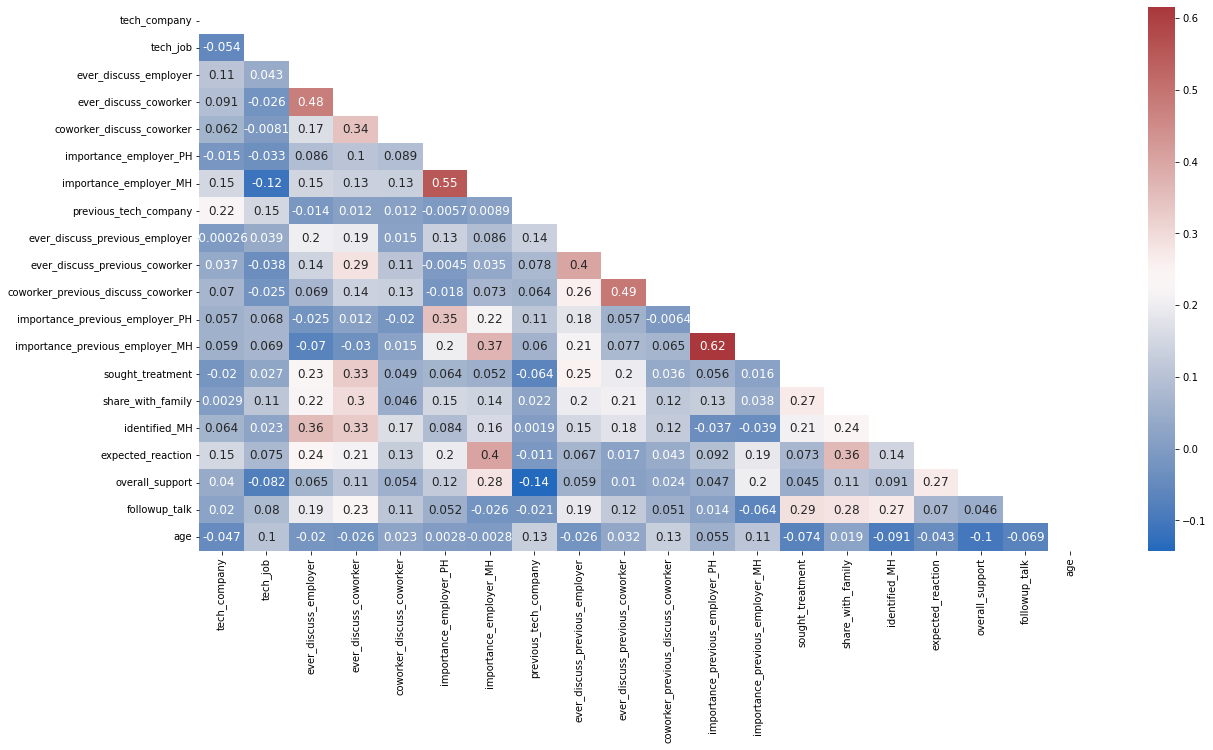

In [73]:
# using a heatmap to vizualize correlations

mask = np.zeros_like(correlations_new)
triangle = np.triu_indices_from(mask)
mask[triangle] = True

plt.figure(figsize = (20,10))
sns.heatmap(correlations_new, cmap="vlag", annot = True, annot_kws = {"size":12}, mask = mask)
plt.show()

**Observations:**

   - No significant correlations can be observed here. Therefore, there most probably aren't any issues of multicollinearity. If I suspect that might be an issue later I'll implement VIF to investigate further.


## 3.3. Outliers

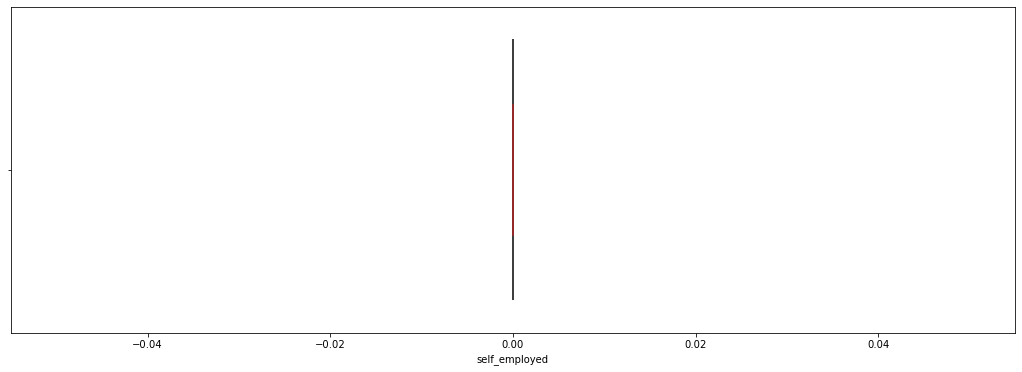

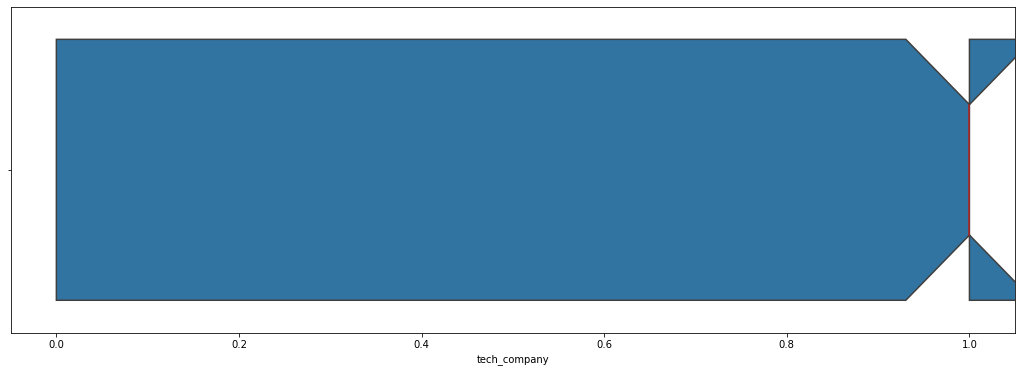

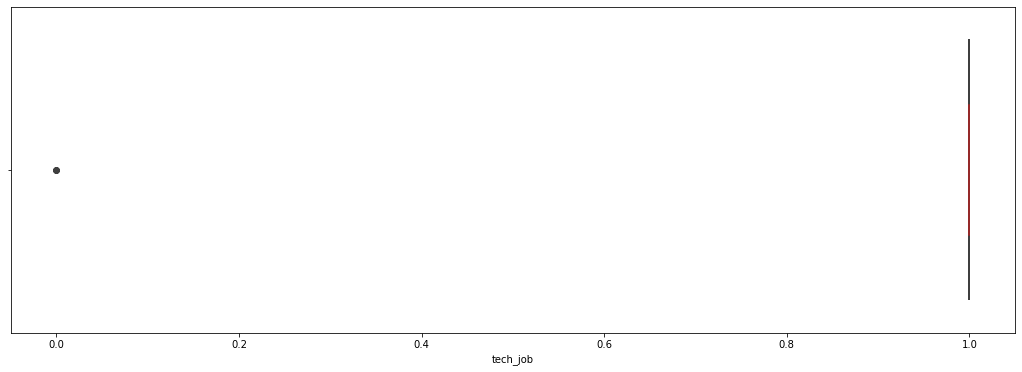

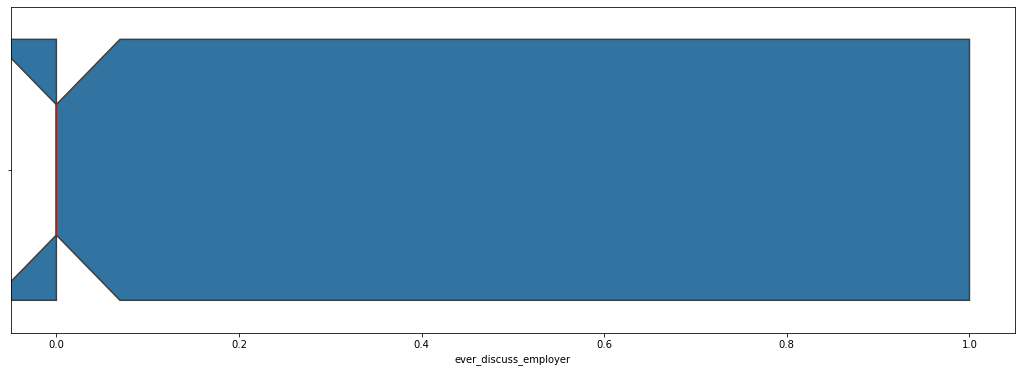

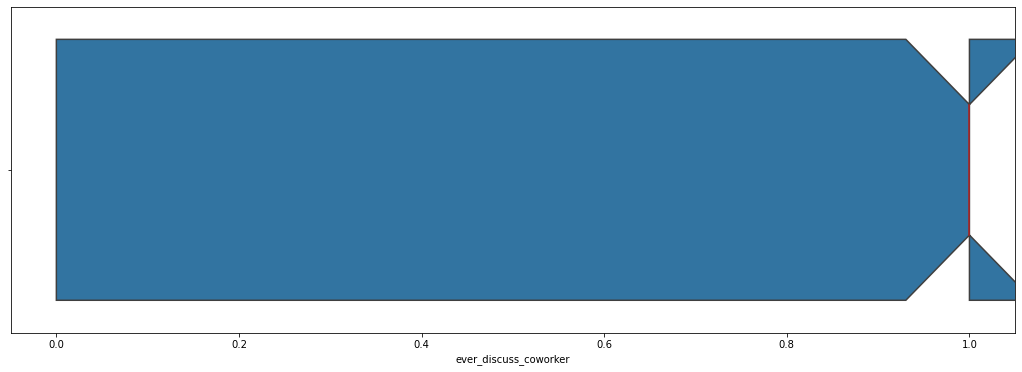

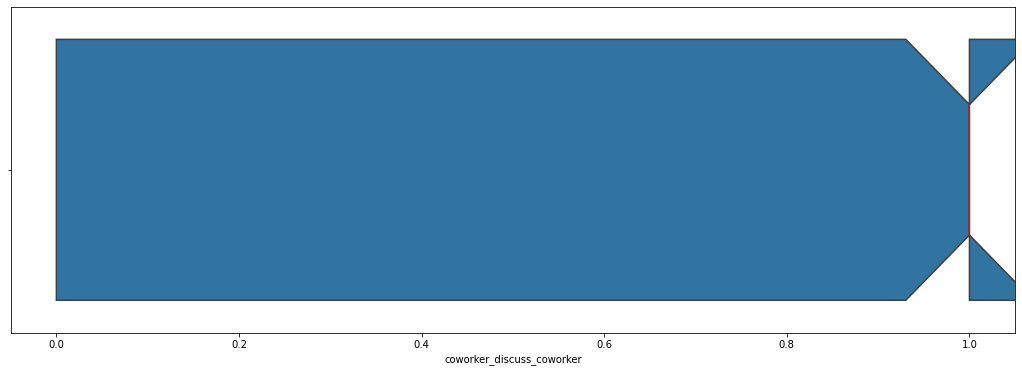

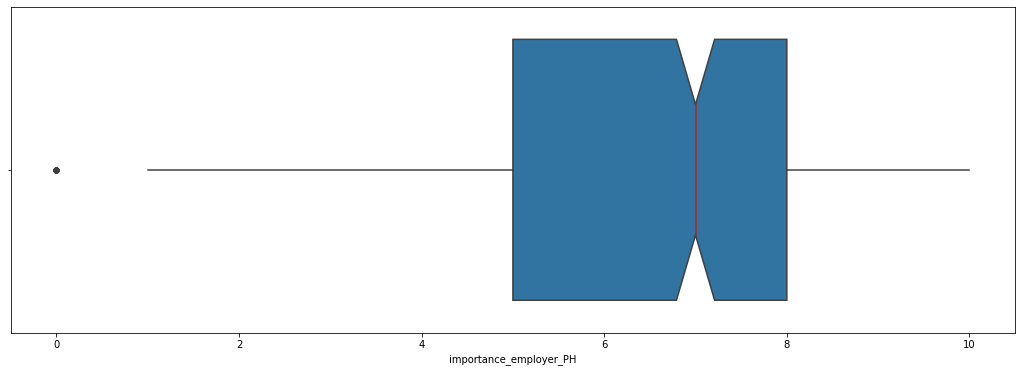

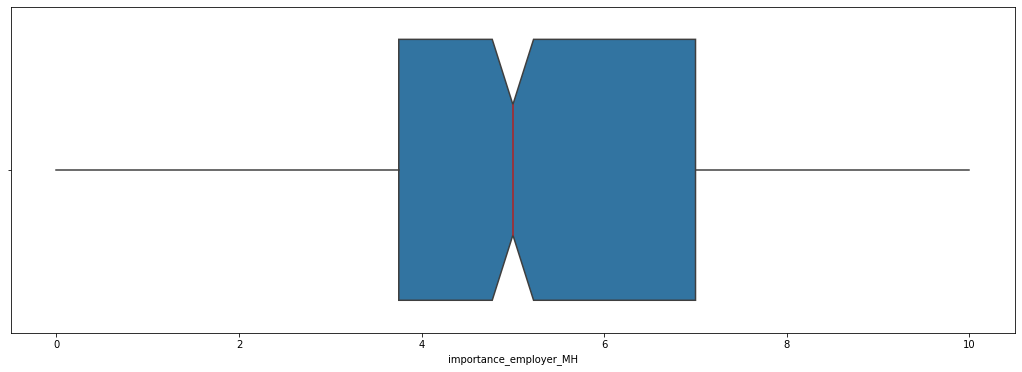

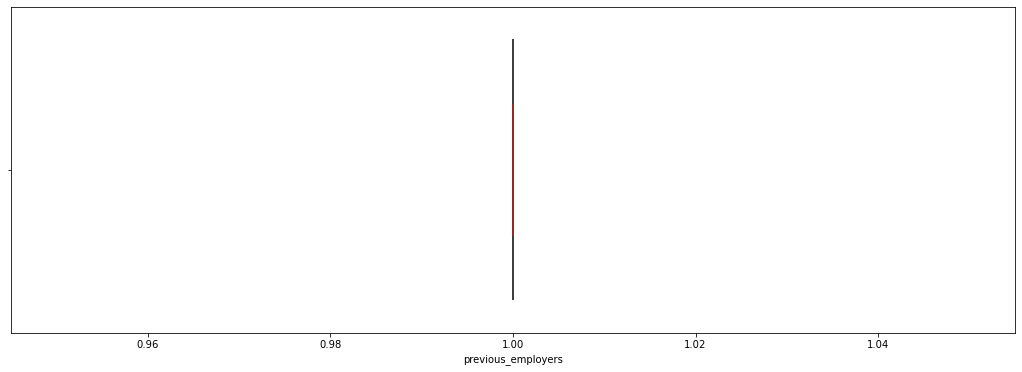

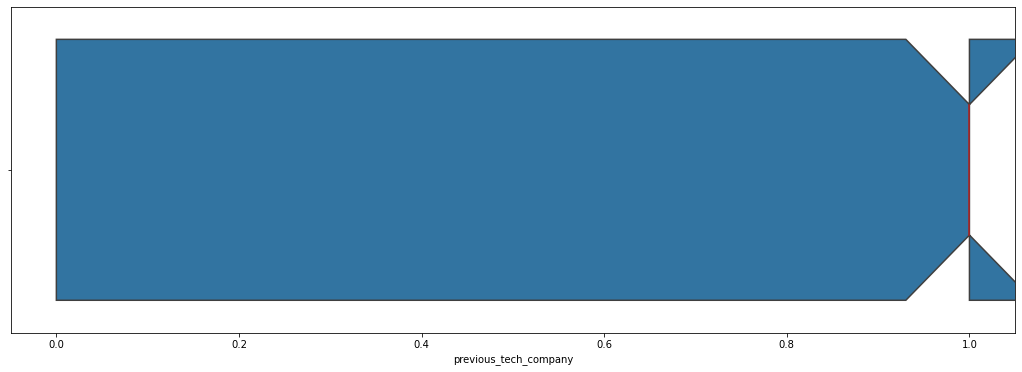

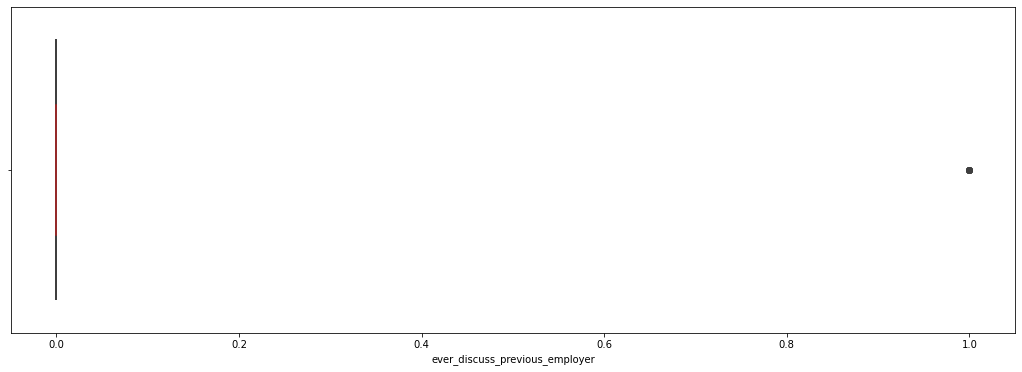

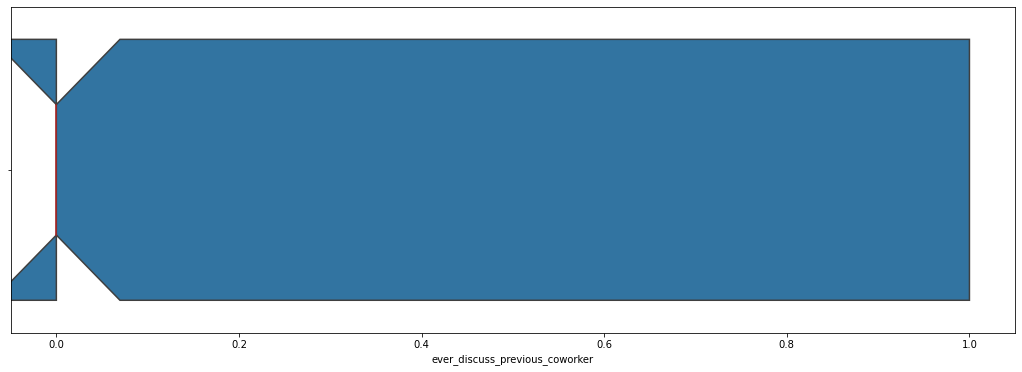

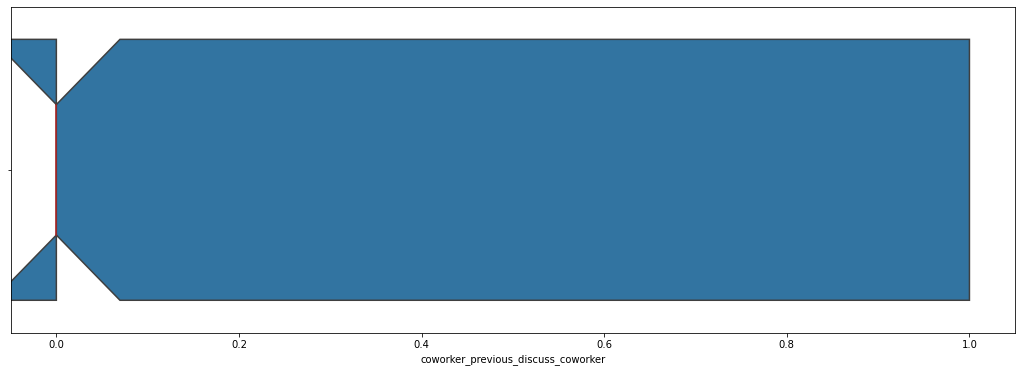

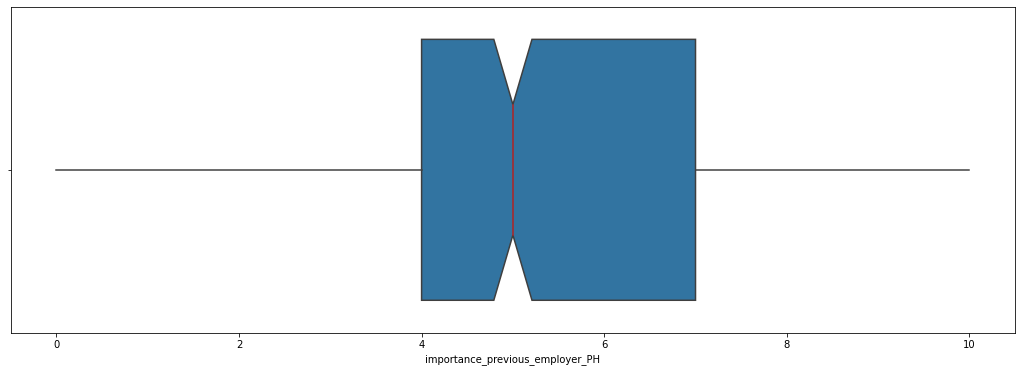

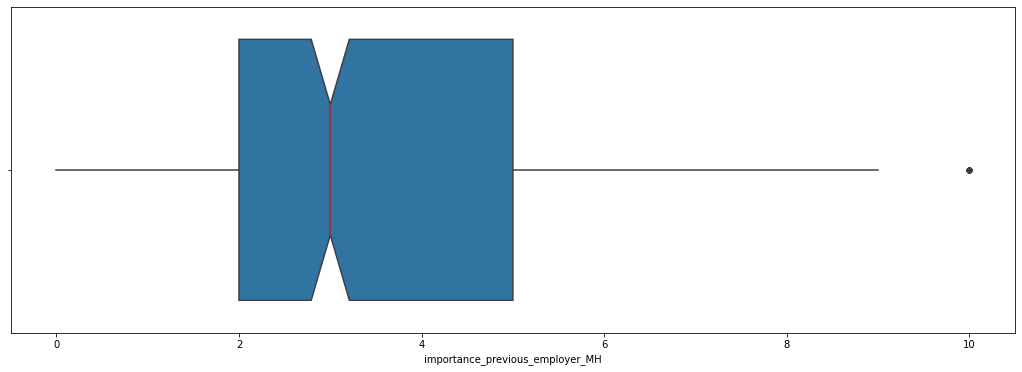

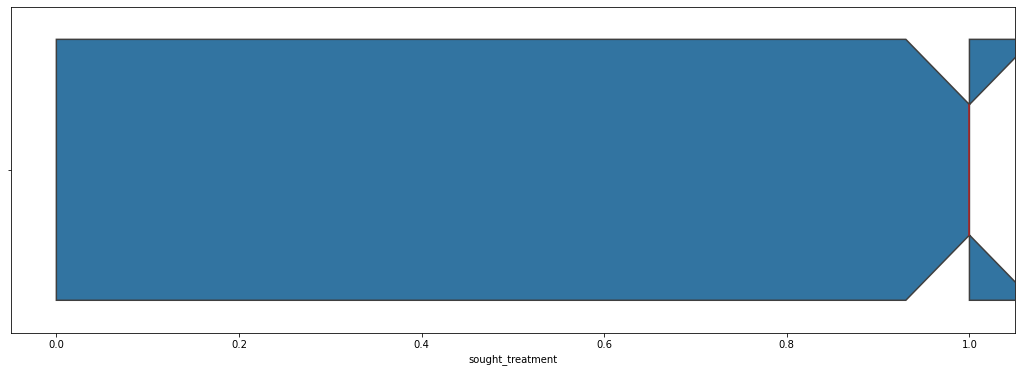

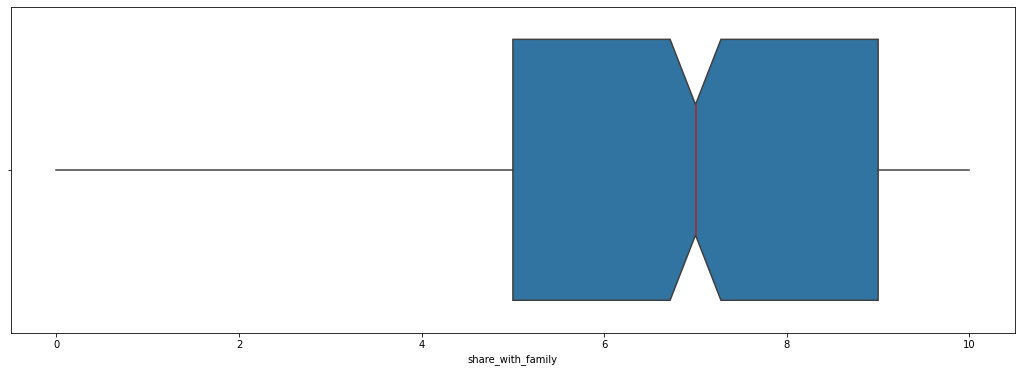

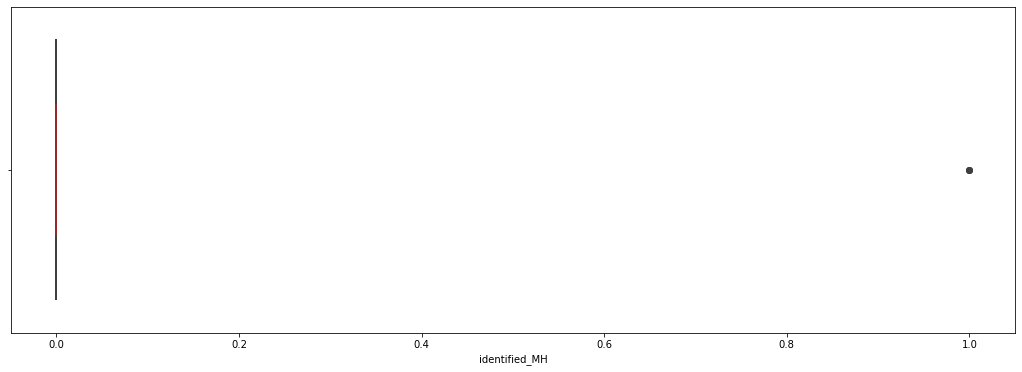

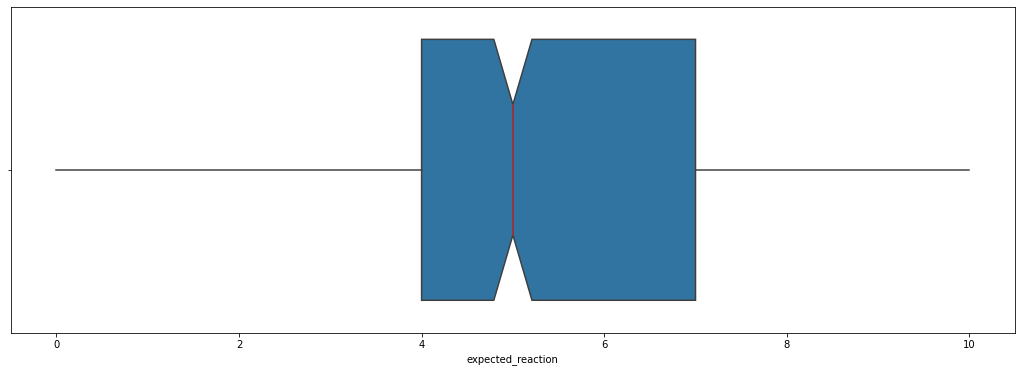

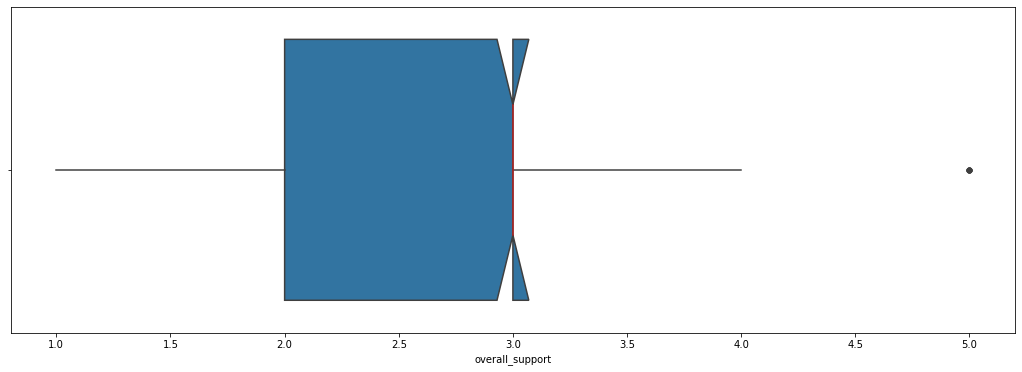

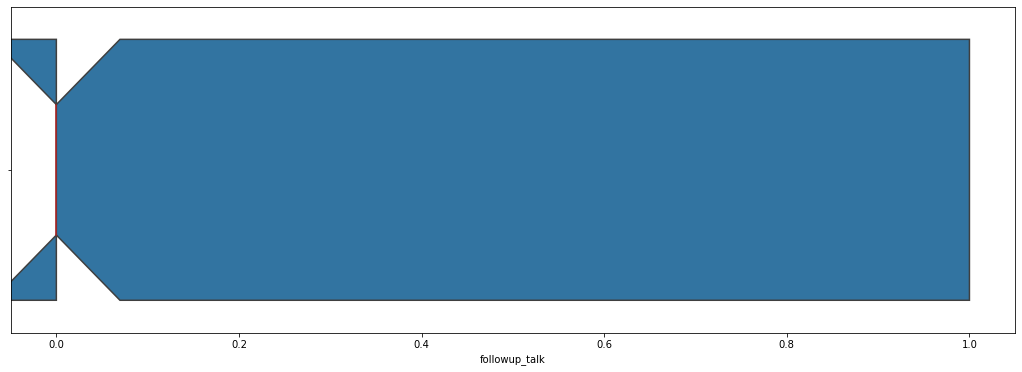

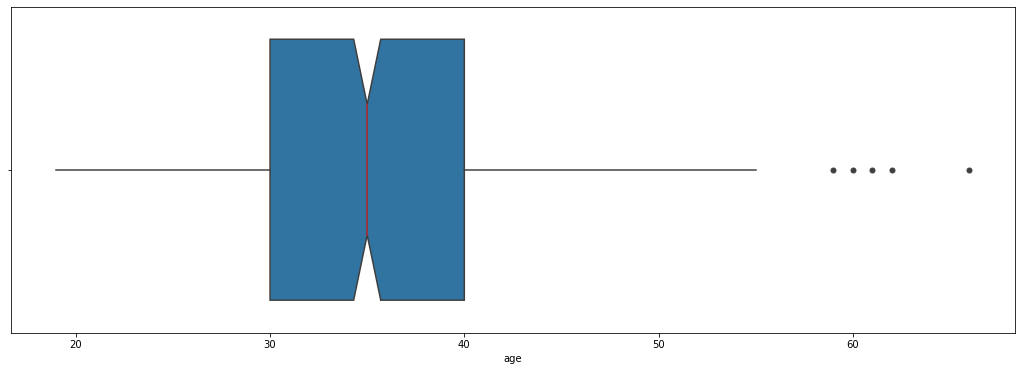

In [70]:
#checking for outliers

for variables in continuous_variables:
    plt.figure(figsize = (18,6))
    sns.boxplot(data = clean_data_us, x = clean_data_us[variables],
                notch = True, showcaps = False,
                flierprops = {"marker": "o"},
                medianprops = {"color": "firebrick"})
    plt.show()

**Observations:** 

   - As expected, very few outliers have been detected. This makes sense if we consider that very few fields of these surveys are open questions. 
   - The few columns with outliers such as `age` do not exhibit an amount of outliers that requires further cleaning for future modeling (at the moment).